In [1]:
# Importing the 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler # Library for rescaling data from 0 to 1
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import io
import os

### Data Assessement and Inspection

In [2]:
# Changing the working directory of my notebook  to be able access and to read-in the data
os.getcwd()
path = r"C:\Users\okori\Desktop\Data Science\GlobalAcademy.onecampus\Data Wrangling Project\Project_review"
os.chdir(path)
os.getcwd()

'C:\\Users\\okori\\Desktop\\Data Science\\GlobalAcademy.onecampus\\Data Wrangling Project\\Project_review'

In [3]:
df = pd.read_csv("Muskets_teamData_V2.csv", low_memory=False)

# Setting dispaly options to maximum number columns in the dataframe
pd.set_option("display.max_columns", None)

df.head()

ID               Name                      LongName   
0  158023           L. Messi                  Lionel Messi  \
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl   
0  https://cdn.sofifa.com/players/158/023/21_60.png  \
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA   
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33  93.0  \
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35  92.0   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27  91.0   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29  91.0   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28  91.0   

    POT                         Club     Contract   Positions Height Weight   
0  93.0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  170cm   72kg  \
1  92.0             \n\n\n\nJuventus  2018 ~ 2022      ST, LW  187cm   83kg   
2  93.0      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK  188cm   87kg   
3  91.0      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM  181cm   70kg   
4  91.0  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM  175cm   68kg   

  Preferred Foot  BOV Best Position     Joined Loan Date End    Value   Wage   
0           Left   93            RW   1-Jul-04           NaN  €103.5M  €560K  \
1          Right   92            ST  10-Jul-18           NaN     €63M  €220K   
2          Right   91            GK  16-Jul-14           NaN    €120M  €125K   
3          Right   91           CAM  30-Aug-15           NaN    €129M  €370K   
4          Right   91            LW   3-Aug-17           NaN    €132M  €270K   

  Release Clause  Attacking  Crossing  Finishing  Heading Accuracy   
0        €138.4M      429.0      85.0       95.0              70.0  \
1         €75.9M      437.0      84.0       95.0              90.0   
2        €159.4M       95.0      13.0       11.0              15.0   
3          €161M      407.0      94.0       82.0              55.0   
4        €166.5M      408.0      85.0       87.0              62.0   

  Short Passing  Volleys  Skill Dribbling  Curve  FK Accuracy  Long Passing   
0            91     88.0  470.0        96   93.0         94.0          91.0  \
1            82     86.0  414.0        88   81.0         76.0          77.0   
2            43     13.0  109.0        12   13.0         14.0          40.0   
3            94     82.0  441.0        88   85.0         83.0          93.0   
4            87     87.0  448.0        95   88.0         89.0          81.0   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions   
0          96.0     451.0          91.0          80.0     91.0       94.0  \
1          92.0     431.0          87.0          91.0     87.0       95.0   
2          30.0     307.0          43.0          60.0     67.0       88.0   
3          92.0     398.0          77.0          76.0     78.0       91.0   
4          95.0     453.0          94.0          89.0     96.0       91.0   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots   
0     95.0  389.0        86.0     68.0     72.0      69.0        94.0  \
1     71.0  444.0        94.0     95.0     84.0      78.0        93.0   
2     49.0  268.0        59.0     78.0     41.0      78.0        12.0   
3     76.0  408.0        91.0     63.0     89.0      74.0        91.0   
4     83.0  357.0        80.0     62.0     81.0      50.0        84.0   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties   

In [4]:
df.tail()

ID          Name        LongName   
19016  247223        Xia Ao          Ao Xia  \
19017  258760      B. Hough       Ben Hough   
19018  252757   R. McKinley  Ronan McKinley   
19019  243790  Wang Zhen'ao    Zhen'ao Wang   
19020  252520     Zhou Xiao       Xiao Zhou   

                                               photoUrl   
19016  https://cdn.sofifa.com/players/247/223/21_60.png  \
19017  https://cdn.sofifa.com/players/258/760/21_60.png   
19018  https://cdn.sofifa.com/players/252/757/21_60.png   
19019  https://cdn.sofifa.com/players/243/790/21_60.png   
19020  https://cdn.sofifa.com/players/252/520/21_60.png   

                                               playerUrl Nationality  Age   
19016     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21  \
19017  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
19018  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
19019  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
19020  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

       ↓OVA   POT                      Club     Contract Positions Height   
19016  47.0  55.0        \n\n\n\nWuhan Zall  2018 ~ 2022        CB  178cm  \
19017  47.0  67.0   \n\n\n\nOldham Athletic  2020 ~ 2021        CM  175cm   
19018  47.0  65.0        \n\n\n\nDerry City  2019 ~ 2020        CM  179cm   
19019  47.0  57.0  \n\n\n\nDalian YiFang FC  2020 ~ 2022        RW  175cm   
19020  47.0  57.0  \n\n\n\nDalian YiFang FC  2019 ~ 2023    CB, LB  188cm   

      Weight Preferred Foot  BOV Best Position     Joined Loan Date End   
19016   66kg          Right   49            CB  13-Jul-18           NaN  \
19017   65kg          Right   51           CAM   1-Aug-20           NaN   
19018   74kg          Right   49           CAM   8-Mar-19           NaN   
19019   69kg          Right   48            ST  22-Sep-20           NaN   
19020   75kg           Left   50            LB  29-Jul-19           NaN   

       Value  Wage Release Clause  Attacking  Crossing  Finishing   
19016  €100K   €1K           €70K      145.0      23.0       26.0  \
19017  €130K  €500          €165K      211.0      38.0       42.0   
19018  €120K  €500          €131K      200.0      30.0       34.0   
19019  €100K   €2K           €88K      215.0      45.0       52.0   
19020  €100K   €1K           €79K      163.0      40.0       18.0   

       Heading Accuracy Short Passing  Volleys  Skill Dribbling  Curve   
19016              43.0            26     27.0  142.0        27   23.0  \
19017              40.0            56     35.0  219.0        46   40.0   
19018              43.0            54     39.0  207.0        43   39.0   
19019              34.0            42     42.0  194.0        51   35.0   
19020              40.0            45     20.0  171.0        40   33.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration   
19016         21.0          29.0          42.0     294.0          68.0  \
19017         35.0          50.0          48.0     305.0          63.0   
19018         31.0          47.0          47.0     290.0          59.0   
19019         31.0          31.0          46.0     254.0          62.0   
19020         20.0          40.0          38.0     279.0          60.0   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping   
19016          60.0     69.0       46.0     51.0  221.0        36.0     57.0  \
19017          64.0     61.0       51.0     66.0  226.0        48.0     58.0   
19018          66.0     51.0       47.0     67.0  242.0        45.0     52.0   
19019          55.0     50.0       33.0     54.0  235.0        56.0     45.0   
19020          63.0     57.0       47.0     52.0  231.0        37.0     66.0   

       Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions   
19016     54.0      50.0        24.0      192.0          48           50.0  \
19017     43.0      47.0        30.0      193.0       

In [5]:
# Accessing the datatypes of the various features in the dataframe

# Ensuring that all rows for the feature datatypes are displayed for accessement
pd.set_option('display.max_rows', 120)

df.dtypes

ID                    int64
Name                 object
LongName             object
photoUrl             object
playerUrl            object
Nationality          object
Age                   int64
↓OVA                float64
POT                 float64
Club                 object
Contract             object
Positions            object
Height               object
Weight               object
Preferred Foot       object
BOV                   int64
Best Position        object
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Attacking           float64
Crossing            float64
Finishing           float64
Heading Accuracy    float64
Short Passing        object
Volleys             float64
Skill               float64
Dribbling            object
Curve               float64
FK Accuracy         float64
Long Passing        float64
Ball Control        float64
Movement            float64
Acceleration        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [7]:
# Checking the shape of the data
df.shape

(19021, 77)

In [8]:
# Accessing the numerical features in the dataframe
df.describe()

ID           Age          ↓OVA           POT           BOV   
count   19021.000000  19021.000000  19019.000000  19020.000000  19021.000000  \
mean   226424.369907     25.191052     65.710027     71.133176     66.745229   
std     27130.054102      4.709833      6.961705      6.114062      6.741702   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210182.000000     21.000000     61.000000     67.000000     62.000000   
50%    232437.000000     25.000000     66.000000     71.000000     67.000000   
75%    246929.000000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy   
count  19020.000000  19020.000000  19016.000000      19013.000000  \
mean     248.921346     49.687907     45.841554         51.933046   
std       74.252568     18.121421     19.559283         17.284129   
min       42.000000      6.000000      3.000000          5.000000   
25%      222.000000     38.000000     30.000000         44.000000   
50%      263.000000     54.000000     49.000000         55.000000   
75%      297.000000     63.000000     62.000000         64.000000   
max      437.000000     94.000000     95.000000         93.000000   

            Volleys         Skill         Curve   FK Accuracy  Long Passing   
count  19014.000000  19015.000000  19013.000000  19015.000000  19018.000000  \
mean      42.688019    256.449382     47.239468     42.387378     52.720528   
std       17.635959     78.591672     18.193181     17.217434     15.172967   
min        3.000000     40.000000      4.000000      5.000000      5.000000   
25%       30.000000    222.000000     35.000000     31.000000     43.000000   
50%       44.000000    269.000000     49.000000     41.000000     56.000000   
75%       56.000000    310.000000     61.000000     55.000000     64.000000   
max       90.000000    470.000000     94.000000     94.000000     93.000000   

       Ball Control      Movement  Acceleration  Sprint Speed       Agility   
count  19018.000000  19016.000000  19017.000000  19018.000000  19019.000000  \
mean      58.525344    317.731121     64.363622     64.418866     63.372364   
std       16.556240     55.860444     14.886000     14.631825     14.593638   
min        5.000000    122.000000     13.000000     12.000000     14.000000   
25%       54.000000    289.000000     57.000000     57.000000     55.000000   
50%       63.000000    327.000000     67.000000     67.000000     66.000000   
75%       69.000000    356.000000     74.000000     74.000000     74.000000   
max       96.000000    464.000000     97.000000     96.000000     96.000000   

          Reactions       Balance         Power    Shot Power       Jumping   
count  19017.000000  19014.000000  19020.000000  19019.000000  19017.000000  \
mean      61.645791     63.931156    296.578181     57.791945     64.574486   
std        9.065386     14.058999     50.712216     13.300810     11.842823   
min       24.000000     12.000000    122.000000     18.000000     15.000000   
25%       56.000000     56.000000    264.000000     48.000000     58.000000   
50%       62.000000     66.000000    302.000000     59.000000     65.000000   
75%       68.000000     74.000000    334.000000     68.000000     73.000000   
max       95.000000     97.000000    444.000000     95.000000     95.000000   

            Stamina      Strength    Long Shots     Mentality    Aggression   
count  19020.000000  19016.000000  19014.000000  19015.000000  19021.000000  \
mean      62.655941     64.773454     46.772115    254.170129     55.580464   
std       15.800338     12.486151     19.290532     64.554816     17.133560   
min       12.000000     16.000000      4.000000     50.000000      9.000000   
25%       55.000000     57.000000     32.000000    228.000000     44.000000   
50%       66.000000     66.000000     51.000000    263.000000    

In [9]:
# Checking for missing values in the data
df.isnull().sum()

ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
Nationality             0
Age                     0
↓OVA                    2
POT                     1
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  1
Preferred Foot          0
BOV                     0
Best Position           0
Joined                  0
Loan Date End       18006
Value                   0
Wage                    0
Release Clause          3
Attacking               1
Crossing                1
Finishing               5
Heading Accuracy        8
Short Passing           9
Volleys                 7
Skill                   6
Dribbling               1
Curve                   8
FK Accuracy             6
Long Passing            3
Ball Control            3
Movement                5
Acceleration            4
Sprint Speed            3
Agility                 2
Reactions   

In [10]:
# Extracting the unique values of the outcome feature only for assessement
df.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

### Separating the dataframe into numerical and categorical variables for easier inspection

In [11]:
num_vars=df.select_dtypes(['float64', 'int64'])

print(num_vars.columns)

print('\n')

categorical_vars=df.select_dtypes('object')
print(categorical_vars.columns)

Index(['ID', 'Age', '↓OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Movement', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')


Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Short Passing', 'Dribbling', '

In [12]:
# Inspecting the numerical features
df.describe(include='float64')

↓OVA           POT     Attacking      Crossing     Finishing   
count  19019.000000  19020.000000  19020.000000  19020.000000  19016.000000  \
mean      65.710027     71.133176    248.921346     49.687907     45.841554   
std        6.961705      6.114062     74.252568     18.121421     19.559283   
min       47.000000     47.000000     42.000000      6.000000      3.000000   
25%       61.000000     67.000000    222.000000     38.000000     30.000000   
50%       66.000000     71.000000    263.000000     54.000000     49.000000   
75%       70.000000     75.000000    297.000000     63.000000     62.000000   
max       93.000000     95.000000    437.000000     94.000000     95.000000   

       Heading Accuracy       Volleys         Skill         Curve   
count      19013.000000  19014.000000  19015.000000  19013.000000  \
mean          51.933046     42.688019    256.449382     47.239468   
std           17.284129     17.635959     78.591672     18.193181   
min            5.000000      3.000000     40.000000      4.000000   
25%           44.000000     30.000000    222.000000     35.000000   
50%           55.000000     44.000000    269.000000     49.000000   
75%           64.000000     56.000000    310.000000     61.000000   
max           93.000000     90.000000    470.000000     94.000000   

        FK Accuracy  Long Passing  Ball Control      Movement  Acceleration   
count  19015.000000  19018.000000  19018.000000  19016.000000  19017.000000  \
mean      42.387378     52.720528     58.525344    317.731121     64.363622   
std       17.217434     15.172967     16.556240     55.860444     14.886000   
min        5.000000      5.000000      5.000000    122.000000     13.000000   
25%       31.000000     43.000000     54.000000    289.000000     57.000000   
50%       41.000000     56.000000     63.000000    327.000000     67.000000   
75%       55.000000     64.000000     69.000000    356.000000     74.000000   
max       94.000000     93.000000     96.000000    464.000000     97.000000   

       Sprint Speed       Agility     Reactions       Balance         Power   
count  19018.000000  19019.000000  19017.000000  19014.000000  19020.000000  \
mean      64.418866     63.372364     61.645791     63.931156    296.578181   
std       14.631825     14.593638      9.065386     14.058999     50.712216   
min       12.000000     14.000000     24.000000     12.000000    122.000000   
25%       57.000000     55.000000     56.000000     56.000000    264.000000   
50%       67.000000     66.000000     62.000000     66.000000    302.000000   
75%       74.000000     74.000000     68.000000     74.000000    334.000000   
max       96.000000     96.000000     95.000000     97.000000    444.000000   

         Shot Power       Jumping       Stamina      Strength    Long Shots   
count  19019.000000  19017.000000  19020.000000  19016.000000  19014.000000  \
mean      57.791945     64.574486     62.655941     64.773454     46.772115   
std       13.300810     11.842823     15.800338     12.486151     19.290532   
min       18.000000     15.000000     12.000000     16.000000      4.000000   
25%       48.000000     58.000000     55.000000     57.000000     32.000000   
50%       59.000000     65.000000     66.000000     66.000000     51.000000   
75%       68.000000     73.000000     73.000000     74.000000     62.000000   
max       95.000000     95.000000     97.000000     97.000000     94.000000   

          Mentality  Interceptions   Positioning     Penalties     Composure   
count  19015.000000   19017.000000  19020.000000  19020.000000  19020.000000  \
mean     254.170129      46.393122     50.297003     48.055836     58.069295   
std       64.554816      20.689840     19.419063     15.648088     12.069520   
min       50.000000       3.000000      2.000000      6.000000     12.000000   
25%      228.000000      25.000000     40.000000     39.000000     50.000000   
50%      263.000000      53.000000     55.000000     49.000000   

In [13]:
# Inspecting the categorical features
df.describe(include='object')

Name      LongName   
count          19021         19021  \
unique         17920         18852   
top     J. Rodríguez  Adama Traoré   
freq              13             3   

                                                photoUrl   
count                                              19021  \
unique                                             18979   
top     https://cdn.sofifa.com/players/248/810/21_60.png   
freq                                                   2   

                                                playerUrl Nationality   
count                                               19021       19021  \
unique                                              18979         164   
top     http://sofifa.com/player/248810/ryu-takao/210006/     England   
freq                                                    2        1712   

           Club     Contract Positions Height Weight Preferred Foot   
count     19021        19021     19021  19021  19020          19021  \
unique      682          131       640     62     79              2   
top     No Club  2019 ~ 2021        CB  180cm   70kg          Right   
freq        237         1710      2445   1477   1496          14475   

       Best Position    Joined Loan Date End  Value   Wage Release Clause   
count          19021     19021          1015  19021  19021          19018  \
unique            15      1869            24    255    134           1216   
top               CB  1-Jul-19     30-Jun-21  €1.2M    €2K             €0   
freq            3691      1347           771    583   2912           1263   

       Short Passing Dribbling    W/F     SM     A/W     D/W     IR   Hits  
count          19012     19020  19021  19021   19021   19020  19021  16426  
unique            87        92      5      5       3       3      5    439  
top               62        65    3 ★     2★  Medium  Medium    1 ★      1  
freq             903       779  11720   9170   12726   13987  17671   2344

In [14]:
# Inspecting the uniques in each column of the dataframe
# Accessing the numerical features first
cols = num_vars.columns

for col in cols:
    print(col, num_vars[col].unique())
    print('\n')

ID [158023  20801 200389 ... 252757 243790 252520]


Age [33 35 27 29 28 31 21 34 32 25 26 30 20 24 22 23 19 38 42 36 37 18 17 39
 40 41 16 43 53]


↓OVA [93. 92. 91. 90. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78. 77.
 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59.
 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]


POT [93. 92. 91. 90. 95. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78.
 77. 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60.
 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]


BOV [93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48]


Attacking [429. 437.  95. 407. 408. 423. 392. 114. 118. 316. 410. 349.  86. 119.
 426. 374. 411. 360. 328. 383. 405. 123. 420. 224. 388. 397. 425. 373.
 365. 371. 311. 396. 345. 399. 400.  78. 280. 330. 403. 379. 380.  94.
 394. 419. 339. 293. 344. 390.  84. 359. 372. 377. 346. 389. 386. 308.
 

Marking [32. 28. 27. 68. 35. 38. 15. 34. 25. 93. 42. 84. 20. 17. 47. 85. 30. 89.
 82. 29. 56. 91. 72. 59. 79. 49. 83. 86. 50. 60. 94. 41. 57. 78. 63. 88.
 90.  9. 58. 74. 39. 92. 45. 36. 44. 87. 70. 76. 53. 80. 67. 77. 12. 48.
 55. 75. 81. 11. 64. 69. 14. 24. 52. 65. 19. 31. 13. 10. 66. 71. 54. 46.
 22. 40. 18. 51. 37. 43. 61. 26. 73. 21.  7. 33. 62. 16. 23. nan  8.  6.
  5.  4.  3.]


Standing Tackle [35. 32. 12. 65. 30. 42. 43. 19. 34. 13. 93. 88. 18. 10. 24. 29. 53. 90.
 84. 48. 15. 36. 89. 27. 73. 54. 41. 83. 59. 67. 87. 64. 14. 55. 75. 45.
 33. 57. 21. 82. 50. 86. 80. 79. 31. 46. 85. 40. 44. 56. 20. 70. 76. 81.
 71. 16. 68. 37. 38. 78. 39. 77. 11. 74. 28. 49. 47. 72. 61. 51. 22. 17.
 52. 63. 23. 60. 25. 26. nan  9. 62. 58. 66. 69.  7.  8.  6.  5.]


Sliding Tackle [24. 18. 53. 29. 19. 41. 16. 32. 10. 86. 38. 87. 11. 90. 47. 85. 79. 40.
  8. 13. 22. 60. 49. 81. 88. 55. 33. 42. 14. 80. 36. 12. 52. 71. 46. 83.
 65. 84. 34. 82. 77. 78. 74. 20. 43. 35. 69. 70. 30. 68. 45. 57. 44. 21.
 

In [15]:
# Inspecting the uniques in each column of the dataframe
# Accessing the categorical features next
cols = categorical_vars.columns

for col in cols:
    print(col, categorical_vars[col].unique())
    print('\n')

Name ['L. Messi' 'Cristiano Ronaldo' 'J. Oblak' ... 'R. McKinley'
 "Wang Zhen'ao" 'Zhou Xiao']


LongName ['Lionel Messi' 'C. Ronaldo dos Santos Aveiro' 'Jan Oblak' ...
 'Ronan McKinley' "Zhen'ao Wang" 'Xiao Zhou']


photoUrl ['https://cdn.sofifa.com/players/158/023/21_60.png'
 'https://cdn.sofifa.com/players/020/801/21_60.png'
 'https://cdn.sofifa.com/players/200/389/21_60.png' ...
 'https://cdn.sofifa.com/players/252/757/21_60.png'
 'https://cdn.sofifa.com/players/243/790/21_60.png'
 'https://cdn.sofifa.com/players/252/520/21_60.png']


playerUrl ['http://sofifa.com/player/158023/lionel-messi/210006/'
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/'
 'http://sofifa.com/player/200389/jan-oblak/210006/' ...
 'http://sofifa.com/player/252757/ronan-mckinley/210006/'
 'http://sofifa.com/player/243790/zhenao-wang/210006/'
 'http://sofifa.com/player/252520/xiao-zhou/210006/']


Nationality ['Argentina' 'Portugal' 'Slovenia' 'Belgium' 'Brazil' 'Poland' 'Egypt'
 'France' 

In [16]:
# Inspecting the dataset for uplicated samples. Handling duplicates in the data

df[df.duplicated()]

ID             Name                LongName   
11790  199388          J. Musa              James Musa  \
11791  256219          L. Horn               Luca Horn   
11792  240859         Berrocal  Juan Berrocal González   
11793  236507      T. Conechny          Tomás Conechny   
11794  229083      C. Jakobsen      Christian Jakobsen   
11795  205019       J. Caprice            Jake Caprice   
11796  247509      E. Cerrillo          Edwin Cerrillo   
11924  210667         F. Vanzo          Floriano Vanzo   
11925  248810         R. Takao               Ryu Takao   
11926  167919          M. Done               Matt Done   
11927  255462        T. Banega            Tiago Banega   
11928  214503       L. Delgado            Luis Delgado   
11929  224231       E. Sánchez          Emilio Sánchez   
11930  258504      L. Šušnjara           Luka Šušnjara   
11931  257767      A. D'Errico         Andrea D'Errico   
11932  237031        B. Cuesta         Bernardo Cuesta   
11933  230126        J. Brophy            James Brophy   
11934  234991        M. Opondo            Moses Opondo   
11935  232415     S. Kobayashi         Shota Kobayashi   
11936  234207      J. Kitolano           John Kitolano   
11937  241632         B. Garré          Benjamín Garré   
11938  243680       O. Haydary           Omran Haydary   
14277  241930       F. Gattoni        Federico Gattoni   
14278  256522         M. Tučić             Milan Tučić   
14279  246283       L. Seydoux             Léo Seydoux   
14280  251147        A. Gündüz           Atakan Gündüz   
14281  240701        L. Spence            Lewis Spence   
14282  243516      A. Nguiamba       Aurélien Nguiamba   
14283  242748        A. Herzog            Aaron Herzog   
14284  236604      L. Sandoval           Luis Sandoval   
14285  258885      Luiz Júnior  Luiz Lúcio Reis Júnior   
14286  212296          J. Hare             Joshua Hare   
14287  257096         M. Rouai           Mabrouk Rouai   
14288  206409         T. Marsh            Tyrone Marsh   
14289  227913      Pedro López   Pedro López Rodríguez   
14290  240704       Guo Quanbo              Quanbo Guo   
14291  225600      A. Al Ammar       Abdullah Al Ammar   
14292  247096       J. Gutjahr        Jeremiah Gutjahr   
14293  256831        D. Cirkin           Dennis Cirkin   
14294  258360      Júlio Romão   Júlio Rodrigues Romão   
14295  208953      M. Al Qarni       Mohammed Al Qarni   
14296  241977  J. Ogedi-Uzokwe     Junior Ogedi-Uzokwe   

                                               photoUrl   
11790  https://cdn.sofifa.com/players/199/388/21_60.png  \
11791  https://cdn.sofifa.com/players/256/219/21_60.png   
11792  https://cdn.sofifa.com/players/240/859/21_60.png   
11793  https://cdn.sofifa.com/players/236/507/21_60.png   
11794  https://cdn.sofifa.com/players/229/083/21_60.png   
11795  https://cdn.sofifa.com/players/205/019/21_60.png   
11796  https://cdn.sofifa.com/players/247/509/21_60.png   
11924  https://cdn.sofifa.com/players/210/667/21_60.png   
11925  https://cdn.sofifa.com/players/248/810/21_60.png   
11926  https://cdn.sofifa.com/players/167/919/21_60.png   
11927  https://cdn.sofifa.com/players/255/462/21_60.png   
11928  https://cdn.sofifa.com/players/214/503/21_60.png   
11929  https://cdn.sofifa.com/players/224/231/21_60.png   
11930  https://cdn.sofifa.com/players/258/504/21_60.png   
11931  https://cdn.sofifa.com/players/257/767/21_60.png   
11932  https://cdn.sofifa.com/players/237/031/21_60.png   
11933  https://cdn.sofifa.com/players/230/126/21_60.png   
11934  https://cdn.sofifa.com/players/234/991/21_60.png   
11935  https://cdn.sofifa.com/players/232/415/21_60.png   
11936  https://cdn.sofifa.com/players/234/207/21_60.png   
11937  https://cdn.sofifa.com/players/241/632/21_60.png   
11938  https://cdn.sofifa.com/players/243/680/21_60.png   
14277  https://cdn.sofifa.com/players/241/930/21_60.png   
14278  https://cdn.sofifa.com/players/256/522/21_60.png   
14279  https://cdn.sofifa.com/players/246

In [17]:
print("Duplicates in dataset:", df.duplicated().sum())

Duplicates in dataset: 42


### Data Inference: Initial Data Cleaning

*Data Type Mismatch
- Height, Weight, Value, shot passing and the outcome label `Hits` are all numerical features stored as objects. Non-numerical characters are stored with entries in these variables.
- Joined is a date feature that is exists in the dataset as an object. Needs to be converted to a DateTime datatype.
- Loan Date feature need to be treated to the correct DateTime format
- Contract feature is not in the correct Date format
*Labeling Error
- There is an inconsistent label in the Dribbling feature. A value is stored as `'70_'` against the 
- IR, SM and W/F are features that contains some unknown label characters. These labels should be stored as numerics.

*Label Variations
- Contract feature contains some spurious labels.

*Missing Values
- The target variable or predicted feature has over 2595 Nan values which needs to be treated.
- The Loan Date feature has over 18006 Nan values which also need to be treated.

*Duplicates
- There are 42 duplicated rows across all features in the dataset

*Data Structure
- There is a mixture of objects and numerical entries in most features of the dataset

* Irrevelant Features
- ID, Name, LongName, photoUrl, playerUrl, Nationality, Age


### Data Cleaning:

#### Starting with Project Recommended Tasks and Sub-tasks

*Data cleaning will be carried out and applied to the two separated dataframes (categorical and numerical features) after which the two datasets will be merged back together

In [18]:
categorical_vars.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Short Passing', 'Dribbling', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'Hits'],
      dtype='object')

In [19]:
categorical_vars.shape

(19021, 25)

*Extracting player names from the PlayerUrl column

In [20]:
# Extracting the player name from the Player Url column

def player_name_extractor(row):
    Url = row['playerUrl']
    player_name = Url.split('/')[5]
    player_name = player_name.split('-')
    correct_name = ''
    for name in player_name:
        correct_name += f' {name.capitalize()}'
            
    return correct_name


# Applying the defined function to the dataframe
categorical_vars['PlayerName'] = categorical_vars.apply(player_name_extractor, axis=1)


# Inspecting the completed cleaning process
categorical_vars.head(10)

Name                      LongName   
0           L. Messi                  Lionel Messi  \
1  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2           J. Oblak                     Jan Oblak   
3       K. De Bruyne               Kevin De Bruyne   
4          Neymar Jr    Neymar da Silva Santos Jr.   
5     R. Lewandowski            Robert Lewandowski   
6           M. Salah                 Mohamed Salah   
7            Alisson         Alisson Ramses Becker   
8          K. Mbappé                 Kylian Mbappé   
9      M. ter Stegen         Marc-André ter Stegen   

                                           photoUrl   
0  https://cdn.sofifa.com/players/158/023/21_60.png  \
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   
5  https://cdn.sofifa.com/players/188/545/21_60.png   
6  https://cdn.sofifa.com/players/209/331/21_60.png   
7  https://cdn.sofifa.com/players/212/831/21_60.png   
8  https://cdn.sofifa.com/players/231/747/21_60.png   
9  https://cdn.sofifa.com/players/192/448/21_60.png   

                                           playerUrl Nationality   
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina  \
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   
5  http://sofifa.com/player/188545/robert-lewando...      Poland   
6  http://sofifa.com/player/209331/mohamed-salah/...       Egypt   
7  http://sofifa.com/player/212831/alisson-ramses...      Brazil   
8  http://sofifa.com/player/231747/kylian-mbappe/...      France   
9  http://sofifa.com/player/192448/marc-andre-ter...     Germany   

                          Club     Contract   Positions Height Weight   
0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  170cm   72kg  \
1             \n\n\n\nJuventus  2018 ~ 2022      ST, LW  187cm   83kg   
2      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK  188cm   87kg   
3      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM  181cm   70kg   
4  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM  175cm   68kg   
5    \n\n\n\nFC Bayern München  2014 ~ 2023          ST  184cm   80kg   
6            \n\n\n\nLiverpool  2017 ~ 2023          RW  175cm   71kg   
7            \n\n\n\nLiverpool  2018 ~ 2024          GK  191cm   91kg   
8  \n\n\n\nParis Saint-Germain  2018 ~ 2022  ST, LW, RW  178cm   73kg   
9         \n\n\n\nFC Barcelona  2014 ~ 2022          GK  187cm   85kg   

  Preferred Foot Best Position     Joined Loan Date End    Value   Wage   
0           Left            RW   1-Jul-04           NaN  €103.5M  €560K  \
1          Right            ST  10-Jul-18           NaN     €63M  €220K   
2          Right            GK  16-Jul-14           NaN    €120M  €125K   
3          Right           CAM  30-Aug-15           NaN    €129M  €370K   
4          Right            LW   3-Aug-17           NaN    €132M  €270K   
5          Right            ST   1-Jul-14           NaN    €111M  €240K   
6           Left            RW   1-Jul-17           NaN  €120.5M  €250K   
7          Right            GK  19-Jul-18           NaN    €102M  €160K   
8          Right            ST   1-Jul-18           NaN  €185.5M  €160K   
9          Right            GK   1-Jul-14           NaN    €110M  €260K   

  Release Clause Short Passing Dribbling  W/F  SM     A/W     D/W   IR  Hits   
0        €138.4M            91        96  4 ★  4★  Medium     Low  5 ★   771  \
1         €75.9M            82        88  4 ★  5★    High     Low  5 ★   562   
2        €159.4M            43        12  3 ★  1★  Medium  Medium  3 ★   150   
3          €161M            94        88  5 ★  4★    High    High  4 ★   207   
4        €166.5M            87      

In [21]:
# The PlayerUrl column will now be dropped from the dataset
categorical_vars.drop('playerUrl', axis=1, inplace=True)

*Justification for dropping PlayerUrl column
- I have extracted the relevant data from this feature and so no longer need to keep it in my dataset. And so it will be dropped

*Creating Player Status Column from `CONTRACT` column

In [22]:
# Understanding the unique values in the Contract column
cols = categorical_vars.columns

for col in cols:
    if col == 'Contract':
        print(col, categorical_vars[col].unique())

Contract ['2004 ~ 2021' '2018 ~ 2022' '2014 ~ 2023' '2015 ~ 2023' '2017 ~ 2022'
 '2017 ~ 2023' '2018 ~ 2024' '2014 ~ 2022' '2018 ~ 2023' '2016 ~ 2023'
 '2013 ~ 2023' '2011 ~ 2023' '2009 ~ 2022' '2005 ~ 2021' '2011 ~ 2021'
 '2015 ~ 2022' '2017 ~ 2024' '2010 ~ 2024' '2012 ~ 2021' '2019 ~ 2024'
 '2015 ~ 2024' '2017 ~ 2025' '2020 ~ 2025' '2019 ~ 2023' '2008 ~ 2023'
 '2015 ~ 2021' '2020 ~ 2022' '2012 ~ 2022' '2016 ~ 2025' '2013 ~ 2022'
 '2011 ~ 2022' '2012 ~ 2024' '2016 ~ 2021' '2012 ~ 2023' '2008 ~ 2022'
 '2019 ~ 2022' '2017 ~ 2021' '2013 ~ 2024' '2020 ~ 2024' '2010 ~ 2022'
 '2020 ~ 2021' '2011 ~ 2024' '2020 ~ 2023' '2014 ~ 2024' '2013 ~ 2026'
 '2016 ~ 2022' '2010 ~ 2021' '2013 ~ 2021' '2019 ~ 2025' '2018 ~ 2025'
 '2016 ~ 2024' '2018 ~ 2021' '2009 ~ 2024' '2007 ~ 2022'
 'Jun 30, 2021 On Loan' '2009 ~ 2021' '2019 ~ 2021' '2019 ~ 2026' 'Free'
 '2012 ~ 2028' '2010 ~ 2023' '2014 ~ 2021' '2015 ~ 2025' '2014 ~ 2026'
 '2012 ~ 2025' '2017 ~ 2020' '2002 ~ 2022' '2020 ~ 2027' '2013 ~ 2025'
 'Dec 31,

In [23]:
# Creating a new column called player status from the CONTRACT column with 3 labels

def player_status(row):
    if 'On Loan' in row['Contract']:
        return 'On Loan'
    elif 'free' in row['Contract']:
        return 'Free'
    else:
        return 'Active'
    
    return None

# Applying the defined function to the categorical_vars dataset
categorical_vars['PlayerStatus'] = categorical_vars.apply(player_status, axis=1)

# Inspecting the cleaning process
categorical_vars.head(5)

Name                      LongName   
0           L. Messi                  Lionel Messi  \
1  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2           J. Oblak                     Jan Oblak   
3       K. De Bruyne               Kevin De Bruyne   
4          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl Nationality   
0  https://cdn.sofifa.com/players/158/023/21_60.png   Argentina  \
1  https://cdn.sofifa.com/players/020/801/21_60.png    Portugal   
2  https://cdn.sofifa.com/players/200/389/21_60.png    Slovenia   
3  https://cdn.sofifa.com/players/192/985/21_60.png     Belgium   
4  https://cdn.sofifa.com/players/190/871/21_60.png      Brazil   

                          Club     Contract   Positions Height Weight   
0         \n\n\n\nFC Barcelona  2004 ~ 2021  RW, ST, CF  170cm   72kg  \
1             \n\n\n\nJuventus  2018 ~ 2022      ST, LW  187cm   83kg   
2      \n\n\n\nAtlético Madrid  2014 ~ 2023          GK  188cm   87kg   
3      \n\n\n\nManchester City  2015 ~ 2023     CAM, CM  181cm   70kg   
4  \n\n\n\nParis Saint-Germain  2017 ~ 2022     LW, CAM  175cm   68kg   

  Preferred Foot Best Position     Joined Loan Date End    Value   Wage   
0           Left            RW   1-Jul-04           NaN  €103.5M  €560K  \
1          Right            ST  10-Jul-18           NaN     €63M  €220K   
2          Right            GK  16-Jul-14           NaN    €120M  €125K   
3          Right           CAM  30-Aug-15           NaN    €129M  €370K   
4          Right            LW   3-Aug-17           NaN    €132M  €270K   

  Release Clause Short Passing Dribbling  W/F  SM     A/W     D/W   IR Hits   
0        €138.4M            91        96  4 ★  4★  Medium     Low  5 ★  771  \
1         €75.9M            82        88  4 ★  5★    High     Low  5 ★  562   
2        €159.4M            43        12  3 ★  1★  Medium  Medium  3 ★  150   
3          €161M            94        88  5 ★  4★    High    High  4 ★  207   
4        €166.5M            87        95  5 ★  5★    High  Medium  5 ★  595   

                     PlayerName PlayerStatus  
0                  Lionel Messi       Active  
1   C Ronaldo Dos Santos Aveiro       Active  
2                     Jan Oblak       Active  
3               Kevin De Bruyne       Active  
4     Neymar Da Silva Santos Jr       Active

In [24]:
# The Contract column will now be dropped from the dataset
categorical_vars.drop('Contract', axis=1, inplace=True)

*Justification for dropping the `Contract` column
- The data is not structured well in this column and I have extracted purposeful information from the column and so need to drop it

*Unpacking the `POSITIONS` column

In [25]:
# Accessing the Positions column to understand unique values present in the column

cols = categorical_vars.columns

for col in cols:
    if col == 'Positions':
        print(col, categorical_vars[col].unique())

Positions ['RW, ST, CF' 'ST, LW' 'GK' 'CAM, CM' 'LW, CAM' 'ST' 'RW' 'ST, LW, RW'
 'CB' 'LW' 'CDM' 'CF, ST' 'LW, RW' 'CDM, CM' 'CDM, RB' 'CF, CAM' 'LW, ST'
 'CM' 'ST, CF, LW' 'RM, LM, CAM' 'RB' 'RW, CAM, CM' 'LB' 'LM, CF' 'CF'
 'RW, LW' 'CAM, RM, RW' 'CM, CDM' 'CAM, CF, ST' 'CM, CDM, CAM'
 'CF, LW, CAM' 'CAM, RM, CF' 'LM, ST' 'RM, LM, RW' 'LM' 'CAM, RW'
 'CB, CDM' 'RW, RM' 'LW, CF' 'CM, RM, LM' 'LB, LM' 'CAM, CM, RM'
 'CAM, CM, CF' 'CAM, CF' 'LM, RM, LW' 'LM, LB, CM' 'CM, LM, LB' 'RM, RW'
 'RM, CM' 'CAM, CM, LW' 'CB, LB' 'RM, RB' 'ST, RW' 'LM, RW, LW' 'RB, LB'
 'RB, RM' 'RM' 'LM, RM, CF' 'CAM, RM' 'RB, RWB' 'CDM, CB, CM'
 'CAM, RM, ST' 'LM, LW, RM' 'CM, CAM' 'ST, RM, CF' 'LM, RM' 'RM, CF'
 'LM, LWB' 'RW, RM, CF' 'RB, CM' 'LW, CAM, RW' 'CAM, LW, CM'
 'CM, CAM, CDM' 'RW, LW, CAM' 'CM, CAM, LM' 'CM, RM, ST' 'CDM, CM, RB'
 'ST, CAM' 'CAM, LW, ST' 'LB, CB, LWB' 'RM, ST' 'CB, CDM, LB' 'RWB, RM'
 'CM, LM, RM' 'RB, CDM, CM' 'RW, LW, RM' 'LM, LW' 'CM, LM' 'LM, LB'
 'RM, LM, CF' 'LB, LM, RM' 'CDM

In [26]:
# Looping through the positions feature to extract its unique values and creating as many columns as there are 
#positions in the column

positions = categorical_vars.Positions.unique().tolist()

positions_list = []

for item in positions:
    item = item.split(',')
    positions_list.extend(item)

# Extracting only the unique values from the positions list
positions_set = set(positions_list)

print('The unique positions in the positions column are:', positions_set)

# Cleaning and returning back to list data structure
positions_list = []

for element in positions_set:
    positions_list.append(element.strip())

print('\n')

print('The list of unqiue positions:', positions_list)


# Using a for loop to iterate over the list of unqiue positions and creating columns for each position with boolean values
for item in positions_list:
    def new_column(row):
        if item in row['Positions']:
            return True
        else:
            return False
        return None
    categorical_vars[item] = categorical_vars.apply(new_column, axis=1)

print('\n')
# Inspecting the completed cleaning process
categorical_vars.head()

The unique positions in the positions column are: {' LB', 'LWB', 'RWB', 'CM', ' ST', 'RM', 'GK', ' RM', 'RW', ' LM', 'CDM', ' RW', 'CB', ' CAM', 'LM', 'RB', ' CF', ' CB', ' RWB', ' LWB', ' CDM', 'LB', 'ST', ' LW', ' CM', 'LW', 'CF', 'CAM', ' RB'}


The list of unqiue positions: ['LB', 'LWB', 'RWB', 'CM', 'ST', 'RM', 'GK', 'RM', 'RW', 'LM', 'CDM', 'RW', 'CB', 'CAM', 'LM', 'RB', 'CF', 'CB', 'RWB', 'LWB', 'CDM', 'LB', 'ST', 'LW', 'CM', 'LW', 'CF', 'CAM', 'RB']




Name                      LongName   
0           L. Messi                  Lionel Messi  \
1  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2           J. Oblak                     Jan Oblak   
3       K. De Bruyne               Kevin De Bruyne   
4          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl Nationality   
0  https://cdn.sofifa.com/players/158/023/21_60.png   Argentina  \
1  https://cdn.sofifa.com/players/020/801/21_60.png    Portugal   
2  https://cdn.sofifa.com/players/200/389/21_60.png    Slovenia   
3  https://cdn.sofifa.com/players/192/985/21_60.png     Belgium   
4  https://cdn.sofifa.com/players/190/871/21_60.png      Brazil   

                          Club   Positions Height Weight Preferred Foot   
0         \n\n\n\nFC Barcelona  RW, ST, CF  170cm   72kg           Left  \
1             \n\n\n\nJuventus      ST, LW  187cm   83kg          Right   
2      \n\n\n\nAtlético Madrid          GK  188cm   87kg          Right   
3      \n\n\n\nManchester City     CAM, CM  181cm   70kg          Right   
4  \n\n\n\nParis Saint-Germain     LW, CAM  175cm   68kg          Right   

  Best Position     Joined Loan Date End    Value   Wage Release Clause   
0            RW   1-Jul-04           NaN  €103.5M  €560K        €138.4M  \
1            ST  10-Jul-18           NaN     €63M  €220K         €75.9M   
2            GK  16-Jul-14           NaN    €120M  €125K        €159.4M   
3           CAM  30-Aug-15           NaN    €129M  €370K          €161M   
4            LW   3-Aug-17           NaN    €132M  €270K        €166.5M   

  Short Passing Dribbling  W/F  SM     A/W     D/W   IR Hits   
0            91        96  4 ★  4★  Medium     Low  5 ★  771  \
1            82        88  4 ★  5★    High     Low  5 ★  562   
2            43        12  3 ★  1★  Medium  Medium  3 ★  150   
3            94        88  5 ★  4★    High    High  4 ★  207   
4            87        95  5 ★  5★    High  Medium  5 ★  595   

                     PlayerName PlayerStatus     LB    LWB    RWB     CM   
0                  Lionel Messi       Active  False  False  False  False  \
1   C Ronaldo Dos Santos Aveiro       Active  False  False  False  False   
2                     Jan Oblak       Active  False  False  False  False   
3               Kevin De Bruyne       Active  False  False  False   True   
4     Neymar Da Silva Santos Jr       Active  False  False  False  False   

      ST     RM     GK     RW     LM    CDM     CB    CAM     RB     CF     LW  
0   True  False  False   True  False  False  False  False  False   True  False  
1   True  False  False  False  False  False  False  False  False  False   True  
2  False  False   True  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False   True  False  False  False  
4  False  False  False  False  False  False  False   True  False  False   True

In [27]:
# The Positions column will now be dropped from the dataset
categorical_vars.drop('Positions', axis=1, inplace=True)

*Justification for dropping column
- The positions column have already been treated by extracting its unqiue values to create extra columns with boolean entries in those columns. And so it makes sense to drop this column

Going back to treat the identified Data Quality Issues

*Data Type Mismatch
- Height, Weight, Value, shot passing and the outcome label `Hits` are all numerical features stored as objects. Non-numerical characters are stored with entries in these variables.
- Joined is a date feature that is exists in the dataset as an object. Needs to be converted to a DateTime datatype.
- Loan Date feature need to be treated to the correct DateTime format
- Contract feature is not in the correct Date format
*Labeling Error
- There is an inconsistent label in the Dribbling feature. A value is stored as `'70_'`
- IR, SM and W/F are features that contains some unknown label characters. These labels should be stored as numerics.

*Label Variations
- Contract feature contains some spurious labels.

*Missing Values
- The target variable or predicted feature has over 2595 Nan values which needs to be treated.
- The Loan Date feature has over 18006 Nan values which also need to be treated.

*Duplicates
- There are 42 duplicated rows across all features in the dataset

*Data Structure
- There is a mixture of objects and numerical entries in most features of the dataset

* Irrevelant Features
- ID, Name, LongName, photoUrl, playerUrl, Nationality, Age

### Treating Mismatch DataTypes

In [28]:
categorical_vars.columns

Index(['Name', 'LongName', 'photoUrl', 'Nationality', 'Club', 'Height',
       'Weight', 'Preferred Foot', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Short Passing', 'Dribbling', 'W/F',
       'SM', 'A/W', 'D/W', 'IR', 'Hits', 'PlayerName', 'PlayerStatus', 'LB',
       'LWB', 'RWB', 'CM', 'ST', 'RM', 'GK', 'RW', 'LM', 'CDM', 'CB', 'CAM',
       'RB', 'CF', 'LW'],
      dtype='object')

In [29]:
# Accessing the unique elements of the height, weight, W/F, SM and IR features

cols = categorical_vars.columns

for col in cols:
    if col in ('Height', 'Weight', 'W/F', 'SM', 'IR'):
        print(col, categorical_vars[col].unique())
        print('\n')

Height ['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm']


Weight ['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 nan '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs'

The height data contains data points with mixed measurement units, the centimetres units will be used as standard while the
other feet, inches will be converted to centimetres before the entries are converted to integers

In [30]:
# Treating height feature entries

height_values = categorical_vars['Height'].values


# Creating a function to convert the feet, inches to centimetres
def convert_to_cm(value):
    feet, inches = value.split("'")
    feet = int(feet)
    inches = int(inches.strip('"'))
    
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm
    


# Performing data cleaning operation to convert Height feature to integer data type
cleaned_data = []
for item in height_values:
    if 'cm' in item:
        value = item.strip('cm')
        cleaned_data.append(int(value))
    else:
        # Call the convert_to_cm function to convert the value to centimetres
        value = convert_to_cm(item)
        cleaned_data.append(int(value))

# Verifying the length of the cleaned data containing the height entries
print('Total entries in the cleaned height data is:', len(cleaned_data))
print('\n')

# Applying the completed cleaning process to the dataset
categorical_vars['Height'] = cleaned_data

# Inspecting the dataframe to ensure cleaning step was rightly applied
categorical_vars.sample(5)

Total entries in the cleaned height data is: 19021




Name            LongName   
7213   E. Marcondes  Emiliano Marcondes  \
4712       L. Moore          Liam Moore   
17869  Kim So Woong        So Woong Kim   
934      A. Masuaku      Arthur Masuaku   
7854       L. Owusu        Leeroy Owusu   

                                               photoUrl     Nationality   
7213   https://cdn.sofifa.com/players/210/644/21_60.png         Denmark  \
4712   https://cdn.sofifa.com/players/200/758/21_60.png         England   
17869  https://cdn.sofifa.com/players/248/377/21_60.png  Korea Republic   
934    https://cdn.sofifa.com/players/212/491/21_60.png        DR Congo   
7854   https://cdn.sofifa.com/players/232/311/21_60.png     Netherlands   

                          Club  Height Weight Preferred Foot Best Position   
7213         \n\n\n\nBrentford     182   75kg          Right           CAM  \
4712           \n\n\n\nReading     185   86kg          Right            CB   
17869      \n\n\n\nSeongnam FC     180   65kg          Right            ST   
934    \n\n\n\nWest Ham United     179   70kg           Left           LWB   
7854         \n\n\n\nWillem II     174   68kg          Right            RB   

          Joined Loan Date End  Value  Wage Release Clause Short Passing   
7213    1-Jan-18           NaN  €1.7M  €16K          €2.4M            68  \
4712   20-Aug-16           NaN  €1.7M   €8K          €3.8M            62   
17869   1-Jul-18           NaN  €325K  €750          €203K            42   
934     8-Aug-16           NaN   €12M  €37K         €18.8M            75   
7854    1-Jul-20           NaN  €1.9M   €3K          €1.6M            68   

      Dribbling  W/F  SM     A/W     D/W   IR Hits           PlayerName   
7213         69  3 ★  3★    High  Medium  1 ★    9   Emiliano Marcondes  \
4712         60  4 ★  2★  Medium    High  1 ★   32           Liam Moore   
17869        54  2 ★  2★  Medium     Low  1 ★  NaN         So Woong Kim   
934          82  2 ★  4★    High  Medium  1 ★   58       Arthur Masuaku   
7854         67  3 ★  3★    High  Medium  1 ★    4         Leeroy Owusu   

      PlayerStatus     LB    LWB    RWB     CM     ST     RM     GK     RW   
7213        Active  False  False  False  False   True  False  False  False  \
4712        Active  False  False  False  False  False  False  False  False   
17869       Active  False  False  False  False   True  False  False  False   
934         Active   True   True  False  False  False  False  False  False   
7854        Active   True  False  False  False  False  False  False  False   

          LM    CDM     CB    CAM     RB     CF     LW  
7213   False  False  False   True  False  False   True  
4712   False   True   True  False  False  False  False  
17869  False  False  False  False  False  False  False  
934    False  False  False  False  False  False   True  
7854   False  False  False  False   True  False  False

The weight data contains data points with mixed measurement units (lbs and kg), the kg unit will be used as the standard 
while the lbs unit will be converted to kg according before the feature itself is converted into numeric

In [31]:
# Treating weight feature entries

weight_values = categorical_vars['Weight'].values


# Defining a function to convert entries or values with unit other than kg
def convert_to_kg(weight):
    lbs = float(weight.strip('lbs'))
    kilogram = lbs * 0.45359237
    return kilogram


# Performing data cleaning operation to convert weight feature to integer data type
weight = []
for item in categorical_vars['Weight']:
    # Skipping entries with nan values
    if item != '':
        value = str(item)
        if 'kg' in value:
            value = value.strip('kg')
            weight.append(value)
        else:
            # Call the convert_to_kg function to convert the value from lbs to kg
            value = convert_to_kg(value)
            weight.append(value)

    else:
        weight.append(item)

        
# Verifying the length of the cleaned data containing the height entries
print('Total entries in the cleaned weight list is:', len(weight))
print('\n')

# Applying the completed cleaning process to the dataset
categorical_vars['Weight'] = weight

# Inspecting the dataframe to ensure cleaning step was rightly applied
categorical_vars.sample(5)

Total entries in the cleaned weight list is: 19021




Name                        LongName   
11366          Ugarte        Andoni Ugarte Mendizábal  \
13067      N. Bätzner                    Nick Bätzner   
1502         A. Maher                      Adam Maher   
2811         I. Mbaye                  Ibrahima Mbaye   
31     Bernardo Silva  Bernardo Mota Carvalho e Silva   

                                               photoUrl  Nationality   
11366  https://cdn.sofifa.com/players/251/015/21_60.png        Spain  \
13067  https://cdn.sofifa.com/players/257/307/21_60.png      Germany   
1502   https://cdn.sofifa.com/players/200/223/21_60.png  Netherlands   
2811   https://cdn.sofifa.com/players/210/320/21_60.png      Senegal   
31     https://cdn.sofifa.com/players/218/667/21_60.png     Portugal   

                          Club  Height Weight Preferred Foot Best Position   
11366      \n\n\n\nReal Oviedo     191     83          Right            CB  \
13067      \n\n\n\nKV Oostende     170     62          Right           CAM   
1502        \n\n\n\nFC Utrecht     175     76          Right           CAM   
2811           \n\n\n\nBologna     188     70          Right            RB   
31     \n\n\n\nManchester City     173     64           Left            RW   

          Joined Loan Date End  Value   Wage Release Clause Short Passing   
11366   1-Jul-18           NaN  €1.1M    €2K            €1M            59  \
13067  16-Jul-20           NaN  €875K    €2K          €866K            65   
1502    1-Jul-19           NaN  €6.5M   €16K         €11.8M            81   
2811   23-Jan-15           NaN  €3.7M   €22K          €8.3M            69   
31      1-Jul-17           NaN   €95M  €230K        €115.5M            86   

      Dribbling  W/F  SM     A/W     D/W   IR Hits   
11366        40  3 ★  2★  Medium  Medium  1 ★    1  \
13067        67  3 ★  3★  Medium  Medium  1 ★    2   
1502         75  2 ★  3★  Medium    High  2 ★   21   
2811         68  3 ★  3★  Medium  Medium  1 ★   11   
31           92  3 ★  4★    High    High  2 ★  242   

                            PlayerName PlayerStatus     LB    LWB    RWB   
11366         Andoni Ugarte Mendizabal       Active  False  False  False  \
13067                     Nick Batzner       Active  False  False  False   
1502                        Adam Maher       Active  False  False  False   
2811                    Ibrahima Mbaye       Active   True  False  False   
31      Bernardo Mota Carvalho E Silva       Active  False  False  False   

          CM     ST     RM     GK     RW     LM    CDM     CB    CAM     RB   
11366  False  False  False  False  False  False  False   True  False  False  \
13067   True  False  False  False  False  False  False  False   True  False   
1502    True  False  False  False  False  False   True  False  False  False   
2811   False  False  False  False  False  False  False  False  False   True   
31      True  False  False  False   True  False  False  False   True  False   

          CF     LW  
11366  False  False  
13067  False  False  
1502   False  False  
2811   False  False  
31     False  False

In [32]:
# Treating W/F feature entries

WF_values = categorical_vars['W/F'].values

for data in WF_values:
    value = data.replace('★', '')
    # Assigning the result directly back to the W/F feature
    categorical_vars['W/F'] = int(value)

In [33]:
# Inspecting the dataframe to ensure cleaning step was rightly applied
categorical_vars.sample(5)

Name         LongName   
15804   M. Ogkmpoe   Marios Ogkmpoe  \
13004    C. Vernam   Charles Vernam   
8205   T. Akindele   Tesho Akindele   
17304   S. Hawsawi  Sanousi Hawsawi   
6140      V. Ulloa     Victor Ulloa   

                                               photoUrl   Nationality   
15804  https://cdn.sofifa.com/players/242/272/21_60.png        Greece  \
13004  https://cdn.sofifa.com/players/212/167/21_60.png       England   
8205   https://cdn.sofifa.com/players/221/657/21_60.png        Canada   
17304  https://cdn.sofifa.com/players/259/128/21_60.png  Saudi Arabia   
6140   https://cdn.sofifa.com/players/200/671/21_60.png        Mexico   

                                 Club  Height Weight Preferred Foot   
15804  \n\n\n\nHamilton Academical FC     188     80          Right  \
13004           \n\n\n\nBurton Albion     170     74          Right   
8205          \n\n\n\nOrlando City SC     185     79          Right   
17304              \n\n\n\nEttifaq FC     174     70          Right   
6140              \n\n\n\nInter Miami     180     75          Right   

      Best Position     Joined Loan Date End  Value Wage Release Clause   
15804            ST  24-Jan-18           NaN  €325K  €1K          €383K  \
13004            RM  20-Jul-20           NaN  €750K  €2K          €975K   
8205             ST  12-Feb-19           NaN    €1M  €4K          €1.2M   
17304            RB   1-Oct-20           NaN  €275K  €4K          €204K   
6140            CDM  11-Nov-19           NaN  €1.3M  €4K          €1.6M   

      Short Passing Dribbling  W/F  SM     A/W     D/W   IR Hits   
15804            41        57    3  2★  Medium  Medium  1 ★    3  \
13004            58        64    3  3★    High  Medium  1 ★    5   
8205             58        64    3  3★  Medium     Low  1 ★    2   
17304            41        55    3  2★  Medium  Medium  1 ★  NaN   
6140             73        65    3  3★  Medium    High  1 ★    9   

             PlayerName PlayerStatus     LB    LWB    RWB     CM     ST   
15804    Marios Ogkmpoe       Active  False  False  False  False   True  \
13004    Charles Vernam       Active  False  False  False  False  False   
8205     Tesho Akindele       Active  False  False  False  False   True   
17304   Sanousi Hawsawi       Active   True  False  False  False  False   
6140       Victor Ulloa       Active  False  False  False   True  False   

          RM     GK     RW     LM    CDM     CB    CAM     RB     CF     LW  
15804  False  False  False  False  False  False  False  False  False  False  
13004  False  False  False  False  False  False  False  False  False   True  
8205   False  False  False   True  False  False  False  False  False  False  
17304  False  False  False  False  False  False  False   True  False  False  
6140   False  False  False  False   True  False  False  False  False  False

In [34]:
# Treating SM feature entries
SM_values = categorical_vars['SM'].values

for data in SM_values:
    value = data.replace('★', '')
    # Assigning the result directly back to the W/F feature
    categorical_vars['SM'] = int(value)

    
################################################################################################
# Treating IR feature entries

IR_values = categorical_vars['IR'].values

for data in IR_values:
    value = data.replace('★', '')
    # Assigning the result directly back to the W/F feature
    categorical_vars['IR'] = int(value)

# Inspecting the dataframe to ensure cleaning step was rightly applied
categorical_vars.sample(5)

Name           LongName   
5925     C. Mahoney     Connor Mahoney  \
8787      B. García      Boniek García   
13375  C. Donaldson  Clayton Donaldson   
14595    S. Maholli   Shkodran Maholli   
9259     C. Edwards     Curtis Edwards   

                                               photoUrl Nationality   
5925   https://cdn.sofifa.com/players/220/045/21_60.png     England  \
8787   https://cdn.sofifa.com/players/196/948/21_60.png    Honduras   
13375  https://cdn.sofifa.com/players/159/578/21_60.png     Jamaica   
14595  https://cdn.sofifa.com/players/202/932/21_60.png      Sweden   
9259   https://cdn.sofifa.com/players/204/220/21_60.png     England   

                          Club  Height Weight Preferred Foot Best Position   
5925          \n\n\n\nMillwall     175     67           Left            RW  \
8787    \n\n\n\nHouston Dynamo     175     68          Right           CAM   
13375    \n\n\n\nBradford City     185     81          Right            ST   
14595  \n\n\n\nHelsingborgs IF     187     84           Left            ST   
9259    \n\n\n\nDjurgårdens IF     180     70          Right            CM   

          Joined Loan Date End  Value  Wage Release Clause Short Passing   
5925    9-Jul-19           NaN  €2.8M   €7K          €3.2M            59  \
8787    7-Jun-12           NaN  €350K   €2K          €399K            69   
13375   1-Jul-19           NaN  €140K   €3K          €193K            54   
14595  25-Aug-20           NaN  €375K  €750          €398K            54   
9259   31-Jul-19           NaN  €1.1M   €3K            €1M            65   

      Dribbling  W/F  SM     A/W     D/W  IR Hits          PlayerName   
5925         75    3   2  Medium     Low   1   14      Connor Mahoney  \
8787         67    3   2    High  Medium   1    3       Boniek Garcia   
13375        58    3   2  Medium  Medium   1    8   Clayton Donaldson   
14595        56    3   2  Medium  Medium   1    2    Shkodran Maholli   
9259         64    3   2    High  Medium   1    2      Curtis Edwards   

      PlayerStatus     LB    LWB    RWB     CM     ST     RM     GK     RW   
5925        Active  False  False  False  False  False  False  False   True  \
8787        Active  False  False  False   True  False  False  False  False   
13375       Active  False  False  False  False   True  False  False  False   
14595       Active  False  False  False  False   True  False  False  False   
9259        Active  False  False  False   True  False  False  False  False   

          LM    CDM     CB    CAM     RB     CF     LW  
5925   False  False  False  False  False  False   True  
8787   False   True  False  False  False  False  False  
13375  False  False  False  False  False  False  False  
14595  False  False  False  False  False  False  False  
9259   False  False  False  False  False  False  False

- Treating DataType Mismatch for the Value, Wage and Release Clause Columns

In [35]:
# Accessing the unique elements of the Value, Wage and Release Clause features

cols = categorical_vars.columns

for col in cols:
    if col in ('Value', 'Wage', 'Release Clause'):
        print(col, categorical_vars[col].unique())
        print('\n')

Value ['€103.5M' '€63M' '€120M' '€129M' '€132M' '€111M' '€120.5M' '€102M'
 '€185.5M' '€110M' '€113M' '€90.5M' '€82M' '€17.5M' '€83.5M' '€33.5M'
 '€114.5M' '€78M' '€103M' '€109M' '€92M' '€10M' '€76.5M' '€89.5M' '€87.5M'
 '€79.5M' '€124M' '€114M' '€95M' '€92.5M' '€105.5M' '€88.5M' '€85M'
 '€81.5M' '€26M' '€21M' '€56M' '€67.5M' '€53M' '€36.5M' '€51M' '€65.5M'
 '€46.5M' '€61.5M' '€72.5M' '€77.5M' '€43.5M' '€32.5M' '€36M' '€32M'
 '€54M' '€49.5M' '€57M' '€66.5M' '€74.5M' '€71.5M' '€121M' '€99M' '€67M'
 '€86.5M' '€93.5M' '€70M' '€62M' '€66M' '€58M' '€44M' '€81M' '€37M'
 '€14.5M' '€46M' '€47.5M' '€52.5M' '€54.5M' '€34.5M' '€57.5M' '€51.5M'
 '€44.5M' '€55M' '€48M' '€60.5M' '€63.5M' '€61M' '€29M' '€58.5M' '€55.5M'
 '€42M' '€40.5M' '€43M' '€45.5M' '€34M' '€26.5M' '€42.5M' '€35.5M' '€45M'
 '€41.5M' '€40M' '€11M' '€13.5M' '€29.5M' '€27M' '€15.5M' '€38.5M' '€52M'
 '€33M' '€19M' '€73.5M' '€38M' '€35M' '€47M' '€24M' '€30.5M' '€18M' '€28M'
 '€25.5M' '€25M' '€31M' '€23.5M' '€30M' '€31.5M' '€22.5M' '€28.

In [36]:

# Creating a function to convert million to thousand
def unit_convert(amount):
    million = float(amount.rstrip('M').lstrip('€'))
    thousand = million * 1000000
    return thousand

# Treating the Value variable
value_var = categorical_vars['Value'].values

# Using a for loop to perform the datatypes conversion process
array_list = []
for item in value_var:
    if isinstance(item, str):
        if 'M' in item:
            value = unit_convert(item)
            array_list.append(value)
        else:
            value = item.strip('€').strip('K')
            array_list.append(float(value) * 1000)
    else:
        array_list.append(item)

# Applying the cleaning process to the Value feature
categorical_vars['Value'] = array_list


############################################################################################################


# Treating the Wage variable
wage_var = categorical_vars['Wage'].values


def unit_func(amount):
    thousand = float(amount.strip('K').lstrip('€'))
    hundred = thousand * 1000
    return hundred


# Using a for loop to perform the datatypes conversion process for Wage feature
array_list = []
for item in wage_var:
    if item != '':
        if isinstance(item, float):
            array_list.append(item)
        elif 'K' in str(item):
            value = unit_func(item)
            array_list.append(value)
        else:
            value = item.strip('€')
            array_list.append(float(value))
    else:
        array_list.append(item)

# Applying the cleaning process to the Wage feature
categorical_vars['Wage'] = array_list


###################################################################################################################




###############################################################################################################

# Creating a function to convert million to thousand
def unit_convert(amount):
    million = float(amount.rstrip('M').lstrip('€'))
    thousand = million * 1000000
    return thousand




# Treating the Release Clause variable
release_clause_var = categorical_vars['Release Clause'].values

# Using a for loop to perform the datatypes conversion process for Release Clause feature
array_list = []
for item in release_clause_var:
    if item != '':
        if isinstance(item, float):
            array_list.append(item)
        elif 'M' in str(item):
            value = unit_convert(item)
            array_list.append(value)
        else:
            value = item.strip('€').strip('K')
            array_list.append(float(value)*1000)
    else:
        array_list.append(item)

# Applying the cleaning process to the Release Clause feature
categorical_vars['Release Clause'] = array_list


#Inspecting the dataframe to ensure cleaning step was rightly applied
categorical_vars.head()

Name                      LongName   
0           L. Messi                  Lionel Messi  \
1  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2           J. Oblak                     Jan Oblak   
3       K. De Bruyne               Kevin De Bruyne   
4          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl Nationality   
0  https://cdn.sofifa.com/players/158/023/21_60.png   Argentina  \
1  https://cdn.sofifa.com/players/020/801/21_60.png    Portugal   
2  https://cdn.sofifa.com/players/200/389/21_60.png    Slovenia   
3  https://cdn.sofifa.com/players/192/985/21_60.png     Belgium   
4  https://cdn.sofifa.com/players/190/871/21_60.png      Brazil   

                          Club  Height Weight Preferred Foot Best Position   
0         \n\n\n\nFC Barcelona     170     72           Left            RW  \
1             \n\n\n\nJuventus     187     83          Right            ST   
2      \n\n\n\nAtlético Madrid     188     87          Right            GK   
3      \n\n\n\nManchester City     181     70          Right           CAM   
4  \n\n\n\nParis Saint-Germain     175     68          Right            LW   

      Joined Loan Date End        Value      Wage  Release Clause   
0   1-Jul-04           NaN  103500000.0  560000.0     138400000.0  \
1  10-Jul-18           NaN   63000000.0  220000.0      75900000.0   
2  16-Jul-14           NaN  120000000.0  125000.0     159400000.0   
3  30-Aug-15           NaN  129000000.0  370000.0     161000000.0   
4   3-Aug-17           NaN  132000000.0  270000.0     166500000.0   

  Short Passing Dribbling  W/F  SM     A/W     D/W  IR Hits   
0            91        96    3   2  Medium     Low   1  771  \
1            82        88    3   2    High     Low   1  562   
2            43        12    3   2  Medium  Medium   1  150   
3            94        88    3   2    High    High   1  207   
4            87        95    3   2    High  Medium   1  595   

                     PlayerName PlayerStatus     LB    LWB    RWB     CM   
0                  Lionel Messi       Active  False  False  False  False  \
1   C Ronaldo Dos Santos Aveiro       Active  False  False  False  False   
2                     Jan Oblak       Active  False  False  False  False   
3               Kevin De Bruyne       Active  False  False  False   True   
4     Neymar Da Silva Santos Jr       Active  False  False  False  False   

      ST     RM     GK     RW     LM    CDM     CB    CAM     RB     CF     LW  
0   True  False  False   True  False  False  False  False  False   True  False  
1   True  False  False  False  False  False  False  False  False  False   True  
2  False  False   True  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False   True  False  False  False  
4  False  False  False  False  False  False  False   True  False  False   True

Inspecting the `Hits` column to ensure its of float64 datatype

In [37]:
categorical_vars['Hits'].dtypes

# The outcome variable Hits is of the object datatype

dtype('O')

In [38]:
# Inspecting the unique values in the Hits variable
categorical_vars['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [39]:
# We have some non-numeric characters in some of the data points for the Hits feature which needs to be trimmed out

def datatype_converter(row):
    if row['Hits'] != '':
        value = str(row['Hits']).strip('K')
        return float(value)
    else:
        return ''
    return None

# Applying the cleaning process to the Hits feature
categorical_vars['Hits'] = categorical_vars.apply(datatype_converter, axis=1)

# Inspecting to confirm if the process was a success
categorical_vars.head()

Name                      LongName   
0           L. Messi                  Lionel Messi  \
1  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2           J. Oblak                     Jan Oblak   
3       K. De Bruyne               Kevin De Bruyne   
4          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl Nationality   
0  https://cdn.sofifa.com/players/158/023/21_60.png   Argentina  \
1  https://cdn.sofifa.com/players/020/801/21_60.png    Portugal   
2  https://cdn.sofifa.com/players/200/389/21_60.png    Slovenia   
3  https://cdn.sofifa.com/players/192/985/21_60.png     Belgium   
4  https://cdn.sofifa.com/players/190/871/21_60.png      Brazil   

                          Club  Height Weight Preferred Foot Best Position   
0         \n\n\n\nFC Barcelona     170     72           Left            RW  \
1             \n\n\n\nJuventus     187     83          Right            ST   
2      \n\n\n\nAtlético Madrid     188     87          Right            GK   
3      \n\n\n\nManchester City     181     70          Right           CAM   
4  \n\n\n\nParis Saint-Germain     175     68          Right            LW   

      Joined Loan Date End        Value      Wage  Release Clause   
0   1-Jul-04           NaN  103500000.0  560000.0     138400000.0  \
1  10-Jul-18           NaN   63000000.0  220000.0      75900000.0   
2  16-Jul-14           NaN  120000000.0  125000.0     159400000.0   
3  30-Aug-15           NaN  129000000.0  370000.0     161000000.0   
4   3-Aug-17           NaN  132000000.0  270000.0     166500000.0   

  Short Passing Dribbling  W/F  SM     A/W     D/W  IR   Hits   
0            91        96    3   2  Medium     Low   1  771.0  \
1            82        88    3   2    High     Low   1  562.0   
2            43        12    3   2  Medium  Medium   1  150.0   
3            94        88    3   2    High    High   1  207.0   
4            87        95    3   2    High  Medium   1  595.0   

                     PlayerName PlayerStatus     LB    LWB    RWB     CM   
0                  Lionel Messi       Active  False  False  False  False  \
1   C Ronaldo Dos Santos Aveiro       Active  False  False  False  False   
2                     Jan Oblak       Active  False  False  False  False   
3               Kevin De Bruyne       Active  False  False  False   True   
4     Neymar Da Silva Santos Jr       Active  False  False  False  False   

      ST     RM     GK     RW     LM    CDM     CB    CAM     RB     CF     LW  
0   True  False  False   True  False  False  False  False  False   True  False  
1   True  False  False  False  False  False  False  False  False  False   True  
2  False  False   True  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False   True  False  False  False  
4  False  False  False  False  False  False  False   True  False  False   True

Creating Categorical columns for `Height, Weight, Release Clause, Value and Wage` Using Binning Operation

#### Treating Missing Values (NaN)

In [40]:
# Checking the number of missing values in each column

print(categorical_vars.isnull().sum())

Name                  0
LongName              0
photoUrl              0
Nationality           0
Club                  0
Height                0
Weight                1
Preferred Foot        0
Best Position         0
Joined                0
Loan Date End     18006
Value                 0
Wage                  0
Release Clause        3
Short Passing         9
Dribbling             1
W/F                   0
SM                    0
A/W                   0
D/W                   1
IR                    0
Hits               2595
PlayerName            0
PlayerStatus          0
LB                    0
LWB                   0
RWB                   0
CM                    0
ST                    0
RM                    0
GK                    0
RW                    0
LM                    0
CDM                   0
CB                    0
CAM                   0
RB                    0
CF                    0
LW                    0
dtype: int64


In [41]:
categorical_vars.shape

(19021, 39)

In [42]:
# Number of missing values in the Loan Date End feature

loan_date_num = categorical_vars['Loan Date End'].isna().sum()
len(categorical_vars) - loan_date_num

1015

#### Loan Date End Variable

As you can see, there are over 17966 Nan values existing in the Loan Date End column, and so due to the high volume of missing data and that this column does not have any significant underlying relationship with our outcome label `Hits`, this feature will dropped from further consideration the dataset.

In [43]:
# Dropping the Loan Date End column from the dataset

categorical_vars.drop('Loan Date End', axis=1, inplace=True)

#### Outcome Variable - Hits

In [44]:
# Handling missing values in the predicted variable - Hits
hits_nan = categorical_vars['Hits'].isna().sum()

len(categorical_vars) - hits_nan

16426

We have over 2000 missing values present in our outcome label. These number is not substantial and hence we will use data imputation method to fill-up these null values. I will be using the K nearest neighbour machine learning algorithm to treat the missing values in this variable. 

In [45]:
from sklearn.impute import KNNImputer

# creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=4)

# fill missing values in the series
categorical_vars['Hits'] = imputer.fit_transform(categorical_vars['Hits'].values.reshape(-1, 1))

# checking to see if nan values have been treated
categorical_vars['Hits'].isnull().sum()

outcome_variable = categorical_vars['Hits'].values

#### Release Clause, Dribbling and D/W

The Release Clause, Dribbling, Short Passing and D/W feature has just one missing data entry and hence we will just fill it up with the median value.

In [46]:
# Handling missing data (imputing missing values with the median)

categorical_vars['Release Clause'].fillna(categorical_vars['Release Clause'].median(), inplace=True)

In [47]:
# Converting the feature into integer data type
print(categorical_vars['Dribbling'].dtype)

# Since Dribbling variable exists as an object, the missing values will be treated after converting to numeric datatype

# Converting the Dribbling feature to the correct data type
for value in categorical_vars['Dribbling'].values:
    if value == '70_':
        categorical_vars['Dribbling'] = value.strip('_')
    elif value == '':
        categorical_vars['Dribbling'] = categorical_vars['Dribbling']
    else:
        categorical_vars['Dribbling'] = value

object


In [48]:
# Converting the feature to the right data type
categorical_vars['Dribbling'] = categorical_vars['Dribbling'].astype('int')

In [49]:
# Treating the missing values in the Dribbling feature

categorical_vars['Dribbling'].fillna(categorical_vars['Dribbling'].median(), inplace=True)

In [50]:
# Converting the feature into integer data type

print(categorical_vars['Short Passing'].dtype)

# Since Short Passing variable exists as an object, the missing values will be treated after converting to numeric datatype

for value in categorical_vars['Short Passing'].values:
    if value == '69_':
        categorical_vars['Short Passing'] = value.strip('_')
    elif value == '':
        categorical_vars['Short Passing'] = categorical_vars['Short Passing']
    else:
        categorical_vars['Short Passing'] = value

object


In [51]:
# Treating the missing values in the weight feature

categorical_vars['Weight'].fillna(categorical_vars['Weight'].median(), inplace=True)

In [52]:
# Converting the feature to the right data type
categorical_vars['Short Passing'] = categorical_vars['Short Passing'].astype('int')

In [53]:
# Treating the missing values in the Short Passing feature

categorical_vars['Short Passing'].fillna(categorical_vars['Short Passing'].median(), inplace=True)

In [54]:
# Confirming the data type of the 'D/W' feature
categorical_vars['D/W'].dtype

# Treating the missing values in the "D/W" feature

categorical_vars['D/W'] = categorical_vars['D/W'].fillna(method='ffill')

# Confirming the cleaning the process
categorical_vars['D/W'].isna().sum()

0

Missing Values Cleaning and Data Imputation Process Inspection

In [55]:
categorical_vars.isnull().sum()

Name              0
LongName          0
photoUrl          0
Nationality       0
Club              0
Height            0
Weight            0
Preferred Foot    0
Best Position     0
Joined            0
Value             0
Wage              0
Release Clause    0
Short Passing     0
Dribbling         0
W/F               0
SM                0
A/W               0
D/W               0
IR                0
Hits              0
PlayerName        0
PlayerStatus      0
LB                0
LWB               0
RWB               0
CM                0
ST                0
RM                0
GK                0
RW                0
LM                0
CDM               0
CB                0
CAM               0
RB                0
CF                0
LW                0
dtype: int64

#### Treating Missing values in the Numerical dataframe

In [56]:
print(num_vars.isnull().sum())

ID                  0
Age                 0
↓OVA                2
POT                 1
BOV                 0
Attacking           1
Crossing            1
Finishing           5
Heading Accuracy    8
Volleys             7
Skill               6
Curve               8
FK Accuracy         6
Long Passing        3
Ball Control        3
Movement            5
Acceleration        4
Sprint Speed        3
Agility             2
Reactions           4
Balance             7
Power               1
Shot Power          2
Jumping             4
Stamina             1
Strength            5
Long Shots          7
Mentality           6
Aggression          0
Interceptions       4
Positioning         1
Vision              0
Penalties           1
Composure           1
Defending           1
Marking             2
Standing Tackle     3
Sliding Tackle      1
Goalkeeping         3
GK Diving           1
GK Handling         1
GK Kicking          2
GK Positioning      2
GK Reflexes         0
Total Stats         1
Base Stats

- We have just few missing entries in this numerical dataframe, and hence we can fill-up the null values using median datapoint

In [57]:
# Handling missing data (imputing missing values with the median)

num_vars.fillna(num_vars.median(), inplace=True)

Missing Values Cleaning and Data Imputation Process Inspection

In [58]:
num_vars.isna().sum()

ID                  0
Age                 0
↓OVA                0
POT                 0
BOV                 0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Volleys             0
Skill               0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
Total Stats         0
Base Stats

-Treating Duplicate entries

In [59]:
# Treating the categorical variables first

categorical_vars[categorical_vars.duplicated()]

Name                LongName   
11790          J. Musa              James Musa  \
11791          L. Horn               Luca Horn   
11792         Berrocal  Juan Berrocal González   
11793      T. Conechny          Tomás Conechny   
11794      C. Jakobsen      Christian Jakobsen   
11795       J. Caprice            Jake Caprice   
11796      E. Cerrillo          Edwin Cerrillo   
11924         F. Vanzo          Floriano Vanzo   
11925         R. Takao               Ryu Takao   
11926          M. Done               Matt Done   
11927        T. Banega            Tiago Banega   
11928       L. Delgado            Luis Delgado   
11929       E. Sánchez          Emilio Sánchez   
11930      L. Šušnjara           Luka Šušnjara   
11931      A. D'Errico         Andrea D'Errico   
11932        B. Cuesta         Bernardo Cuesta   
11933        J. Brophy            James Brophy   
11934        M. Opondo            Moses Opondo   
11935     S. Kobayashi         Shota Kobayashi   
11936      J. Kitolano           John Kitolano   
11937         B. Garré          Benjamín Garré   
11938       O. Haydary           Omran Haydary   
14277       F. Gattoni        Federico Gattoni   
14278         M. Tučić             Milan Tučić   
14279       L. Seydoux             Léo Seydoux   
14280        A. Gündüz           Atakan Gündüz   
14281        L. Spence            Lewis Spence   
14282      A. Nguiamba       Aurélien Nguiamba   
14283        A. Herzog            Aaron Herzog   
14284      L. Sandoval           Luis Sandoval   
14285      Luiz Júnior  Luiz Lúcio Reis Júnior   
14286          J. Hare             Joshua Hare   
14287         M. Rouai           Mabrouk Rouai   
14288         T. Marsh            Tyrone Marsh   
14289      Pedro López   Pedro López Rodríguez   
14290       Guo Quanbo              Quanbo Guo   
14291      A. Al Ammar       Abdullah Al Ammar   
14292       J. Gutjahr        Jeremiah Gutjahr   
14293        D. Cirkin           Dennis Cirkin   
14294      Júlio Romão   Júlio Rodrigues Romão   
14295      M. Al Qarni       Mohammed Al Qarni   
14296  J. Ogedi-Uzokwe     Junior Ogedi-Uzokwe   

                                               photoUrl    Nationality   
11790  https://cdn.sofifa.com/players/199/388/21_60.png    New Zealand  \
11791  https://cdn.sofifa.com/players/256/219/21_60.png        Germany   
11792  https://cdn.sofifa.com/players/240/859/21_60.png          Spain   
11793  https://cdn.sofifa.com/players/236/507/21_60.png      Argentina   
11794  https://cdn.sofifa.com/players/229/083/21_60.png        Denmark   
11795  https://cdn.sofifa.com/players/205/019/21_60.png        England   
11796  https://cdn.sofifa.com/players/247/509/21_60.png  United States   
11924  https://cdn.sofifa.com/players/210/667/21_60.png        Belgium   
11925  https://cdn.sofifa.com/players/248/810/21_60.png          Japan   
11926  https://cdn.sofifa.com/players/167/919/21_60.png        England   
11927  https://cdn.sofifa.com/players/255/462/21_60.png      Argentina   
11928  https://cdn.sofifa.com/players/214/503/21_60.png       Colombia   
11929  https://cdn.sofifa.com/players/224/231/21_60.png         Mexico   
11930  https://cdn.sofifa.com/players/258/504/21_60.png       Slovenia   
11931  https://cdn.sofifa.com/players/257/767/21_60.png          Italy   
11932  https://cdn.sofifa.com/players/237/031/21_60.png      Argentina   
11933  https://cdn.sofifa.com/players/230/126/21_60.png        England   
11934  https://cdn.sofifa.com/players/234/991/21_60.png         Uganda   
11935  https://cdn.sofifa.com/players/232/415/21_60.png          Japan   
11936  https://cdn.sofifa.com/players/234/207/21_60.png         Norway   
11937  https://cdn.sofifa.com/players/241/632/21_60.png      Argentina   
11938  https://cdn.sofifa.com/players/243/680/21_60.png    Afghanistan   
14277  https://cdn.sofifa.com/players/241/930/21_60.png      Argentina   
14278  https://cdn.sofifa.com/players/256/522/21_60.png       Slovenia   
14279  https://cd

In [60]:
# Handle duplicates in the data

print("Duplicates in categorical_vars dataset:", categorical_vars.duplicated().sum())

Duplicates in categorical_vars dataset: 42


In [61]:
# Treating the duplicates in the num_var dataset
num_vars[num_vars.duplicated()]

ID  Age  ↓OVA   POT  BOV  Attacking  Crossing  Finishing   
11790  199388   28  64.0  65.0   64      212.0      31.0       32.0  \
11791  256219   21  64.0  73.0   65      284.0      60.0       57.0   
11792  240859   20  64.0  78.0   66      214.0      31.0       24.0   
11793  236507   22  64.0  73.0   67      289.0      43.0       64.0   
11794  229083   27  64.0  65.0   65      294.0      62.0       62.0   
11795  205019   27  64.0  64.0   64      261.0      66.0       48.0   
11796  247509   19  64.0  81.0   65      239.0      42.0       36.0   
11924  210667   26  64.0  67.0   66      304.0      62.0       58.0   
11925  248810   23  64.0  71.0   66      232.0      41.0       30.0   
11926  167919   31  64.0  64.0   64      285.0      62.0       57.0   
11927  255462   21  64.0  78.0   67      277.0      52.0       56.0   
11928  214503   39  64.0  64.0   64       93.0      14.0       19.0   
11929  224231   26  64.0  67.0   66      290.0      60.0       62.0   
11930  258504   23  64.0  69.0   64      295.0      63.0       68.0   
11931  257767   28  64.0  64.0   64      249.0      62.0       42.0   
11932  237031   31  64.0  64.0   64      307.0      58.0       65.0   
11933  230126   25  64.0  67.0   65      255.0      61.0       52.0   
11934  234991   22  64.0  72.0   66      261.0      44.0       58.0   
11935  232415   29  64.0  64.0   64      265.0      69.0       43.0   
11936  234207   20  64.0  76.0   65      225.0      64.0       38.0   
11937  241632   19  64.0  82.0   66      284.0      62.0       58.0   
11938  243680   22  64.0  71.0   65      279.0      58.0       66.0   
14277  241930   21  61.0  76.0   63      201.0      28.0       26.0   
14278  256522   23  61.0  66.0   63      293.0      59.0       64.0   
14279  246283   22  61.0  71.0   61      222.0      58.0       32.0   
14280  251147   19  61.0  79.0   63      210.0      35.0       26.0   
14281  240701   24  61.0  68.0   63      249.0      44.0       42.0   
14282  243516   21  61.0  76.0   62      213.0      41.0       29.0   
14283  242748   22  61.0  70.0   64      240.0      58.0       43.0   
14284  236604   21  61.0  74.0   66      262.0      56.0       62.0   
14285  258885   19  61.0  73.0   61       60.0      13.0        9.0   
14286  212296   25  61.0  62.0   61      269.0      61.0       50.0   
14287  257096   19  61.0  77.0   65      235.0      48.0       48.0   
14288  206409   26  61.0  62.0   61      257.0      50.0       60.0   
14289  227913   23  61.0  72.0   63      205.0      36.0       23.0   
14290  240704   22  61.0  71.0   61      134.0      33.0       16.0   
14291  225600   26  61.0  63.0   64      275.0      62.0       59.0   
14292  247096   22  61.0  67.0   62      281.0      60.0       53.0   
14293  256831   18  61.0  83.0   61      220.0      58.0       40.0   
14294  258360   22  61.0  67.0   62      243.0      44.0       33.0   
14295  208953   30  61.0  61.0   61      239.0      48.0       47.0   
14296  241977   26  61.0  62.0   61      261.0      51.0       61.0   

       Heading Accuracy  Volleys  Skill  Curve  FK Accuracy  Long Passing   
11790              59.0     26.0  244.0   29.0         34.0          63.0  \
11791              46.0     57.0  293.0   60.0         49.0          55.0   
11792              63.0     34.0  217.0   31.0         35.0          56.0   
11793              65.0     53.0  267.0   41.0         43.0          55.0   
11794              61.0     43.0  280.0   57.0         40.0          53.0   
11795              52.0     43.0  275.0   53.0         42.0          59.0   
11796              50.0     40.0  258.0   50.0         38.0          64.0   
11924              58.0     63.0  336.0   66.0         73.0          58.0   
11925              65.0     33.0  232.0   36.0         29.0          58.0   
11926              47.0     57.0  295.0   60.0         56.0          54.0   
11927              48.0     49.0  319.0   59.0         54.0          70.0   
11928              16.0     19.0 

In [62]:
print("Duplicates in num_vars dataset:", num_vars.duplicated().sum())

Duplicates in num_vars dataset: 42


In [63]:
# Removing the duplicated entries in both dataframes

categorical_vars = categorical_vars.drop_duplicates(inplace=False) # Defualt value is to keep first

In [64]:
num_vars = num_vars.drop_duplicates(inplace=False) # Defualt value is to keep first

In [65]:
# Confirming the cleaning process completed

print("Duplicates in categorical_vars dataset:", categorical_vars.duplicated().sum())

print('\n')

print("Duplicates in num_vars dataset:", num_vars.duplicated().sum())

Duplicates in categorical_vars dataset: 0


Duplicates in num_vars dataset: 0


*Justification for Dropping these duplicated columns
- Duplicated columns are repeated entries and constitutes noise in data and can also lead to bias in modeling

*Treating Date features to the proper datatypes

In [66]:
categorical_vars['Joined'].unique()

array(['1-Jul-04', '10-Jul-18', '16-Jul-14', ..., '22-Sep-18',
       '28-Feb-15', '6-Mar-18'], dtype=object)

In [67]:
# Convert the data type of column 'Date' from string (MM/DD/YYYY) to datetime64

categorical_vars['Joined'] = pd.to_datetime(categorical_vars['Joined'])

C:\Users\okori\AppData\Local\Temp\ipykernel_28796\2053277852.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  categorical_vars['Joined'] = pd.to_datetime(categorical_vars['Joined'])


- Treating the `Club` Feature: This feature contains some newline characters

In [68]:
# I will strip this newline character from the entries that exists in the Club feature
club = categorical_vars['Club'].values

for line in club:
    categorical_vars['Club'] = line.strip('\n')

In [69]:
categorical_vars.sample(10)

Name                   LongName   
8841        M. Covea              Michael Covea  \
10379       A. Rojas              Alfredo Rojas   
14258    B. Palacios           Brandon Palacios   
993        E. Skhiri              Ellyes Skhiri   
10790  Nico Williams  Nicholas Williams Arthuer   
6790      D. Widgren             Dennis Widgren   
10883    M. Maigaard            Mikkel Maigaard   
11029    J. Donacien             Janoi Donacien   
15296      J. Furlan              Jacopo Furlan   
12374        Francés  Alejandro Francés Torrijo   

                                               photoUrl  Nationality   
8841   https://cdn.sofifa.com/players/226/395/21_60.png    Venezuela  \
10379  https://cdn.sofifa.com/players/253/614/21_60.png         Peru   
14258  https://cdn.sofifa.com/players/253/542/21_60.png         Peru   
993    https://cdn.sofifa.com/players/225/126/21_60.png      Tunisia   
10790  https://cdn.sofifa.com/players/256/516/21_60.png        Spain   
6790   https://cdn.sofifa.com/players/231/500/21_60.png       Sweden   
10883  https://cdn.sofifa.com/players/225/133/21_60.png      Denmark   
11029  https://cdn.sofifa.com/players/209/675/21_60.png  Saint Lucia   
15296  https://cdn.sofifa.com/players/205/727/21_60.png        Italy   
12374  https://cdn.sofifa.com/players/254/310/21_60.png        Spain   

                   Club  Height Weight Preferred Foot Best Position   
8841   Dalian YiFang FC     177     75          Right            RM  \
10379  Dalian YiFang FC     173     70          Right           CDM   
14258  Dalian YiFang FC     176     63          Right            RM   
993    Dalian YiFang FC     185     73          Right           CDM   
10790  Dalian YiFang FC     181     67           Left            ST   
6790   Dalian YiFang FC     180     75           Left            LB   
10883  Dalian YiFang FC     180     70          Right            RM   
11029  Dalian YiFang FC     183     75          Right            CB   
15296  Dalian YiFang FC     189     75          Right            GK   
12374  Dalian YiFang FC     180     72          Right            RB   

          Joined       Value     Wage  Release Clause  Short Passing   
8841  2019-07-12    925000.0    500.0       1500000.0             45  \
10379 2018-01-01    600000.0    500.0       1000000.0             45   
14258 2020-01-01    675000.0    500.0        823000.0             45   
993   2019-07-29  12500000.0  25000.0      18800000.0             45   
10790 2020-07-01   1300000.0   1000.0       2500000.0             45   
6790  2019-01-12   1400000.0   2000.0       1300000.0             45   
10883 2019-08-01    875000.0   1000.0        795000.0             45   
11029 2019-01-03    675000.0   3000.0        867000.0             45   
15296 2020-10-05    240000.0    600.0        293000.0             45   
12374 2019-07-01   1100000.0    500.0       1500000.0             45   

       Dribbling  W/F  SM     A/W     D/W  IR  Hits   
8841          40    3   2  Medium     Low   1   2.0  \
10379         40    3   2  Medium    High   1   2.0   
14258         40    3   2  Medium     Low   1   2.0   
993           40    3   2  Medium    High   1  29.0   
10790         40    3   2  Medium  Medium   1  30.0   
6790          40    3   2  Medium  Medium   1   2.0   
10883         40    3   2    High  Medium   1   3.0   
11029         40    3   2  Medium    High   1  10.0   
15296         40    3   2  Medium  Medium   1   2.0   
12374         40    3   2  Medium  Medium   1  91.0   

                       PlayerName PlayerStatus     LB    LWB    RWB     CM   
8841                Michael Covea       Active  False  False  False   True  \
10379               Alfredo Rojas       Active  False  False  False   True   
14258            Brandon Palacios       Active  False  False  False  False   
993                 Ellyes Skhiri       Active  False  False  False   True   
10790   Nicholas Williams Arthuer       Active  False  False  False  False   
6790        

*Dropping some irrelevant features from the dataset
- The following features will be dropped from the dataset since they contain irrelevant data and labels or values that are not changing with time (LongName, Name, photoUrl, Club, Nationality, ID)

In [70]:
# Dropping the named columns above

categorical_vars.drop(["LongName", "Name", "photoUrl", "Club", "Nationality"], axis=1, inplace=True)

In [71]:

num_vars.drop("ID", axis=1, inplace=True)

In [72]:
#Inspecting to confirm the cleaning process
categorical_vars.sample(5)

Height Weight Preferred Foot Best Position     Joined      Value   
17697     191     84          Right            GK 2019-01-01   240000.0  \
11340     188     86          Right            CB 2020-01-15   675000.0   
3120      170     67          Right           CAM 2019-01-01  2700000.0   
13758     177     73          Right            RB 2015-07-01   375000.0   
9040      172     67          Right            RM 2019-01-01  1300000.0   

         Wage  Release Clause  Short Passing  Dribbling  W/F  SM     A/W   
17697   600.0        160000.0             45         40    3   2  Medium  \
11340  2000.0        788000.0             45         40    3   2  Medium   
3120   9000.0       6500000.0             45         40    3   2  Medium   
13758   500.0        591000.0             45         40    3   2    High   
9040    500.0       1900000.0             45         40    3   2    High   

          D/W  IR       Hits                  PlayerName PlayerStatus     LB   
17697  Medium   1  22.759041                   Ryo Ishii       Active  False  \
11340  Medium   1   2.000000                Shane Oneill       Active  False   
3120   Medium   1   1.000000   Caio Bruno Milacar Kenedy       Active  False   
13758  Medium   1   1.000000            Nelson Hernandez       Active  False   
9040   Medium   1   3.000000                Matias Pardo       Active  False   

         LWB    RWB     CM     ST     RM     GK     RW     LM    CDM     CB   
17697  False  False  False  False  False   True  False  False  False  False  \
11340  False  False  False  False  False  False  False  False  False   True   
3120   False  False  False  False  False  False  False  False  False  False   
13758  False  False  False  False   True  False  False  False  False  False   
9040   False  False  False   True  False  False   True  False  False  False   

         CAM     RB     CF     LW  
17697  False  False  False  False  
11340  False  False  False  False  
3120    True  False  False  False  
13758  False   True  False  False  
9040    True  False  False  False

In [73]:
num_vars.sample(5)

Age  ↓OVA   POT  BOV  Attacking  Crossing  Finishing  Heading Accuracy   
375     32  80.0  80.0   80      322.0      77.0       51.0              69.0  \
13290   28  62.0  63.0   63      174.0      18.0       32.0              65.0   
11891   29  64.0  64.0   64      286.0      30.0       66.0              69.0   
12663   23  63.0  68.0   64      282.0      57.0       64.0              52.0   
1889    22  75.0  82.0   76      333.0      68.0       60.0              62.0   

       Volleys  Skill  Curve  FK Accuracy  Long Passing  Ball Control   
375       47.0  361.0   83.0         52.0          71.0          78.0  \
13290     23.0  144.0   22.0         23.0          32.0          45.0   
11891     68.0  234.0   43.0         23.0          42.0          66.0   
12663     54.0  273.0   57.0         46.0          42.0          63.0   
1889      64.0  373.0   70.0         71.0          76.0          78.0   

       Movement  Acceleration  Sprint Speed  Agility  Reactions  Balance   
375       402.0          78.0          80.0     83.0       80.0     81.0  \
13290     202.0          54.0          36.0     30.0       53.0     29.0   
11891     275.0          40.0          52.0     55.0       66.0     62.0   
12663     375.0          82.0          81.0     78.0       55.0     79.0   
1889      384.0          72.0          70.0     84.0       74.0     84.0   

       Power  Shot Power  Jumping  Stamina  Strength  Long Shots  Mentality   
375    336.0        55.0     71.0     89.0      68.0        53.0      354.0  \
13290  252.0        27.0     69.0     53.0      82.0        21.0      219.0   
11891  349.0        64.0     81.0     71.0      85.0        48.0      288.0   
12663  306.0        62.0     65.0     68.0      54.0        57.0      229.0   
1889   356.0        72.0     78.0     78.0      58.0        70.0      346.0   

       Aggression  Interceptions  Positioning  Vision  Penalties  Composure   
375            69           77.0         72.0      75       61.0       82.0  \
13290          66           56.0         24.0      38       35.0       43.0   
11891          77           24.0         68.0      58       61.0       62.0   
12663          30           21.0         57.0      59       62.0       59.0   
1889           74           72.0         60.0      72       68.0       76.0   

       Defending  Marking  Standing Tackle  Sliding Tackle  Goalkeeping   
375        230.0     77.0             77.0            76.0         60.0  \
13290      190.0     63.0             62.0            65.0         40.0   
11891       81.0     38.0             19.0            24.0         55.0   
12663       80.0     33.0             25.0            22.0         47.0   
1889       211.0     70.0             72.0            69.0         62.0   

       GK Diving  GK Handling  GK Kicking  GK Positioning  GK Reflexes   
375         16.0         15.0        15.0             7.0            7  \
13290        7.0          8.0         9.0             8.0            8   
11891        9.0          7.0        15.0            10.0           14   
12663       13.0         12.0         6.0             9.0            7   
1889         9.0         12.0        10.0            16.0           15   

       Total Stats  Base Stats   PAC   SHO   PAS   DRI   DEF   PHY  
375         2065.0         436  79.0  54.0  75.0  78.0  76.0  74.0  
13290       1221.0         268  44.0  28.0  31.0  32.0  62.0  71.0  
11891       1568.0         328  47.0  62.0  46.0  62.0  31.0  80.0  
12663       1592.0         344  81.0  61.0  54.0  66.0  29.0  53.0  
1889        2065.0         426  71.0  65.0  74.0  79.0  70.0  67.0

In [74]:
# Confirming to ensure that our categorical dataset contains the right data types before merging with the numerical features
categorical_vars.dtypes

Height                     int64
Weight                    object
Preferred Foot            object
Best Position             object
Joined            datetime64[ns]
Value                    float64
Wage                     float64
Release Clause           float64
Short Passing              int32
Dribbling                  int32
W/F                        int64
SM                         int64
A/W                       object
D/W                       object
IR                         int64
Hits                     float64
PlayerName                object
PlayerStatus              object
LB                          bool
LWB                         bool
RWB                         bool
CM                          bool
ST                          bool
RM                          bool
GK                          bool
RW                          bool
LM                          bool
CDM                         bool
CB                          bool
CAM                         bool
RB        

In [75]:
# We can see that the weight feature is still in the object data type and needs to treated

categorical_vars['Weight'] = categorical_vars['Weight'].astype('int')

### Renaming Columns

In [76]:
# Renaming the OVA column

num_vars.rename(columns={'↓OVA': 'OVA'}, inplace=True)

### Merging Dataframes

Combining the two dataframes together

In [77]:
# Merge the DataFrames based on the column index

merged_df = pd.concat([categorical_vars, num_vars], axis=1)

merged_df.sample(10)

Height  Weight Preferred Foot Best Position     Joined      Value   
11757     180      71          Right            RB 2020-08-16   700000.0  \
13369     175      63          Right            CM 2019-09-18   900000.0   
10061     176      64          Right           CDM 2020-09-01   800000.0   
15941     178      68           Left            LB 2019-07-06   250000.0   
5996      175      66          Right           CDM 2018-07-25  3100000.0   
9981      182      80          Right            ST 2020-01-01   725000.0   
5267      177      71           Left            CM 2017-01-27  2300000.0   
4619      187      83           Left            LB 2020-08-04  1700000.0   
3793      167      68          Right           CDM 2020-07-07  2700000.0   
9323      179      74          Right            CB 2016-07-01   975000.0   

          Wage  Release Clause  Short Passing  Dribbling  W/F  SM     A/W   
11757   2000.0        763000.0             45         40    3   2  Medium  \
13369   2000.0        875000.0             45         40    3   2  Medium   
10061   3000.0       1100000.0             45         40    3   2  Medium   
15941   2000.0             0.0             45         40    3   2  Medium   
5996    1000.0       3900000.0             45         40    3   2  Medium   
9981    1000.0        743000.0             45         40    3   2  Medium   
5267    8000.0       4400000.0             45         40    3   2  Medium   
4619   14000.0       3000000.0             45         40    3   2    High   
3793   11000.0       6200000.0             45         40    3   2    High   
9323    3000.0       1200000.0             45         40    3   2  Medium   

          D/W  IR   Hits                     PlayerName PlayerStatus     LB   
11757  Medium   1    2.0                   Julian Navas       Active  False  \
13369  Medium   1    2.0            Jaime Sierra Mateos       Active  False   
10061  Medium   1    4.0              Jake Hessenthaler       Active  False   
15941  Medium   1    1.0                      Ali Maadi      On Loan   True   
5996     High   1  145.0                 Alhassan Yusuf       Active  False   
9981   Medium   1    1.0                  Jesus Arrieta       Active  False   
5267      Low   1   15.0                    Alex Mowatt       Active  False   
4619     High   1    6.0               Florian Hartherz       Active   True   
3793     High   1    6.0                     Aldo Rocha       Active  False   
9323   Medium   1    3.0   Jose Alejandro Suarez Suarez       Active  False   

         LWB    RWB     CM     ST     RM     GK     RW     LM    CDM     CB   
11757  False  False  False  False  False  False  False  False  False  False  \
13369  False  False   True  False  False  False  False  False  False  False   
10061  False  False   True  False  False  False  False  False   True  False   
15941  False  False  False  False  False  False  False  False  False  False   
5996   False  False   True  False  False  False  False  False   True  False   
9981   False  False  False   True  False  False  False  False  False  False   
5267   False  False   True  False  False  False  False  False   True  False   
4619   False  False  False  False  False  False  False  False  False  False   
3793   False  False   True  False  False  False  False  False   True  False   
9323   False  False  False  False  False  False  False  False  False   True   

         CAM     RB     CF     LW  Age   OVA   POT  BOV  Attacking  Crossing   
11757  False   True  False  False   26  64.0  67.0   64      221.0      57.0  \
13369   True  False  False  False   22  62.0  73.0   64      250.0      44.0   
10061  False  False  False  False   26  65.0  67.0   66      266.0      57.0   
15941  False  False  False  False   25  59.0  61.0   59      214.0      53.0   
5996   False  False  False  False   19  69.0  83.0   70      248.0      54.0   
9981   False  False  False  False   29  65.0  65.0   65      266.0      23.0   
5267   False  False  F

* Additional checks for spurious labels

In [78]:
label_vars =merged_df.select_dtypes('object')
print(label_vars.columns)

Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W', 'PlayerName',
       'PlayerStatus'],
      dtype='object')


In [79]:
# Inspecting the uniques in each column of the label_vars dataframe

cols = label_vars.columns

for col in cols:
    print(col, label_vars[col].unique())
    print('\n')

Preferred Foot ['Left' 'Right']


Best Position ['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']


A/W ['Medium' 'High' 'Low']


D/W ['Low' 'Medium' 'High']


PlayerName [' Lionel Messi' ' C Ronaldo Dos Santos Aveiro' ' Jan Oblak' ...
 ' Ronan Mckinley' ' Zhenao Wang' ' Xiao Zhou']


PlayerStatus ['Active' 'On Loan']




As can be seen, all categorical variables contain unique labels. Hence no further treatment is required

Making a copy of the Dataframe for further Data Preprocessing operation

In [80]:
df_copy = merged_df.copy()

# This copy of the data set will be used for further cleaning, transformation and model building
# The copy will be cleaned of outliers and used for modeling after which I will return to use the original data for building another model

### Outlier Detection and Treatment

In [81]:
# Fetching the numerical and categorical variables separately in the data again

continuous_vars = df_copy.select_dtypes(['float64', 'int64', 'int32'])
print(continuous_vars.columns)

print('\n')

cat_vars = df_copy.select_dtypes('object')
print(cat_vars.columns)

print('\n')

bool_vars = df_copy.select_dtypes('bool')

print(bool_vars.columns)

Index(['Height', 'Weight', 'Value', 'Wage', 'Release Clause', 'Short Passing',
       'Dribbling', 'W/F', 'SM', 'IR', 'Hits', 'Age', 'OVA', 'POT', 'BOV',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Volleys',
       'Skill', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')


Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W', 'PlayerName',
       'PlayerStatus'],
      dtype='object')


Index(['LB', 'LWB', 'RWB', 'CM', 'ST', 

In [82]:
# Excluding the outcome variable from the dataframe so that outlier detection process can be carried out

columns_to_exclude = ['Hits']
newDf = continuous_vars[[col for col in continuous_vars.columns if col not in columns_to_exclude]]

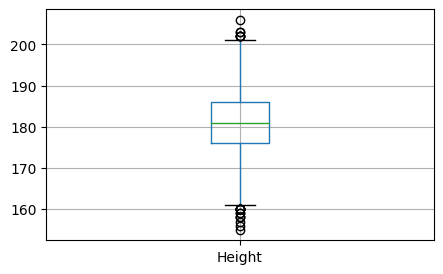

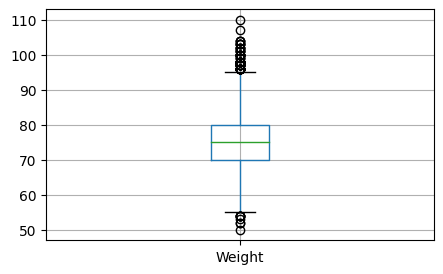

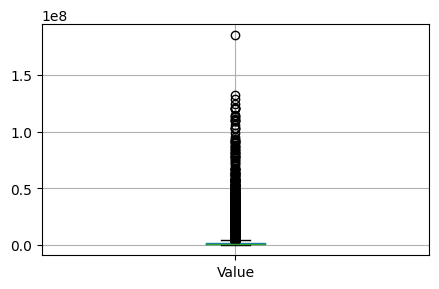

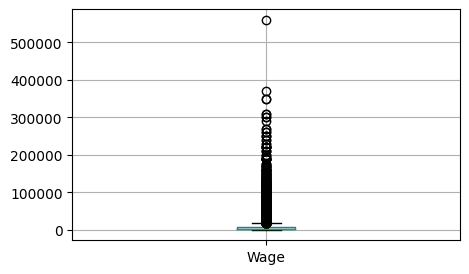

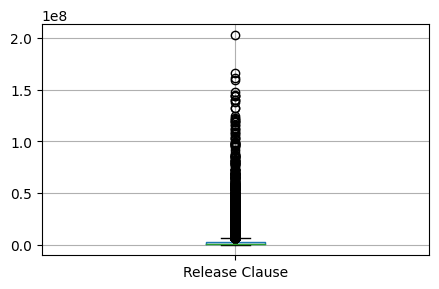

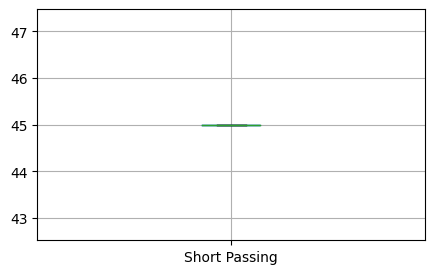

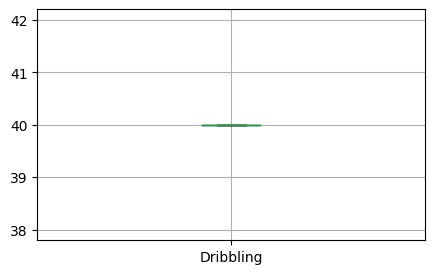

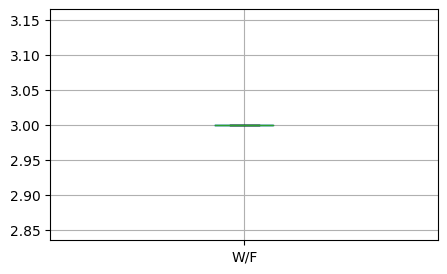

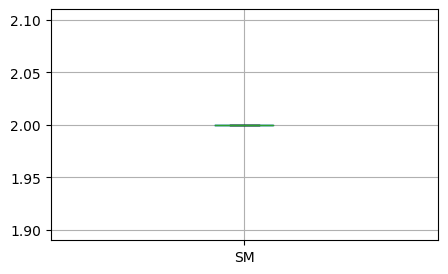

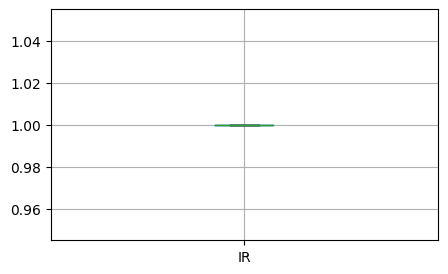

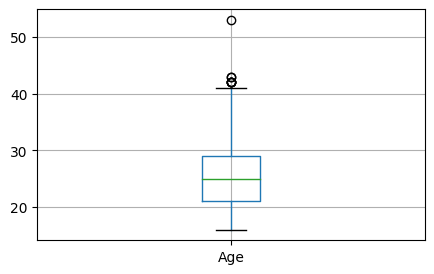

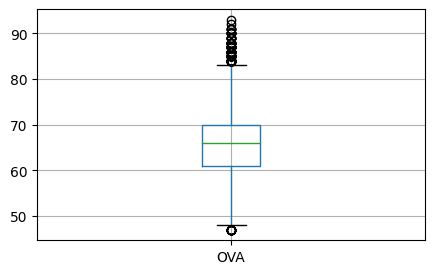

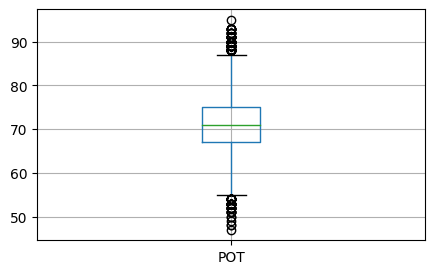

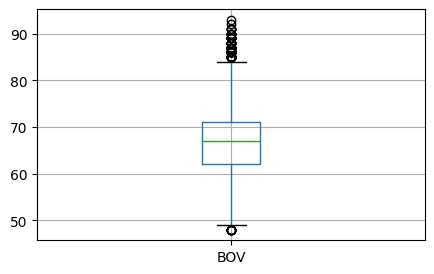

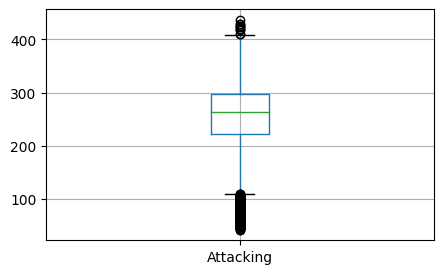

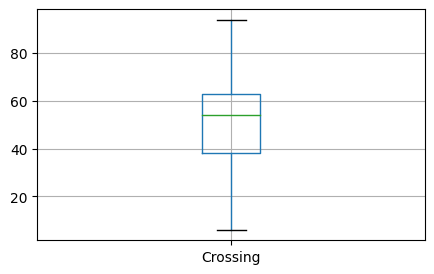

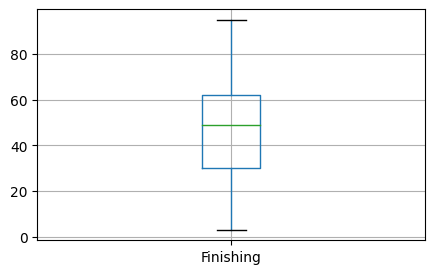

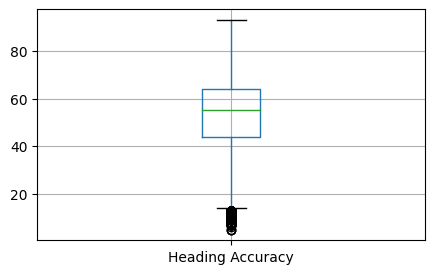

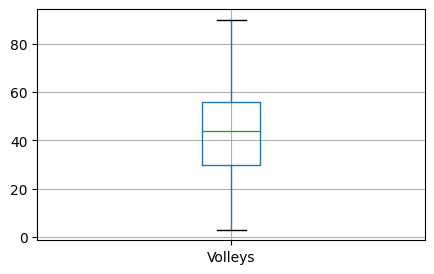

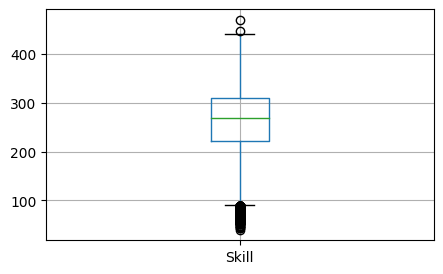

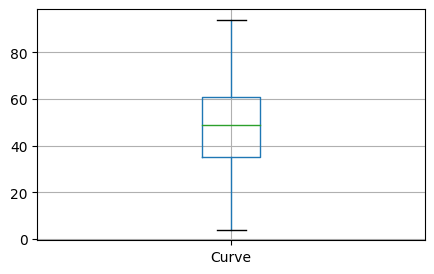

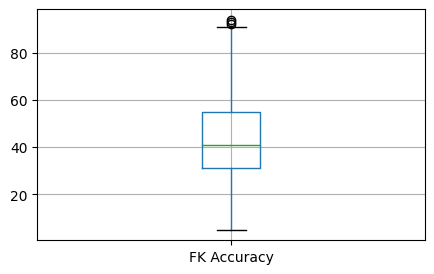

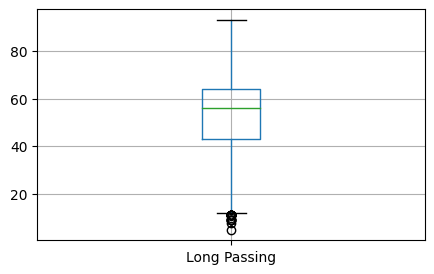

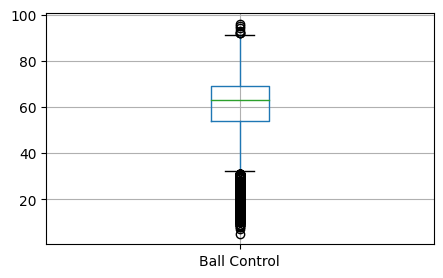

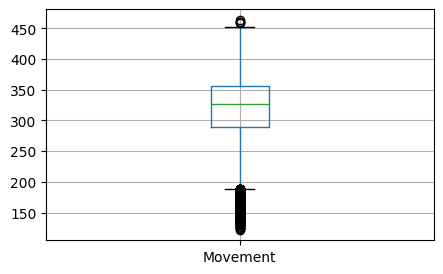

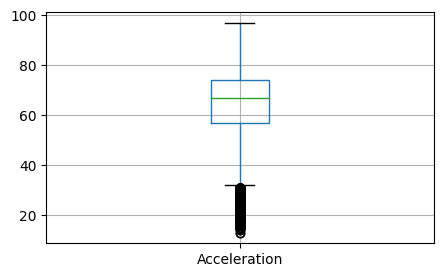

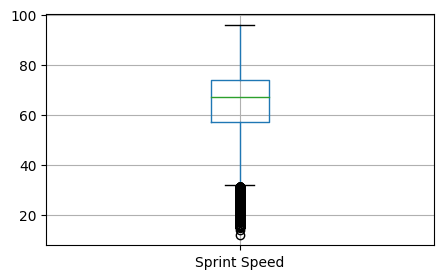

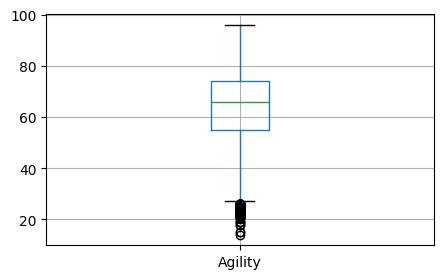

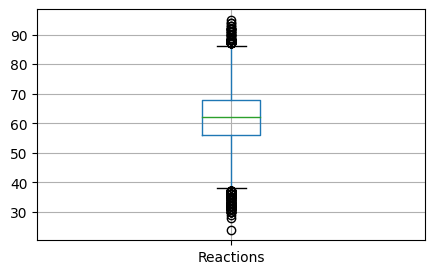

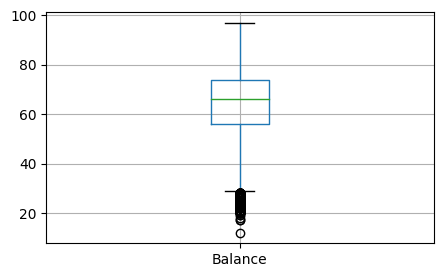

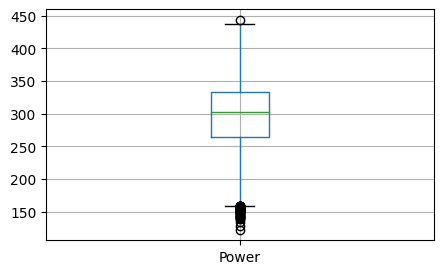

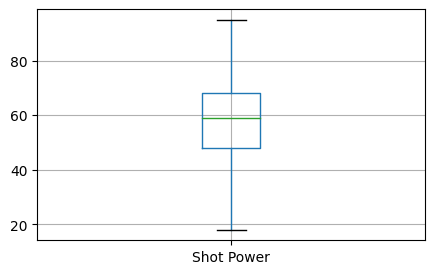

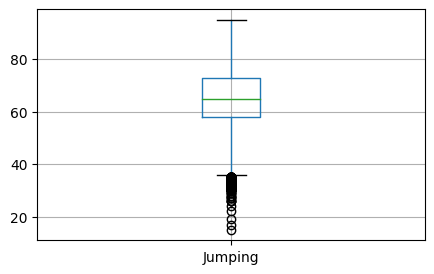

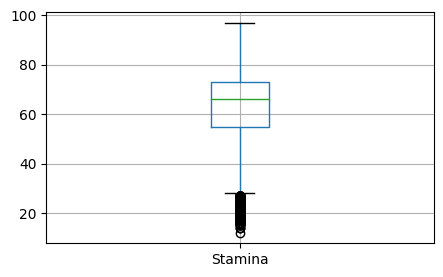

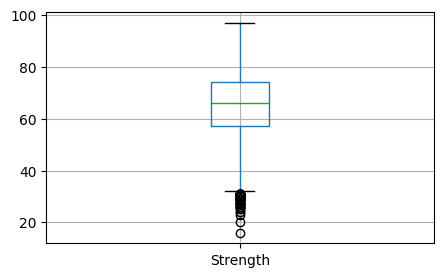

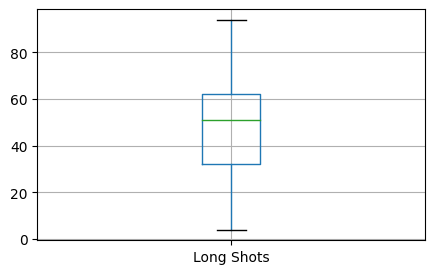

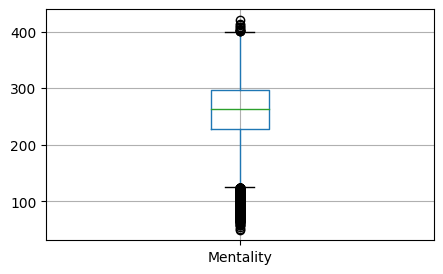

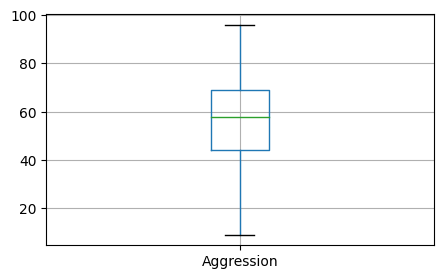

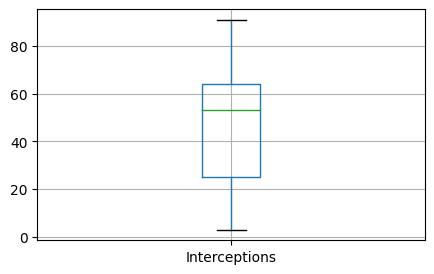

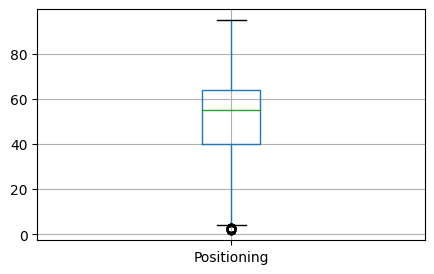

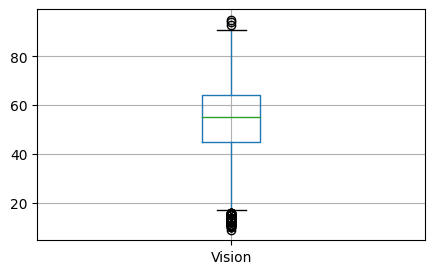

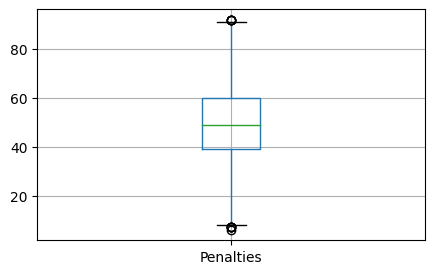

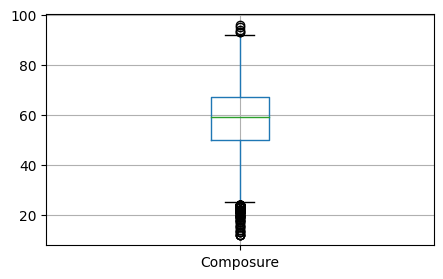

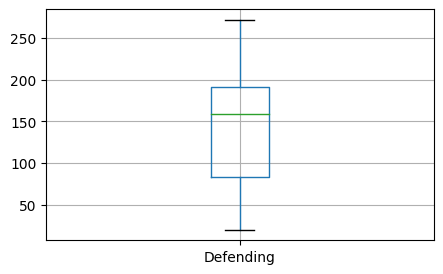

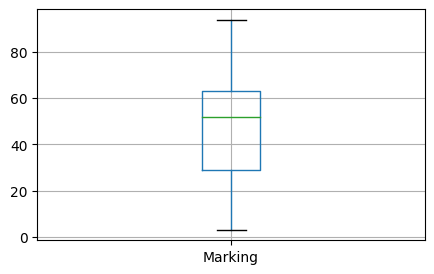

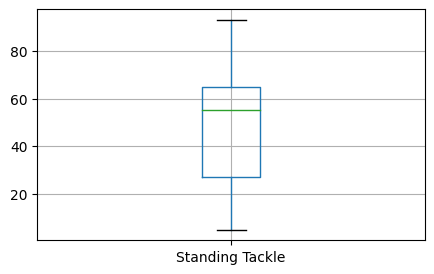

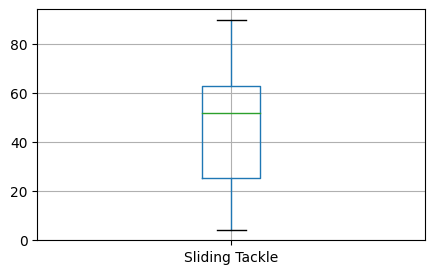

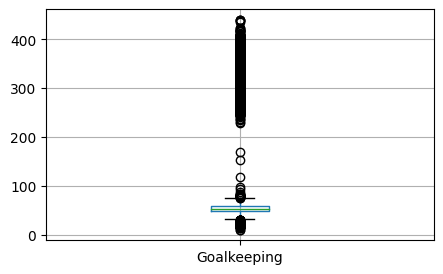

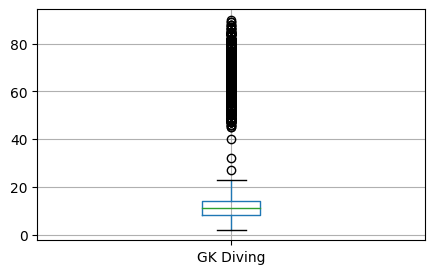

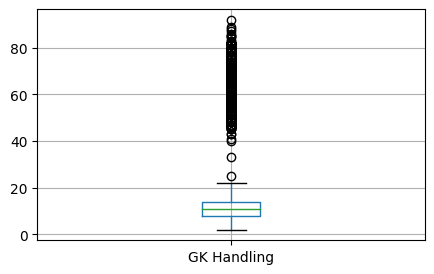

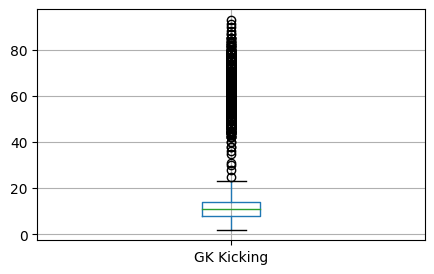

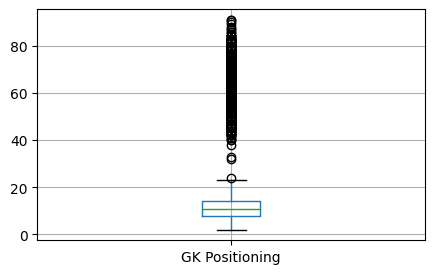

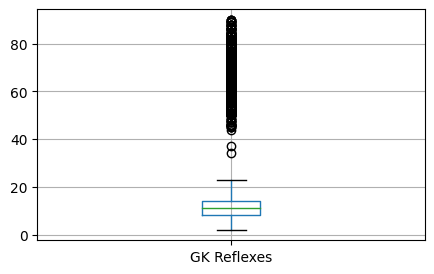

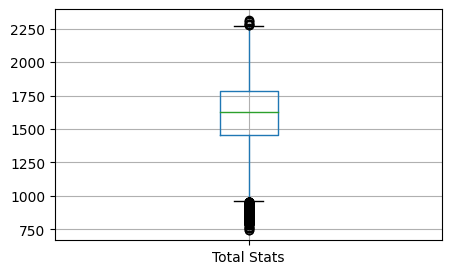

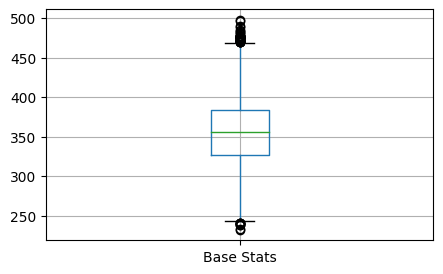

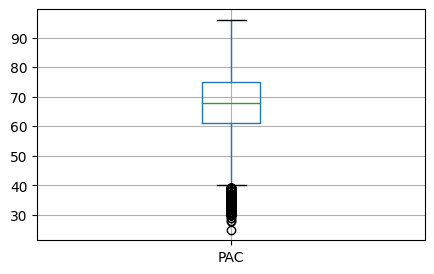

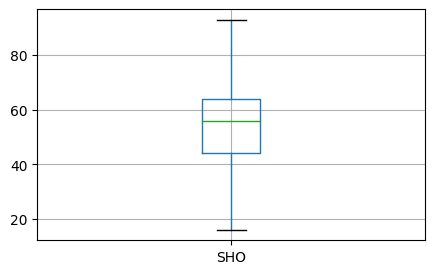

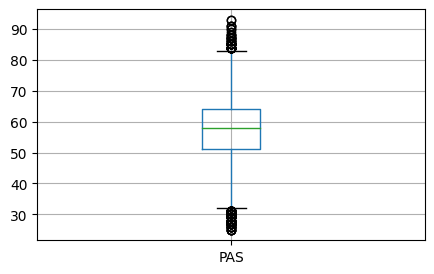

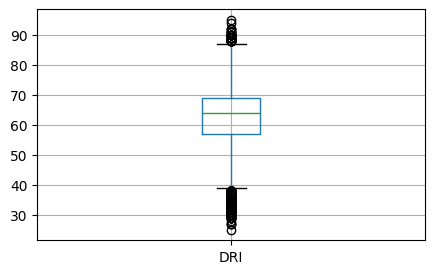

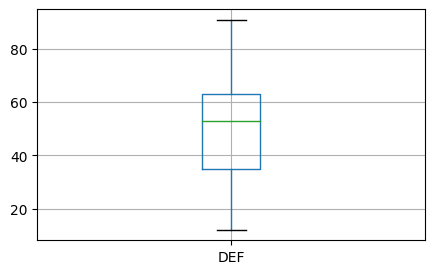

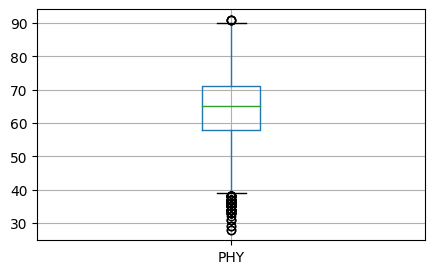

In [83]:
# Visualizing the outliers in these continous features

for variable in newDf.columns:
    plt.figure(figsize=(5,3))
    df_copy.boxplot(column=variable)
    plt.show()

In [84]:
len(newDf.select_dtypes(['float64', 'int64', 'int32']).columns)

61

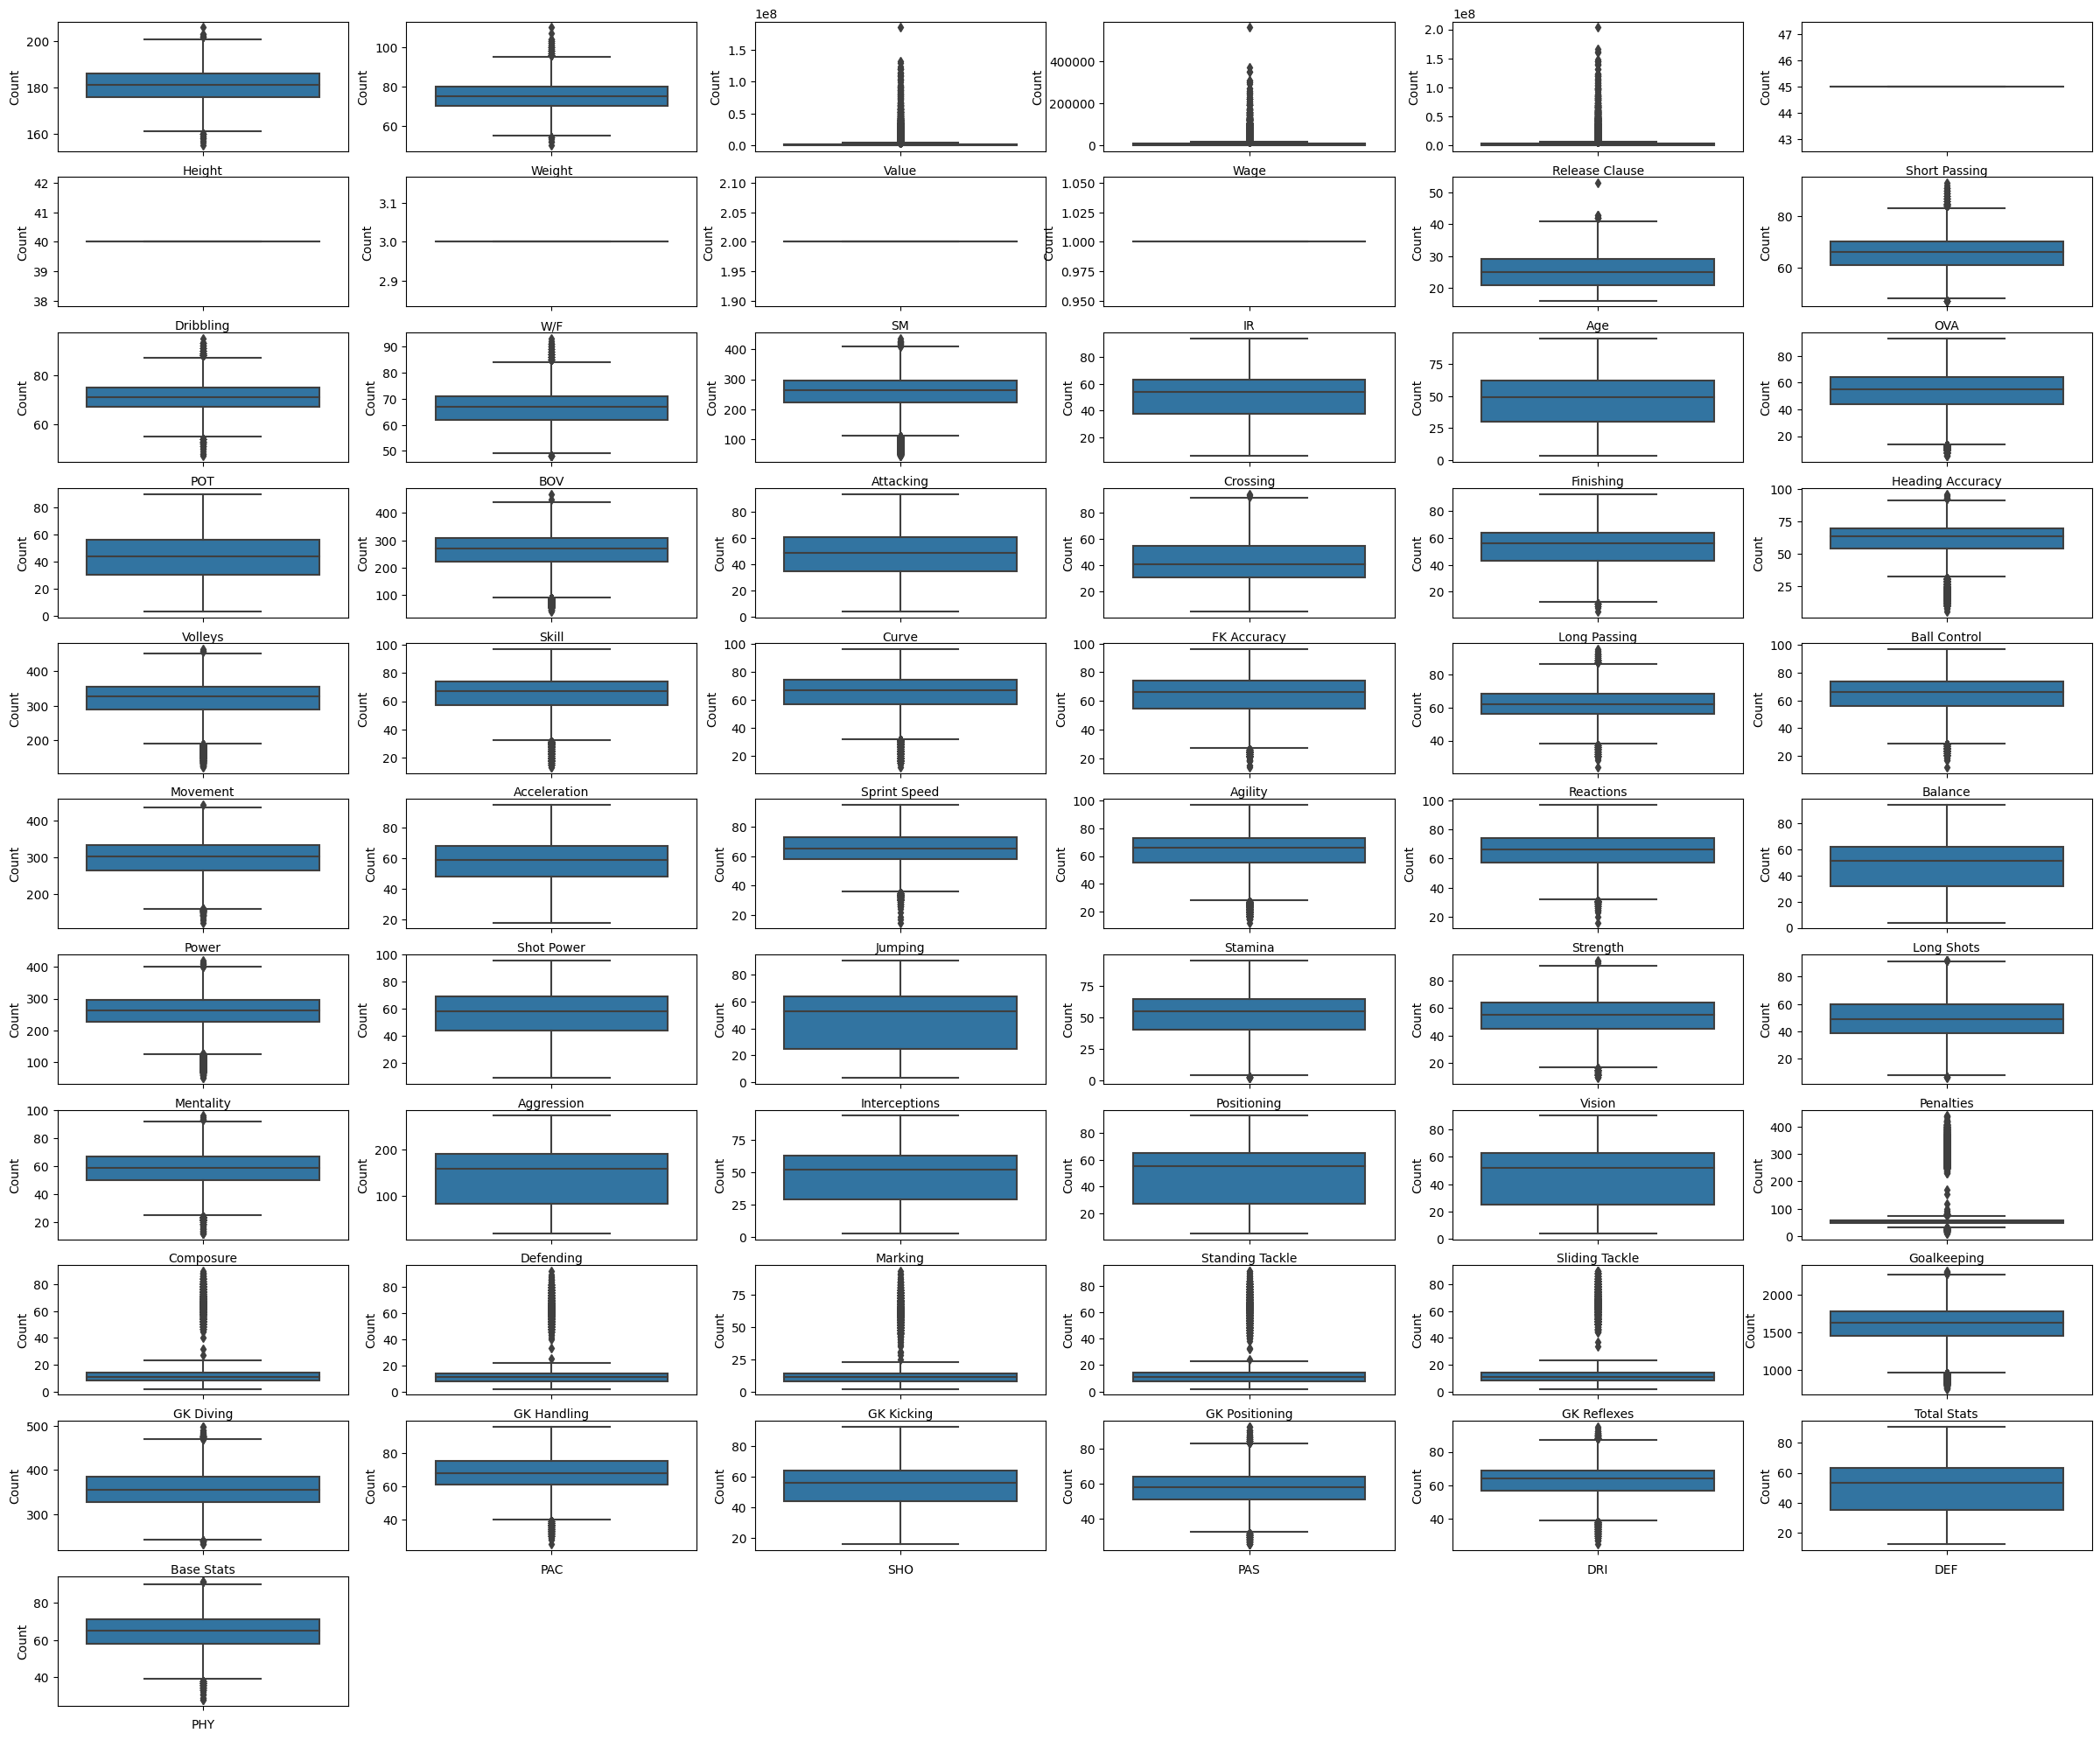

In [85]:
i = 1
plt.figure(figsize=(30, 25))
for col in newDf.columns:
        plt.subplot(11, 6, i)
        sns.boxplot(y=col, data=newDf)
        plt.xlabel(col)
        plt.ylabel("Count")
        i += 1

### Outlier Treatment

We are going to use the Interquatile Range Method to treat these Identified outliers

In [86]:
# Inspecting the distribution of outliers in our data
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in newDf.columns:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(newDf[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(newDf.loc[newDf[col]<LL,col]) + len(newDf.loc[newDf[col]>UL,col])
    percent = (total_outliers / len(newDf.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: Height
Upper Limit = 201.0
Lower Limit = 161.0
Percentage of Outliers= 0.11591759312924813
-------------------------------------------------- 

--------------------------------------------------
Column: Weight
Upper Limit = 95.0
Lower Limit = 55.0
Percentage of Outliers= 0.3899046314347437
-------------------------------------------------- 

--------------------------------------------------
Column: Value
Upper Limit = 4287500.0
Lower Limit = -1812500.0
Percentage of Outliers= 12.102850518994678
-------------------------------------------------- 

--------------------------------------------------
Column: Wage
Upper Limit = 18500.0
Lower Limit = -9500.0
Percentage of Outliers= 12.413720427841298
-------------------------------------------------- 

--------------------------------------------------
Column: Release Clause
Upper Limit = 6362500.0
Lower Limit = -3137500.0
Percentage of Outliers= 15.021866273249382
-----------------

### Data Inference about Outliers

A good number of features in the dataset contain outliers with the `Wage` having the most significant number of outliers

### Treating Outliers

In [87]:
# Outliers in the lower limit
newDf.loc[newDf[col]<LL]

Height  Weight      Value     Wage  Release Clause  Short Passing   
2403      161      57  3300000.0  12000.0       6200000.0             45  \
2719      173      72  1900000.0   8000.0       3600000.0             45   
5768      170      60  1300000.0    650.0       2200000.0             45   
6534      168      65  2400000.0   8000.0       2900000.0             45   
7057      163      60  1300000.0   4000.0       1300000.0             45   
7253      168      55  2700000.0   9000.0       3100000.0             45   
7738      163      59  1600000.0   5000.0       1700000.0             45   
8414      179      71  1200000.0   3000.0       1700000.0             45   
8500      165      62  1900000.0   7000.0             0.0             45   
8713      174      70  1900000.0  11000.0       1900000.0             45   
9676      175      65  1800000.0   4000.0             0.0             45   
9840      177      64  1600000.0   2000.0       1400000.0             45   
9883      167      60   700000.0   2000.0        775000.0             45   
10337     170      64  1900000.0   4000.0       3100000.0             45   
10396     170      60  1600000.0   8000.0             0.0             45   
10474     173      67  1600000.0   2000.0       1600000.0             45   
10505     176      73  1600000.0   5000.0       1900000.0             45   
11471     176      64   625000.0   2000.0        831000.0             45   
11878     173      65  1300000.0   1000.0       1400000.0             45   
11883     174      60  1400000.0   1000.0       2100000.0             45   
12034     167      60  1300000.0    750.0       1800000.0             45   
12401     165      55  1100000.0   8000.0       1100000.0             45   
12573     167      59  1500000.0   1000.0       2200000.0             45   
13343     173      68   375000.0   2000.0        426000.0             45   
13359     166      66   425000.0    500.0        699000.0             45   
13838     173      74   900000.0   2000.0        736000.0             45   
13897     174      70   900000.0   2000.0        736000.0             45   
14106     165      55   825000.0    950.0       1100000.0             45   
14355     182      67   800000.0   1000.0       1100000.0             45   
14768     175      65   725000.0   1000.0        656000.0             45   
14805     168      62   525000.0   2000.0        578000.0             45   
14865     173      68   600000.0   3000.0        930000.0             45   
14896     175      65   550000.0   6000.0        665000.0             45   
14909     172      73   575000.0   2000.0        956000.0             45   
15094     168      60   675000.0   2000.0       1100000.0             45   
15234     165      59   550000.0   4000.0        601000.0             45   
15241     174      66   525000.0   2000.0        715000.0             45   
15400     163      63   550000.0   2000.0        495000.0             45   
15451     170      60   575000.0   1000.0        934000.0             45   
15668     168      62   500000.0    750.0        388000.0             45   
15802     182      70   525000.0    750.0        728000.0             45   
15915     175      68   500000.0   1000.0        396000.0             45   
16010     173      70   575000.0    850.0        691000.0             45   
16078     174      72   550000.0    500.0        726000.0             45   
16317     170      60   650000.0    750.0        798000.0             45   
16382     177      70   500000.0    500.0        494000.0             45   
16464     163      62   525000.0    500.0        469000.0             45   
16502     165      60   500000.0   5000.0             0.0             45   
16518     170      60   525000.0    600.0        469000.0             45   
16522     172      65   475000.0    900.0        571000.0             45   
16573     168      69   500000.0    500.0        506000.0             45   
16609     174      63   325000.0   2000.0        255000

In [88]:
# Outliers in the upper limit
newDf.loc[newDf[col]>UL]

Height  Weight        Value      Wage  Release Clause  Short Passing   
7        191      91  102000000.0  160000.0     120300000.0             45  \
12       185      84   90500000.0  310000.0     122000000.0             45   
262      192      92    3400000.0   41000.0       3600000.0             45   
4122     176      82    2800000.0     650.0       7000000.0             45   

      Dribbling  W/F  SM  IR  Age   OVA   POT  BOV  Attacking  Crossing   
7            40    3   2   1   27  90.0  91.0   90      114.0      17.0  \
12           40    3   2   1   28  89.0  89.0   89      349.0      58.0   
262          40    3   2   1   42  82.0  82.0   82       95.0      13.0   
4122         40    3   2   1   24  71.0  77.0   72      255.0      66.0   

      Finishing  Heading Accuracy  Volleys  Skill  Curve  FK Accuracy   
7          13.0              19.0     20.0  138.0   19.0         18.0  \
12         64.0              80.0     63.0  369.0   63.0         74.0   
262        15.0              13.0     17.0  122.0   20.0         13.0   
4122       48.0              44.0     31.0  242.0   31.0         29.0   

      Long Passing  Ball Control  Movement  Acceleration  Sprint Speed   
7             44.0          30.0     268.0          56.0          47.0  \
12            84.0          79.0     343.0          60.0          69.0   
262           35.0          28.0     251.0          37.0          30.0   
4122          64.0          62.0     373.0          79.0          77.0   

      Agility  Reactions  Balance  Power  Shot Power  Jumping  Stamina   
7        40.0       88.0     37.0  240.0        64.0     52.0     32.0  \
12       61.0       87.0     66.0  437.0        88.0     87.0     90.0   
262      55.0       80.0     49.0  243.0        56.0     71.0     34.0   
4122     72.0       65.0     80.0  320.0        33.0     77.0     86.0   

      Strength  Long Shots  Mentality  Aggression  Interceptions  Positioning   
7         78.0        14.0      140.0          27           11.0         13.0  \
12        91.0        81.0      396.0          91           87.0         72.0   
262       69.0        13.0      150.0          38           28.0         12.0   
4122      95.0        29.0      283.0          93           66.0         45.0   

      Vision  Penalties  Composure  Defending  Marking  Standing Tackle   
7         66       23.0       65.0       50.0     15.0             19.0  \
12        80       66.0       84.0      259.0     84.0             88.0   
262       50       22.0       70.0       35.0     13.0             11.0   
4122      40       39.0       57.0      208.0     68.0             72.0   

      Sliding Tackle  Goalkeeping  GK Diving  GK Handling  GK Kicking   
7               16.0        439.0       86.0         88.0        85.0  \
12              87.0         67.0       13.0         14.0        16.0   
262             11.0        396.0       77.0         76.0        74.0   
4122            68.0         63.0       14.0         12.0        11.0   

      GK Positioning  GK Reflexes  Total Stats  Base Stats   PAC   SHO   PAS   
7               91.0           89       1389.0         490  86.0  88.0  85.0  \
12              12.0           12       2220.0         463  65.0  73.0  76.0   
262             91.0           78       1292.0         429  77.0  76.0  74.0   
4122            14.0           12       1744.0         393  78.0  40.0  57.0   

       DRI   DEF   PHY  
7     89.0  51.0  91.0  
12    72.0  86.0  91.0  
262   78.0  33.0  91.0  
4122  61.0  66.0  91.0

- Using the Log Transformation Technique for Treating Outliers - This technique is employed to reduce skewness in variables and recenters the data, that is renormalizes the distribution of data points in the features

In [89]:
newDf.select_dtypes(include=['float64', 'int64', 'int32']).skew()

Height             -0.034554
Weight              0.229148
Value               7.998518
Wage                7.301848
Release Clause      6.886507
Short Passing       0.000000
Dribbling           0.000000
W/F                 0.000000
SM                  0.000000
IR                  0.000000
Age                 0.404401
OVA                 0.094674
POT                 0.199216
BOV                 0.119380
Attacking          -1.060109
Crossing           -0.617850
Finishing          -0.343749
Heading Accuracy   -0.868501
Volleys            -0.167897
Skill              -0.801369
Curve              -0.261203
FK Accuracy         0.117697
Long Passing       -0.590869
Ball Control       -1.341961
Movement           -0.794659
Acceleration       -0.862914
Sprint Speed       -0.880847
Agility            -0.629007
Reactions          -0.111219
Balance            -0.607722
Power              -0.455966
Shot Power         -0.232164
Jumping            -0.405893
Stamina            -0.900636
Strength      

Features with skewness score above 1 is treated to reduce the distortion of normality in the distribution of data in the feature due to the presence of outliers. In this data, the identified features with skewness value above 1 are `Goalkeeping, GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes`

In [90]:
#using log transformation on the listed features above to reduce skewness

newDf[['Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']] = np.log1p(newDf[['Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']])


C:\Users\okori\AppData\Local\Temp\ipykernel_28796\170170357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf[['Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']] = np.log1p(newDf[['Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']])


In [91]:
newDf.select_dtypes(include=['float64', 'int64', 'int32']).skew()

Height             -0.034554
Weight              0.229148
Value               7.998518
Wage                7.301848
Release Clause      6.886507
Short Passing       0.000000
Dribbling           0.000000
W/F                 0.000000
SM                  0.000000
IR                  0.000000
Age                 0.404401
OVA                 0.094674
POT                 0.199216
BOV                 0.119380
Attacking          -1.060109
Crossing           -0.617850
Finishing          -0.343749
Heading Accuracy   -0.868501
Volleys            -0.167897
Skill              -0.801369
Curve              -0.261203
FK Accuracy         0.117697
Long Passing       -0.590869
Ball Control       -1.341961
Movement           -0.794659
Acceleration       -0.862914
Sprint Speed       -0.880847
Agility            -0.629007
Reactions          -0.111219
Balance            -0.607722
Power              -0.455966
Shot Power         -0.232164
Jumping            -0.405893
Stamina            -0.900636
Strength      

-Inspecting the Outlier Treatment process

In [92]:
# Inspecting the distribution of outliers in our data
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in newDf.columns:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(newDf[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(newDf.loc[newDf[col]<LL,col]) + len(newDf.loc[newDf[col]>UL,col])
    percent = (total_outliers / len(newDf.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: Height
Upper Limit = 201.0
Lower Limit = 161.0
Percentage of Outliers= 0.11591759312924813
-------------------------------------------------- 

--------------------------------------------------
Column: Weight
Upper Limit = 95.0
Lower Limit = 55.0
Percentage of Outliers= 0.3899046314347437
-------------------------------------------------- 

--------------------------------------------------
Column: Value
Upper Limit = 4287500.0
Lower Limit = -1812500.0
Percentage of Outliers= 12.102850518994678
-------------------------------------------------- 

--------------------------------------------------
Column: Wage
Upper Limit = 18500.0
Lower Limit = -9500.0
Percentage of Outliers= 12.413720427841298
-------------------------------------------------- 

--------------------------------------------------
Column: Release Clause
Upper Limit = 6362500.0
Lower Limit = -3137500.0
Percentage of Outliers= 15.021866273249382
-----------------

In [140]:
# Bringing back the outcome variable previously isolated before outlier treatment process

newDf['Hits'] = continuous_vars['Hits']

## Data Preprocessing Phase:



### Feature Transformations

#### Binning Process - 
Creating 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into which I can convert the respective values into clusters/labels as follows:

- a. Height: Bucket intervals of 10 years.
- b. Weight: Bucket intervals of 10 kg.
- c. Wage: bucket intervals of 50K.
- d. Value: bucket intervals of 50M.
- e. Release Clause: bucket intervals of 50M.

In [141]:
# Understanding the size of data points in the height attributes

max_height = newDf['Height'].max()

print('Maximum height in the height attribute is:', max_height)

min_height = newDf['Height'].min()

print('\n')
print('minimum height in the height attribute is:', min_height)

print('\n')
# Range of values in the Height feature
print('The range of values in the Height attribute is:', max_height - min_height)

Maximum height in the height attribute is: 206


minimum height in the height attribute is: 155


The range of values in the Height attribute is: 51


In [142]:
# Understanding the size of data points in the weight attributes

max_weight = newDf['Weight'].max()

print('Maximum weight in the weight attribute is:', max_weight)

min_weight = newDf['Weight'].min()

print('\n')
print('Minimum weight in the weight attribute is:', min_weight)

print('\n')
# Range of values in the Height feature
print('The range of values in the Weight attribute is:', max_height - min_weight)

Maximum weight in the weight attribute is: 110


Minimum weight in the weight attribute is: 50


The range of values in the Weight attribute is: 156


In [143]:
# Understanding the size of data points in the Release Clause attributes

max_releaseClause = newDf['Release Clause'].max()

print('Maximum value in the release clause attribute is:', max_releaseClause)

min_releaseClause = newDf['Release Clause'].min()

print('\n')
print('Minimum value in the release clause attribute is:', min_releaseClause)

print('\n')
# Range of values in the Height feature
print('The range of values in the release clause attribute is:', max_releaseClause - min_releaseClause)

Maximum value in the release clause attribute is: 203100000.0


Minimum value in the release clause attribute is: 0.0


The range of values in the release clause attribute is: 203100000.0


In [144]:
# Understanding the size of data points in the value attributes

max_value = newDf['Value'].max()

print('Maximum value in the value attribute is:', max_value)

min_value = newDf['Value'].min()

print('\n')
print('Minimum value in the value attribute is:', min_value)

print('\n')
# Range of values in the Height feature
print('The range of values in the value attribute is:', max_value - min_value)

Maximum value in the value attribute is: 185500000.0


Minimum value in the value attribute is: 0.0


The range of values in the value attribute is: 185500000.0


In [145]:
# Understanding the size of data points in the value attributes

max_value = newDf['Wage'].max()

print('Maximum value in the wage attribute is:', max_value)

min_value = newDf['Wage'].min()

print('\n')
print('Minimum value in the wage attribute is:', min_value)

print('\n')
# Range of values in the Height feature
print('The range of values in the wage attribute is:', max_value - min_value)

Maximum value in the wage attribute is: 560000.0


Minimum value in the wage attribute is: 0.0


The range of values in the wage attribute is: 560000.0


From the calculationn above, it is possible to obtain 5 bins of clusters/groups of Height attribute using Binning.

In [146]:
# Handling the numerical features above with binning process to create the clusters as required

# Bining the height attribute
newDf['Binned_height'] = pd.cut(
newDf['Height'],
bins=5,
labels=['very short', 'short', 'average', 'tall', 'very tall'])

# Bining the weight attribute
newDf['Binned_weight'] = pd.cut(
newDf['Weight'],
bins=15,
labels=['tiny', 'very_light', 'light', 'very_skinny', 'skinny','chubby', 
        'very_chubby', 'quite_chubby', 'huge', 'plumpy','quite_obess', 'very_obess','highly_obess','fat', 'very_fat'])

# Bining the height attribute
newDf['Binned_releaseClause'] = pd.cut(
newDf['Release Clause'],
bins=20,
labels=['A', 'B', 'C','D','E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'])


# Bining the Value attribute
newDf['Binned_value'] = pd.cut(
newDf['Value'],
bins=19,
labels=['A', 'B', 'C','D','E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S'])


# Bining the Wage attribute
newDf['Binned_wage'] = pd.cut(
newDf['Wage'],
bins=19,
labels=['A', 'B', 'C','D','E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S'])

In [147]:
# Inspecting to ensure the Binning proccess was succesful
newDf.sample(10)

Height  Weight       Value     Wage  Release Clause  Short Passing   
5472      175      72   1400000.0   5000.0       1500000.0             45  \
2314      184      80   5000000.0  39000.0             0.0             45   
7293      177      75   1100000.0    550.0       1700000.0             45   
14316     187      79    750000.0   2000.0        984000.0             45   
1617      183      76   1800000.0  23000.0       4500000.0             45   
5527      178      70   1500000.0   5000.0       1900000.0             45   
18542     175      68    220000.0    500.0        250000.0             45   
11703     185      84    300000.0   3000.0        480000.0             45   
216       179      70  32500000.0  59000.0      43700000.0             45   
13669     183      80    900000.0   1000.0        975000.0             45   

       Dribbling  W/F  SM  IR  Age   OVA   POT  BOV  Attacking  Crossing   
5472          40    3   2   1   29  69.0  69.0   70      257.0      53.0  \
2314          40    3   2   1   25  74.0  75.0   75      350.0      68.0   
7293          40    3   2   1   29  68.0  68.0   68      304.0      73.0   
14316         40    3   2   1   20  61.0  76.0   63      195.0      35.0   
1617          40    3   2   1   34  75.0  75.0   75      284.0      54.0   
5527          40    3   2   1   27  69.0  69.0   69      293.0      60.0   
18542         40    3   2   1   18  52.0  72.0   53      216.0      54.0   
11703         40    3   2   1   31  64.0  64.0   64       83.0      12.0   
216           40    3   2   1   27  82.0  82.0   82      391.0      82.0   
13669         40    3   2   1   20  62.0  74.0   64      179.0      26.0   

       Finishing  Heading Accuracy  Volleys  Skill  Curve  FK Accuracy   
5472        46.0              42.0     40.0  301.0   53.0         46.0  \
2314        66.0              68.0     70.0  360.0   68.0         64.0   
7293        61.0              59.0     41.0  336.0   70.0         72.0   
14316       20.0              60.0     23.0  200.0   28.0         22.0   
1617        39.0              74.0     40.0  316.0   56.0         44.0   
5527        65.0              56.0     49.0  269.0   51.0         30.0   
18542       30.0              44.0     32.0  232.0   43.0         39.0   
11703       14.0              14.0     12.0   90.0   14.0         12.0   
216         79.0              72.0     75.0  398.0   84.0         72.0   
13669       16.0              62.0     17.0  178.0   19.0         19.0   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed   
5472           67.0          72.0     353.0          68.0          65.0  \
2314           74.0          78.0     335.0          63.0          60.0   
7293           59.0          67.0     339.0          78.0          74.0   
14316          48.0          54.0     269.0          54.0          55.0   
1617           76.0          71.0     298.0          40.0          52.0   
5527           53.0          67.0     385.0          93.0          93.0   
18542          49.0          55.0     300.0          64.0          62.0   
11703          30.0          21.0     240.0          44.0          49.0   
216            76.0          84.0     398.0          82.0          78.0   
13669          54.0          48.0     300.0          67.0          70.0   

       Agility  Reactions  Balance  Power  Shot Power  Jumping  Stamina   
5472      69.0       70.0     81.0  325.0        50.0     74.0     80.0  \
2314      72.0       72.0     68.0  368.0        80.0     66.0     76.0   
7293      60.0       59.0     68.0  340.0        63.0     68.0     72.0   
14316     51.0       52.0     57.0  271.0        40.0     64.0     62.0   
1617      64.0       78.0     64.0  327.0        67.0     77.0     52.0   
5527      73.0       63.0     63.0  323.0        62.0     73.0     69.0   
18542     51.0       50.0     73.0  257.0        52.0     62.0     51.0   
11703     48.0       63.0     36.0  214.0        48.0     58.0     35.0   
216   

-Merging back together the categorical variables and the numerical variables

In [148]:
df2 = pd.concat([label_vars, bool_vars, newDf], axis=1)

# Inspecting the data cleaned and preprocessed so far

df2.sample(5)

Preferred Foot Best Position     A/W     D/W           PlayerName   
2459           Right           CDM  Medium    High   Pol Llonch Puyalto  \
14540          Right            RM  Medium  Medium          Alfie Bates   
12942          Right            CB  Medium  Medium       Joakim Lindner   
14783          Right            ST  Medium     Low        Joseph Mendes   
240            Right            GK  Medium  Medium       Geronimo Rulli   

      PlayerStatus     LB    LWB    RWB     CM     ST     RM     GK     RW   
2459        Active  False  False  False   True  False  False  False  False  \
14540       Active  False  False  False   True  False  False  False  False   
12942       Active  False  False  False  False  False  False  False  False   
14783       Active  False  False  False  False   True   True  False  False   
240         Active  False  False  False  False  False  False   True  False   

          LM    CDM     CB    CAM     RB     CF     LW  Height  Weight   
2459   False   True  False  False  False  False  False     171      70  \
14540  False   True  False  False  False  False  False     173      64   
12942  False  False   True  False  False  False  False     193      86   
14783  False  False  False  False  False  False  False     186      80   
240    False  False  False  False  False  False  False     189      84   

            Value     Wage  Release Clause  Short Passing  Dribbling  W/F  SM   
2459    4300000.0  10000.0       9500000.0             45         40    3   2  \
14540    775000.0   2000.0       1200000.0             45         40    3   2   
12942    400000.0    750.0        375000.0             45         40    3   2   
14783    325000.0   2000.0        438000.0             45         40    3   2   
240    26000000.0  35000.0      42400000.0             45         40    3   2   

       IR  Age   OVA   POT  BOV  Attacking  Crossing  Finishing   
2459    1   27  74.0  75.0   74      263.0      55.0       43.0  \
14540   1   19  61.0  75.0   64      266.0      57.0       52.0   
12942   1   29  63.0  63.0   63      248.0      51.0       35.0   
14783   1   29  61.0  61.0   61      284.0      51.0       58.0   
240     1   28  82.0  84.0   82       87.0      12.0       15.0   

       Heading Accuracy  Volleys  Skill  Curve  FK Accuracy  Long Passing   
2459               44.0     53.0  296.0   53.0         55.0          60.0  \
14540              43.0     51.0  303.0   60.0         58.0          63.0   
12942              61.0     39.0  277.0   54.0         54.0          55.0   
14783              61.0     58.0  276.0   59.0         57.0          44.0   
240                12.0     16.0   91.0   19.0         20.0          23.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions   
2459           66.0     389.0          78.0          77.0     74.0       69.0  \
14540          61.0     349.0          72.0          71.0     75.0       55.0   
12942          62.0     264.0          60.0          64.0     47.0       59.0   
14783          57.0     327.0          68.0          78.0     68.0       53.0   
240            15.0     292.0          56.0          52.0     58.0       76.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots   
2459      91.0  348.0        65.0     80.0     87.0      65.0        51.0  \
14540     76.0  308.0        58.0     64.0     77.0      54.0        55.0   
12942     34.0  294.0        59.0     49.0     71.0      76.0        39.0   
14783     60.0  311.0        60.0     71.0     41.0      80.0        59.0   
240       50.0  255.0        58.0     65.0     42.0      73.0        17.0   

       Mentality  Aggression  Interceptions  Positioning  Vision  Penalties   
2459       332.0          89           80.0         55.0      57       51.0  \
14540      286.0          65           52.0         54.0      63       52.0   
12942      269.0          56           64.0         52.0      57       40.0   
14783      261.0      

### One Hot Encoding

This is used to transform the categorical labels generated by Bining the features above to back to numerical attributes fit for modeling purpose

In [149]:
#Handling categorical data (creating dummy variables)

df2 = pd.get_dummies(df2, columns=['Binned_height', 'Binned_weight', 'Binned_releaseClause', 'Binned_value', 'Binned_wage'], dtype=int)

In [150]:
# Inspecting the transformation process
df2.sample(5)

Preferred Foot Best Position     A/W     D/W           PlayerName   
9488           Right            RM    High  Medium    Mohamed Ezzarfani  \
13586          Right           CDM  Medium    High   Toumani Diagouraga   
6937           Right            ST    High     Low           Sergiu Bus   
6152            Left           LWB  Medium    High       Jimmy Medranda   
11402          Right            ST  Medium  Medium          Paul Gladon   

      PlayerStatus     LB    LWB    RWB     CM     ST     RM     GK     RW   
9488       On Loan  False  False  False  False  False   True  False  False  \
13586       Active  False  False  False   True  False  False  False  False   
6937        Active  False  False  False  False   True  False  False  False   
6152        Active   True  False  False   True  False  False  False  False   
11402       Active  False  False  False  False   True  False  False  False   

          LM    CDM     CB    CAM     RB     CF     LW  Height  Weight   
9488    True  False  False   True  False  False  False     176      75  \
13586  False   True  False  False  False  False  False     188      72   
6937   False  False  False  False  False  False  False     185      82   
6152   False  False  False  False  False  False   True     173      68   
11402  False  False  False  False  False  False  False     188      83   

           Value    Wage  Release Clause  Short Passing  Dribbling  W/F  SM   
9488   1900000.0  2000.0             0.0             45         40    3   2  \
13586   240000.0  2000.0        315000.0             45         40    3   2   
6937   1400000.0  8000.0       1500000.0             45         40    3   2   
6152   1700000.0  4000.0       1700000.0             45         40    3   2   
11402   600000.0  3000.0        713000.0             45         40    3   2   

       IR  Age   OVA   POT  BOV  Attacking  Crossing  Finishing   
9488    1   22  66.0  76.0   67      290.0      62.0       63.0  \
13586   1   33  62.0  62.0   64      276.0      52.0       54.0   
6937    1   27  68.0  69.0   69      305.0      48.0       69.0   
6152    1   26  69.0  72.0   70      277.0      66.0       62.0   
11402   1   28  64.0  64.0   64      296.0      43.0       60.0   

       Heading Accuracy  Volleys  Skill  Curve  FK Accuracy  Long Passing   
9488               52.0     50.0  314.0   52.0         65.0          61.0  \
13586              63.0     44.0  300.0   57.0         57.0          61.0   
6937               69.0     60.0  274.0   44.0         61.0          46.0   
6152               44.0     37.0  305.0   50.0         57.0          56.0   
11402              71.0     60.0  276.0   55.0         50.0          51.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions   
9488           67.0     340.0          74.0          73.0     70.0       59.0  \
13586          64.0     261.0          54.0          52.0     48.0       56.0   
6937           63.0     335.0          65.0          70.0     69.0       65.0   
6152           72.0     373.0          76.0          71.0     76.0       65.0   
11402          65.0     266.0          46.0          46.0     50.0       67.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots   
9488      64.0  285.0        61.0     60.0     57.0      59.0        48.0  \
13586     51.0  294.0        56.0     34.0     73.0      79.0        52.0   
6937      66.0  360.0        76.0     75.0     67.0      78.0        64.0   
6152      85.0  311.0        68.0     54.0     66.0      61.0        62.0   
11402     57.0  352.0        75.0     75.0     62.0      78.0        62.0   

       Mentality  Aggression  Interceptions  Positioning  Vision  Penalties   
9488       228.0          29           22.0         61.0      58       58.0  \
13586      303.0          64           68.0         56.0      62       53.0   
6937       286.0          59           47.0         70.0      51       59.0   
6152       318.0          73      

Converting the following columns into integer data types for modeling purposes: `LM, ST, GK, LB, RM, CB, CDM, RB, LWB, CAM, RW, CF, LW,, CM, RWB`

In [151]:
bools = df2.select_dtypes('bool')

for col in bools.columns:
    df2[col] = df2[col].astype('int')

In [152]:
# Inspecting the preprocessing process to ensure the process was completed
df2.sample(5)

Preferred Foot Best Position     A/W     D/W                 PlayerName   
15136          Right            ST  Medium  Medium             Daishawn Redan  \
12915          Right            GK  Medium  Medium       Samuel Portugal Lima   
8170           Right            ST    High  Medium               Mario Rondon   
2354           Right            CB     Low  Medium   Xabier Etxeita Gorritxat   
1375           Right            GK  Medium  Medium        Karl Johan Johnsson   

      PlayerStatus  LB  LWB  RWB  CM  ST  RM  GK  RW  LM  CDM  CB  CAM  RB   
15136       Active   0    0    0   0   1   0   0   0   0    0   0    0   0  \
12915       Active   0    0    0   0   0   0   1   0   0    0   0    0   0   
8170        Active   0    0    0   0   1   0   0   0   0    0   0    0   0   
2354        Active   0    0    0   0   0   0   0   0   0    0   1    0   0   
1375        Active   0    0    0   0   0   0   1   0   0    0   0    0   0   

       CF  LW  Height  Weight      Value     Wage  Release Clause   
15136   0   0     176      76   700000.0   4000.0       1200000.0  \
12915   0   0     188      80   525000.0   1000.0        761000.0   
8170    0   0     182      74   500000.0   6000.0        560000.0   
2354    0   0     186      78  2700000.0  21000.0       7600000.0   
1375    0   0     189      84  5500000.0  16000.0       8300000.0   

       Short Passing  Dribbling  W/F  SM  IR  Age   OVA   POT  BOV  Attacking   
15136             45         40    3   2   1   19  60.0  80.0   62      262.0  \
12915             45         40    3   2   1   26  63.0  67.0   63       92.0   
8170              45         40    3   2   1   34  67.0  67.0   67      329.0   
2354              45         40    3   2   1   32  74.0  74.0   74      247.0   
1375              45         40    3   2   1   30  76.0  77.0   76      106.0   

       Crossing  Finishing  Heading Accuracy  Volleys  Skill  Curve   
15136      43.0       64.0              57.0     48.0  248.0   52.0  \
12915      19.0       14.0              13.0     19.0   90.0   19.0   
8170       68.0       65.0              70.0     63.0  321.0   63.0   
2354       36.0       29.0              77.0     38.0  249.0   35.0   
1375       11.0       13.0              19.0     19.0  114.0   12.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration   
15136         40.0          40.0          59.0     351.0          77.0  \
12915         14.0          21.0          21.0     228.0          45.0   
8170          59.0          63.0          69.0     338.0          70.0   
2354          43.0          59.0          65.0     271.0          34.0   
1375          11.0          45.0          30.0     252.0          50.0   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping   
15136          74.0     71.0       55.0     74.0  296.0        63.0     62.0  \
12915          41.0     36.0       55.0     51.0  215.0        42.0     56.0   
8170           66.0     70.0       68.0     64.0  367.0        67.0     91.0   
2354           49.0     66.0       71.0     51.0  314.0        54.0     78.0   
1375           49.0     45.0       72.0     36.0  246.0        55.0     68.0   

       Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions   
15136     58.0      60.0        53.0      236.0          40           21.0  \
12915     33.0      66.0        18.0      136.0          26           12.0   
8170      74.0      72.0        63.0      291.0          74           23.0   
2354      68.0      80.0        34.0      242.0          80           74.0   
1375      39.0      71.0        13.0      148.0          37           20.0   

       Positioning  Vision  Penalties  Composure  Defending  Marking   
15136         58.0      57       60.0       58.0       52.0     20.0  \
12915         14.0      59       25.0       32.0       40.0     11.0   
8170          68.0      66       60.0       70.0       63.0     22.0   
2354          28.0      30       30.0 

### Understanding the Distribution of Categorical Labels in our Data

In [153]:
labels = df2.select_dtypes('object')
labels.columns

Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W', 'PlayerName',
       'PlayerStatus'],
      dtype='object')

In [107]:
df2.describe(include='object')

Preferred Foot Best Position     A/W     D/W  PlayerName PlayerStatus
count           18979         18979   18979   18979       18979        18979
unique              2            15       3       3       18843            2
top             Right            CB  Medium  Medium   Peng Wang       Active
freq            14445          3686   12701   13956           3        17966

In [108]:
labels.isna().sum()

Preferred Foot    0
Best Position     0
A/W               0
D/W               0
PlayerName        0
PlayerStatus      0
dtype: int64

### - Treating Data In-Balance

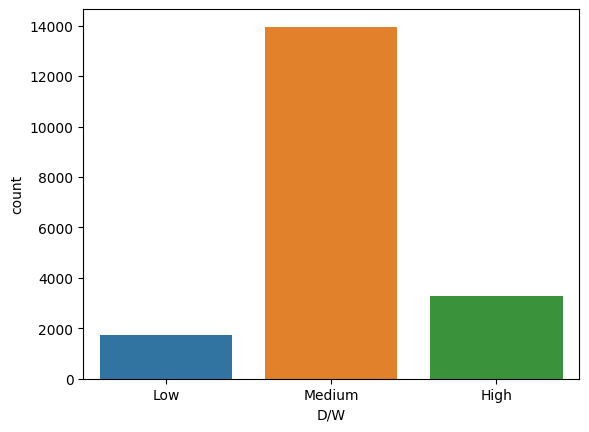

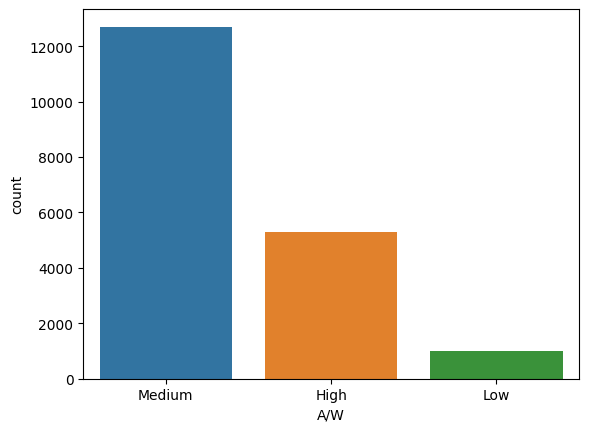

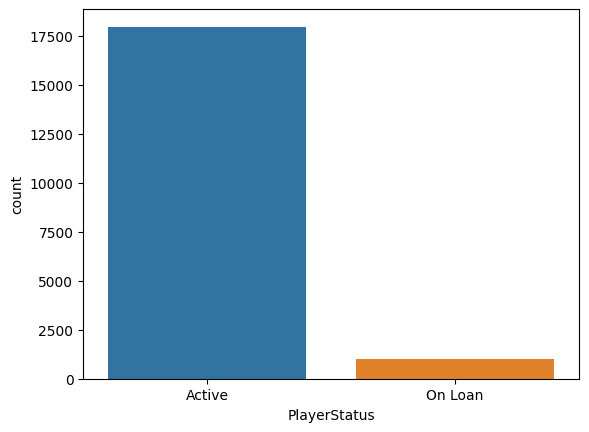

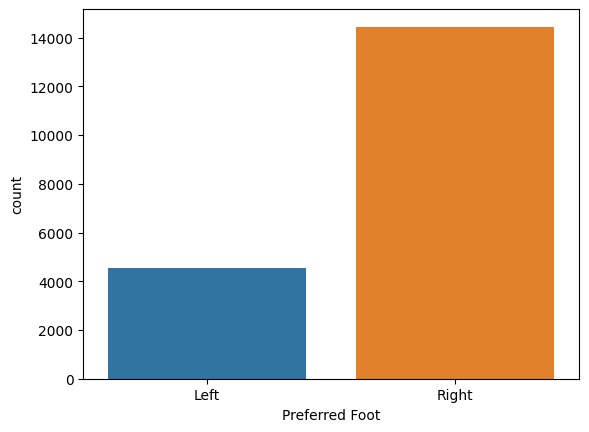

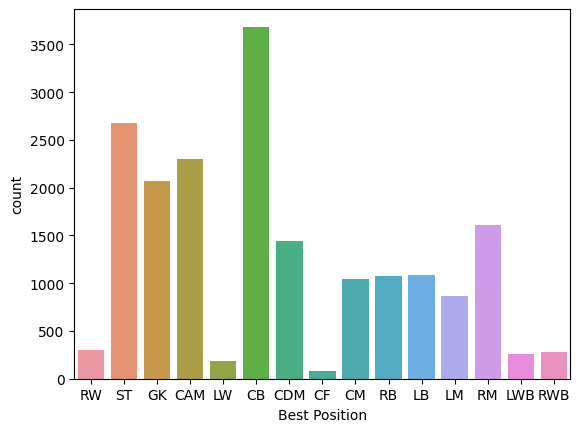

In [109]:

# Distribution of labels in our data
# Data In-balance:


# Counting the labels in the D/W feature
sns.countplot(x=labels['D/W'])
plt.show()

# Counting the labels in the A/W feature
sns.countplot(x=labels['A/W'])
plt.show()

# Counting the labels in the PlayerStatus feature
sns.countplot(x=labels['PlayerStatus'])
plt.show()

# Counting the labels in the D/W feature
sns.countplot(x=labels['Preferred Foot'])
plt.show()

# Counting the labels in the Best Position feature
sns.countplot(x=labels['Best Position'])
plt.show()

 *Inference

As can be seen in the plots above, there is a very high level of Data Imbalance in the distribution of labels in the features which needs to be treated

- Undertsanding the Underlying Relationship Between the Categorical labels in the data and the outcome variable `Hits`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3203: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3203: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3203: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3203: UserWarning: Setting `sharey=False` with `color=None` may cause different le

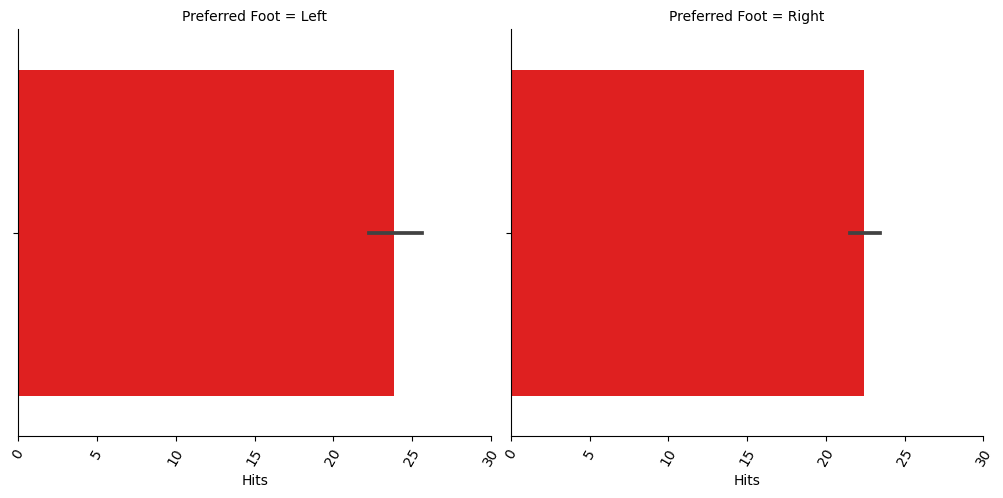

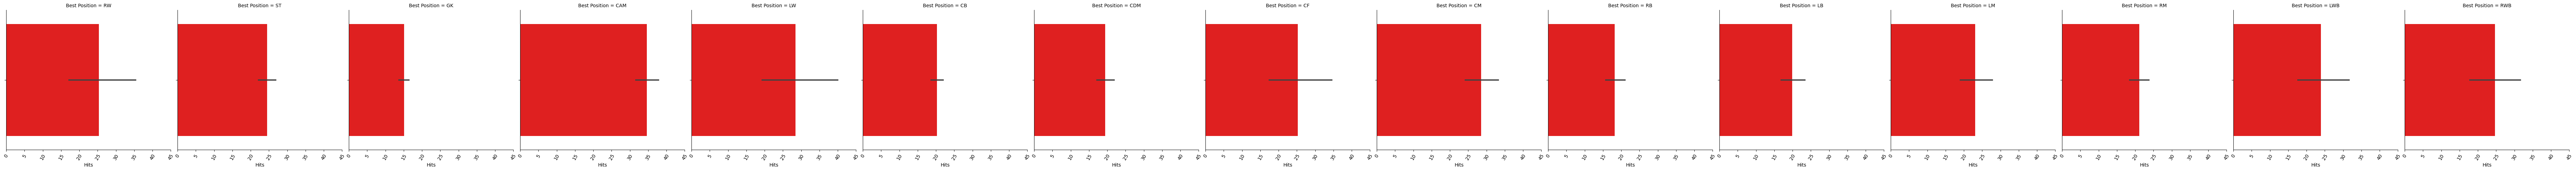

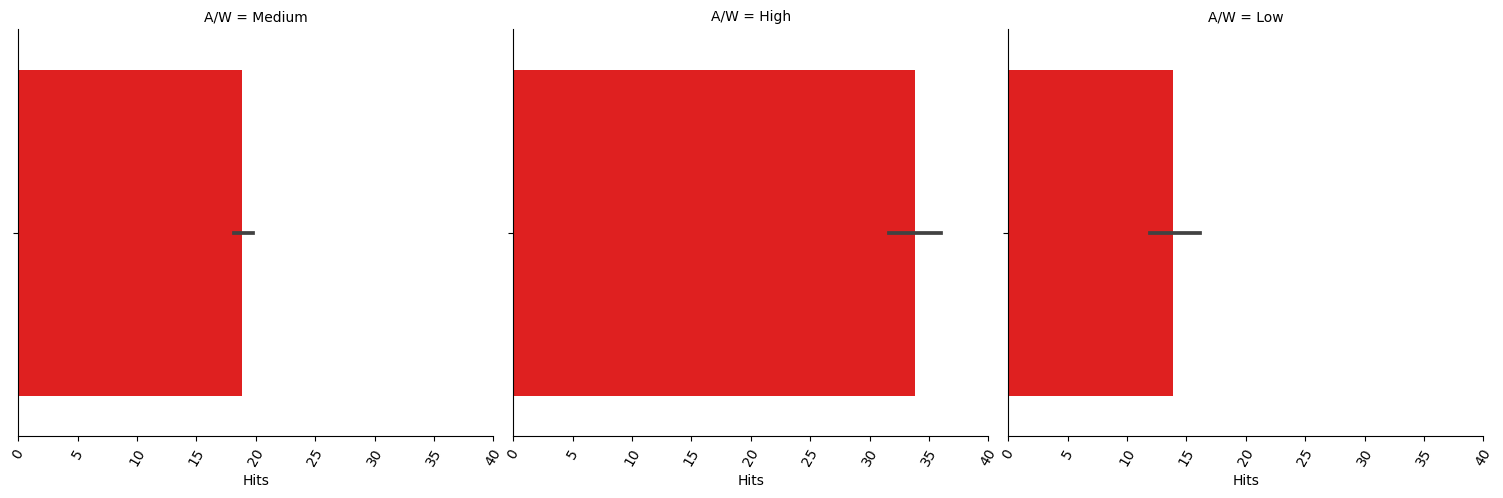

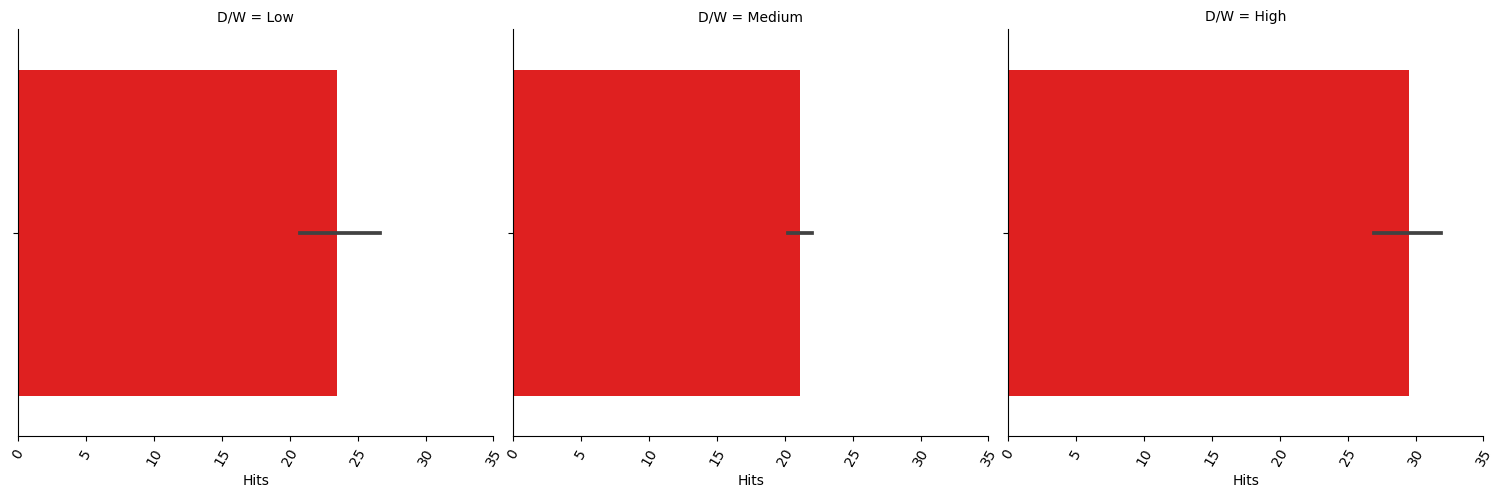

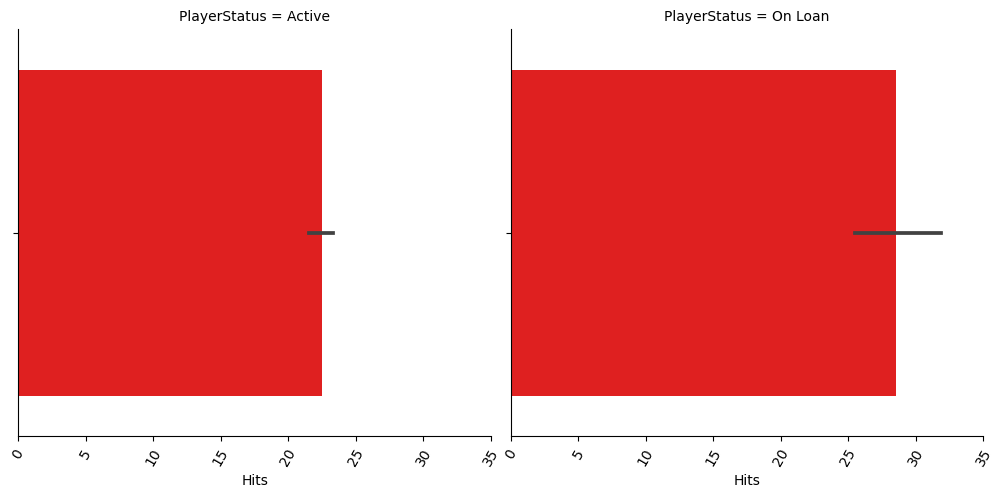

In [110]:
for col in labels:
    if col != 'PlayerName':
        g = sns.catplot(x='Hits', col=col, kind='bar', data=df2, sharey=False, palette=["#FF0000", "#00FF00", "#0000FF"])
        g.set_xticklabels(rotation=60)

- Because we have ordinal categorical labels in the A/W and D/W variables, I will encode them using Label Encoder Transformation

In [155]:
# Handling categorical data (label encoding)


# For A/W column
encoder = LabelEncoder()
df2['A/W_encoded'] = encoder.fit_transform(df2['A/W'])


# For D/W column
encoder = LabelEncoder()
df2['D/W_encoded'] = encoder.fit_transform(df2['D/W'])


#Drop the columns after encoding
df2.drop(['A/W', 'D/W'], inplace=True, axis=1)

- Because the Best Position and PlayerStatus features have nominal labels without any form of ranking, the best transformation approach will be to perform one-hot transformation

In [156]:
df2 = pd.get_dummies(df2, columns=['Preferred Foot', 'Best Position', 'PlayerStatus'], dtype='int')

In [157]:
# Inspecting the data cleaning process
df2.sample(5)

PlayerName  LB  LWB  RWB  CM  ST  RM  GK  RW  LM  CDM  CB   
7109              Mihai Radut   0    0    0   1   0   1   0   0   1    0   0  \
11075         Fridolin Wagner   0    0    0   1   0   0   0   0   0    1   0   
18006      Laurenz Beckemeyer   0    0    0   0   0   0   1   0   0    0   0   
2877                Gen Shoji   0    0    0   0   0   0   0   0   0    0   1   
12119   Steven Prieto Morales   0    0    0   0   1   0   0   0   0    0   0   

       CAM  RB  CF  LW  Height  Weight      Value     Wage  Release Clause   
7109     0   0   0   0     178      67  1200000.0   5000.0       1100000.0  \
11075    0   0   0   0     182      78  1300000.0   2000.0       1100000.0   
18006    0   0   0   0     182      75   230000.0   1000.0        175000.0   
2877     0   0   0   0     182      76  3200000.0  10000.0       5600000.0   
12119    0   0   0   0     182      78  1100000.0   2000.0       1000000.0   

       Short Passing  Dribbling  W/F  SM  IR  Age   OVA   POT  BOV  Attacking   
7109              45         40    3   2   1   30  68.0  68.0   68      305.0  \
11075             45         40    3   2   1   22  64.0  72.0   67      268.0   
18006             45         40    3   2   1   20  54.0  66.0   54       52.0   
2877              45         40    3   2   1   27  73.0  75.0   75      238.0   
12119             45         40    3   2   1   22  63.0  72.0   65      281.0   

       Crossing  Finishing  Heading Accuracy  Volleys  Skill  Curve   
7109       66.0       62.0              54.0     58.0  332.0   66.0  \
11075      35.0       59.0              53.0     55.0  266.0   34.0   
18006       6.0        7.0               9.0      9.0   54.0   10.0   
2877       40.0       29.0              70.0     28.0  251.0   37.0   
12119      38.0       65.0              63.0     55.0  252.0   45.0   

       FK Accuracy  Long Passing  Ball Control  Movement  Acceleration   
7109          66.0          65.0          69.0     348.0          73.0  \
11075         42.0          63.0          65.0     331.0          66.0   
18006          7.0          20.0          11.0     174.0          34.0   
2877          34.0          70.0          57.0     354.0          71.0   
12119         42.0          41.0          63.0     311.0          63.0   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping   
7109           70.0     70.0       64.0     71.0  325.0        64.0     57.0  \
11075          66.0     67.0       64.0     68.0  334.0        62.0     73.0   
18006          34.0     37.0       39.0     30.0  208.0        38.0     70.0   
2877           81.0     64.0       72.0     66.0  334.0        67.0     76.0   
12119          62.0     61.0       58.0     67.0  333.0        67.0     70.0   

       Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions   
7109      75.0      67.0        62.0      310.0          58           52.0  \
11075     72.0      65.0        62.0      289.0          69           65.0   
18006     29.0      63.0         8.0       70.0          22           10.0   
2877      68.0      74.0        49.0      240.0          74           74.0   
12119     66.0      69.0        61.0      261.0          63           26.0   

       Positioning  Vision  Penalties  Composure  Defending  Marking   
7109          66.0      66       68.0       61.0      153.0     48.0  \
11075         58.0      58       39.0       56.0      197.0     66.0   
18006          6.0      24        8.0       29.0       27.0      6.0   
2877          29.0      31       32.0       69.0      225.0     78.0   
12119         65.0      47       60.0       53.0       60.0     19.0   

       Standing Tackle  Sliding Tackle  Goalkeeping  GK Diving  GK Handling   
7109              55.0            50.0     3.988984   2.772589     2.397895  \
11075             66.0            65.0     3.912023   2.484907     2.708050   
18006             10.0            11.0     5.598422   4.060443     4.025352   
2877       

Player Name and the outcome variable will be isolated from the dataset before further data transformation is carried out

In [158]:
df3 = df2.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])
# df3 will now contain only the numerical features which we need for our modeling
df3.sample(5)

LB  LWB  RWB  CM  ST  RM  GK  RW  LM  CDM  CB  CAM  RB  CF  LW  Height   
18632   0    0    0   1   0   0   0   0   0    0   0    0   0   0   0     178  \
14634   0    0    0   0   0   1   0   0   1    0   0    0   0   0   0     167   
4493    0    0    0   0   0   0   0   0   0    0   1    0   1   0   0     182   
14510   0    0    0   0   0   0   0   0   0    0   0    0   1   0   0     187   
4540    0    0    0   0   0   0   0   0   0    0   1    0   0   0   0     193   

       Weight      Value     Wage  Release Clause  Short Passing  Dribbling   
18632      64   140000.0   1000.0        150000.0             45         40  \
14634      63   425000.0   6000.0        577000.0             45         40   
4493       75  2300000.0  15000.0       4900000.0             45         40   
14510      81   350000.0   3000.0             0.0             45         40   
4540       90  1500000.0   5000.0       2300000.0             45         40   

       W/F  SM  IR  Age   OVA   POT  BOV  Attacking  Crossing  Finishing   
18632    3   2   1   19  51.0  66.0   55      232.0      45.0       44.0  \
14634    3   2   1   25  61.0  64.0   62      254.0      55.0       51.0   
4493     3   2   1   25  71.0  74.0   71      276.0      67.0       35.0   
14510    3   2   1   27  61.0  62.0   64      286.0      55.0       58.0   
4540     3   2   1   28  70.0  71.0   71      253.0      56.0       33.0   

       Heading Accuracy  Volleys  Skill  Curve  FK Accuracy  Long Passing   
18632              40.0     45.0  253.0   47.0         40.0          56.0  \
14634              42.0     53.0  261.0   53.0         39.0          45.0   
4493               62.0     42.0  305.0   68.0         58.0          53.0   
14510              73.0     35.0  242.0   41.0         22.0          64.0   
4540               71.0     32.0  304.0   67.0         68.0          62.0   

       Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions   
18632          55.0     298.0          63.0          64.0     62.0       44.0  \
14634          60.0     370.0          80.0          80.0     82.0       60.0   
4493           65.0     339.0          69.0          70.0     66.0       70.0   
14510          57.0     281.0          54.0          49.0     59.0       58.0   
4540           55.0     244.0          50.0          57.0     36.0       68.0   

       Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots   
18632     65.0  234.0        56.0     50.0     45.0      43.0        40.0  \
14634     68.0  286.0        62.0     55.0     63.0      54.0        52.0   
4493      64.0  342.0        71.0     67.0     68.0      72.0        64.0   
14510     61.0  271.0        32.0     73.0     68.0      76.0        22.0   
4540      33.0  372.0        78.0     77.0     71.0      90.0        56.0   

       Mentality  Aggression  Interceptions  Positioning  Vision  Penalties   
18632      215.0          42           36.0         48.0      49       40.0  \
14634      227.0          38           12.0         58.0      57       62.0   
4493       290.0          68           70.0         63.0      57       32.0   
14510      266.0          52           60.0         49.0      70       35.0   
4540       265.0          71           70.0         28.0      42       54.0   

       Composure  Defending  Marking  Standing Tackle  Sliding Tackle   
18632       58.0      132.0     42.0             45.0            45.0  \
14634       56.0       73.0     26.0             25.0            22.0   
4493        67.0      208.0     69.0             70.0            69.0   
14510       65.0      181.0     62.0             65.0            54.0   
4540        66.0      201.0     70.0             70.0            61.0   

       Goalkeeping  GK Diving  GK Handling  GK Kicking  GK Positioning   
18632     3.970292   2.772589     2.564949    1.945910        2.079442  \
14634     3.951244   2.079442     2.639057    2.708050        2.079442   
4493      4.143135   2.397895     2.708

Since we do not apply any kind of data transformation on the target feature, we need to isolate it from the rest of the data before we go ahead with rescaling process.

In [159]:
 df3.columns.get_loc("Hits") # Grabbing the index number of the outcome variable

76

In [160]:
# Isolating the outcome variable - Hits

cols = []
for col in df3.columns:
    if col != 'Hits':
        cols.append(col)
        
df4 = df3.loc[:, cols]

In [161]:
# Confirming if Hits still exists
cols = df4.columns
for col in cols:
    if col == 'Hits':
        print(col)

In [162]:
# Converting the dataframe into numpy arrays
X = df4.values
Y = df3['Hits']

In [163]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [164]:
Y

0        771.000000
1        562.000000
2        150.000000
3        207.000000
4        595.000000
            ...    
19016     22.759041
19017     22.759041
19018     22.759041
19019     22.759041
19020     22.759041
Name: Hits, Length: 18979, dtype: float64

### Rescaling the Data - Data Transformation

- Data Exploration to investigate the Scale, Scope and Shape of the various numnerical variables in the data

In [165]:
# Inspecting the scales of the features in the data

df3.describe()

LB           LWB           RWB            CM            ST   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.108646      0.019284      0.018652      0.209864      0.175668   
std        0.311203      0.137527      0.135297      0.407222      0.380547   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 RM            GK            RW            LM           CDM   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.125560      0.109331      0.075505      0.127035      0.149218   
std        0.331361      0.312063      0.264211      0.333021      0.356312   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 CB           CAM            RB            CF            LW   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.204436      0.117129      0.108172      0.019759      0.075241   
std        0.403300      0.321583      0.310606      0.139174      0.263787   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Height        Weight         Value           Wage   
count  18979.000000  18979.000000  1.897900e+04   18979.000000  \
mean     181.199220     75.018178  2.865063e+06    9092.062279   
std        6.840033      7.073268  7.685154e+06   19707.021089   
min      155.000000     50.000000  0.000000e+00       0.000000   
25%      176.000000     70.000000  4.750000e+05    1000.000000   
50%      181.000000     75.000000  9.500000e+05    3000.000000   
75%      186.000000     80.000000  2.000000e+06    8000.000000   
max      206.000000    110.000000  1.855000e+08  560000.000000   

       Release Clause  Short Passing  Dribbling      W/F       SM       IR   
count    1.897900e+04        18979.0    18979.0  18979.0  18979.0  18979.0  \
mean     3.963087e+06           45.0       40.0      3.0      2.0      1.0   
std      9.772715e+06            0.0        0.0      0.0      0.0      0.0   
min      0.000000e+00           45.0       40.0      3.0      2.0      1.0   
25%      4.250000e+05           45.0       40.0      3.0      2.0      1.0   
50%      1.000000e+06           45.0       40.0      3.0      2.0      1.0   
75%      2.800000e+06           45.0       40.0      3.0      2.0      1.0   
max      2.031000e+08           45.0       40.0      3.0      2.0      1.0   

                Age           OVA           POT           BOV     Attacking   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean      25.194109     65.717003     71.135729     66.751726    248.932188   
std        4.710520      6.967114      6.113922      6.747193     74.293773   
min       16.000000     47.000000     47.000000     48.000000     42.000000   
25%       21.000000     61.000000     67.000000     62.000000    222.000000   
50%       25.000000     66.000000     71.000000     67.000000    263.000000   
75%       29.000000     70.000

By careful inspection of the statistical properties of the numerical features in our dataset, we can see that the scales of the data variables are quite wide apart, which means there is need to rescale the data

"""We must convert our dataframe into an array before we can implement any feature
transformation. We call .values on the dataframe"""

In [166]:
# Before rescaling, isolate the outcome variable before treating the input variables

# Rescaling Transformation
scaler = MinMaxScaler() # Calling the constructor of the MinMaxScaler Class. Specify range
rescaledDf = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=2) # Precision is used to regulate the number of decimals displayed for each datapoints
rescaledDf

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

- Inspecting the Rescaling Operation

In [167]:
cols = df4.columns
cols = list(cols)

In [168]:
# Converting the rescaled X to a dataframe
df5 = pd.DataFrame(rescaledDf, columns=cols)

df5.head()

LB  LWB  RWB   CM   ST   RM   GK   RW   LM  CDM   CB  CAM   RB   CF   LW   
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  \
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   

     Height    Weight     Value      Wage  Release Clause  Short Passing   
0  0.294118  0.366667  0.557951  1.000000        0.681438            0.0  \
1  0.627451  0.550000  0.339623  0.392857        0.373708            0.0   
2  0.647059  0.616667  0.646900  0.223214        0.784835            0.0   
3  0.509804  0.333333  0.695418  0.660714        0.792713            0.0   
4  0.392157  0.300000  0.711590  0.482143        0.819793            0.0   

   Dribbling  W/F   SM   IR       Age       OVA       POT       BOV   
0        0.0  0.0  0.0  0.0  0.459459  1.000000  0.958333  1.000000  \
1        0.0  0.0  0.0  0.0  0.513514  0.978261  0.937500  0.977778   
2        0.0  0.0  0.0  0.0  0.297297  0.956522  0.958333  0.955556   
3        0.0  0.0  0.0  0.0  0.351351  0.956522  0.916667  0.955556   
4        0.0  0.0  0.0  0.0  0.324324  0.956522  0.916667  0.955556   

   Attacking  Crossing  Finishing  Heading Accuracy   Volleys     Skill   
0   0.979747  0.897727   1.000000          0.738636  0.977011  1.000000  \
1   1.000000  0.886364   1.000000          0.965909  0.954023  0.869767   
2   0.134177  0.079545   0.086957          0.113636  0.114943  0.160465   
3   0.924051  1.000000   0.858696          0.568182  0.908046  0.932558   
4   0.926582  0.897727   0.913043          0.647727  0.965517  0.948837   

      Curve  FK Accuracy  Long Passing  Ball Control  Movement  Acceleration   
0  0.988889     1.000000      0.977273      1.000000  0.961988      0.928571  \
1  0.855556     0.797753      0.818182      0.956044  0.903509      0.880952   
2  0.100000     0.101124      0.397727      0.274725  0.540936      0.357143   
3  0.900000     0.876404      1.000000      0.956044  0.807018      0.761905   
4  0.933333     0.943820      0.863636      0.989011  0.967836      0.964286   

   Sprint Speed   Agility  Reactions   Balance     Power  Shot Power  Jumping   
0      0.809524  0.939024   0.985915  0.976471  0.829193    0.883117   0.6625  \
1      0.940476  0.890244   1.000000  0.694118  1.000000    0.987013   1.0000   
2      0.571429  0.646341   0.901408  0.435294  0.453416    0.532468   0.7875   
3      0.761905  0.780488   0.943662  0.752941  0.888199    0.948052   0.6000   
4      0.916667  1.000000   0.943662  0.835294  0.729814    0.805195   0.5875   

    Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions   
0  0.705882  0.654321    1.000000   0.800539    0.402299       0.420455  \
1  0.847059  0.765432    0.988889   0.816712    0.620690       0.295455   
2  0.341176  0.765432    0.088889   0.242588    0.287356       0.181818   
3  0.905882  0.716049    0.966667   0.964960    0.770115       0.715909   
4  0.811765  0.419753    0.888889   0.824798    0.482759       0.375000   

   Positioning    Vision  Penalties  Composure  Defending   Marking   
0     0.978495  1.000000   0.802326   1.000000   0.281746  0.318681  \
1     1.000000  0.848837   0.906977   0.988095   0.253968  0.274725   
2     0.096774  0.651163   0.058140   0.666667   0.146825  0.263736   
3     0.924731  0.988372   0.906977   0.940476   0.658730  0.714286   
4     0.913978  0.941860   1.000000   0.964286   0.293651  0.351648   

   Standing Tackle  Sliding Tackle  Goalkeeping  GK Diving  GK Handling   
0         0.340909        0.232558     0.436026   0.248311     0.403698  \
1         0.306818        0.232558     0.455046   0.287444     0.403698   
2         0.079545        0.162791     0.998151   0.990176     1.000000   
3         0.681818        0.569767     0.4

In [169]:
df5.describe()

LB           LWB           RWB            CM            ST   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.108646      0.019284      0.018652      0.209864      0.175668   
std        0.311203      0.137527      0.135297      0.407222      0.380547   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 RM            GK            RW            LM           CDM   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.125560      0.109331      0.075505      0.127035      0.149218   
std        0.331361      0.312063      0.264211      0.333021      0.356312   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 CB           CAM            RB            CF            LW   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.204436      0.117129      0.108172      0.019759      0.075241   
std        0.403300      0.321583      0.310606      0.139174      0.263787   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Height        Weight         Value          Wage  Release Clause   
count  18979.000000  18979.000000  18979.000000  18979.000000    18979.000000  \
mean       0.513710      0.416970      0.015445      0.016236        0.019513   
std        0.134118      0.117888      0.041429      0.035191        0.048118   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.411765      0.333333      0.002561      0.001786        0.002093   
50%        0.509804      0.416667      0.005121      0.005357        0.004924   
75%        0.607843      0.500000      0.010782      0.014286        0.013786   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       Short Passing  Dribbling      W/F       SM       IR           Age   
count        18979.0    18979.0  18979.0  18979.0  18979.0  18979.000000  \
mean             0.0        0.0      0.0      0.0      0.0      0.248489   
std              0.0        0.0      0.0      0.0      0.0      0.127311   
min              0.0        0.0      0.0      0.0      0.0      0.000000   
25%              0.0        0.0      0.0      0.0      0.0      0.135135   
50%              0.0        0.0      0.0      0.0      0.0      0.243243   
75%              0.0        0.0      0.0      0.0      0.0      0.351351   
max              0.0        0.0      0.0      0.0      0.0      1.000000   

                OVA           POT           BOV     Attacking      Crossing   
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000  \
mean       0.406891      0.502828      0.416705      0.523879      0.496442   
std        0.151459      0.127373      0.149938      0.188086      0.206019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.304348      0.416667      0.311111      0.455696      0.36

### Data Standardization

#### Data Exploration using Univariate Density Plot

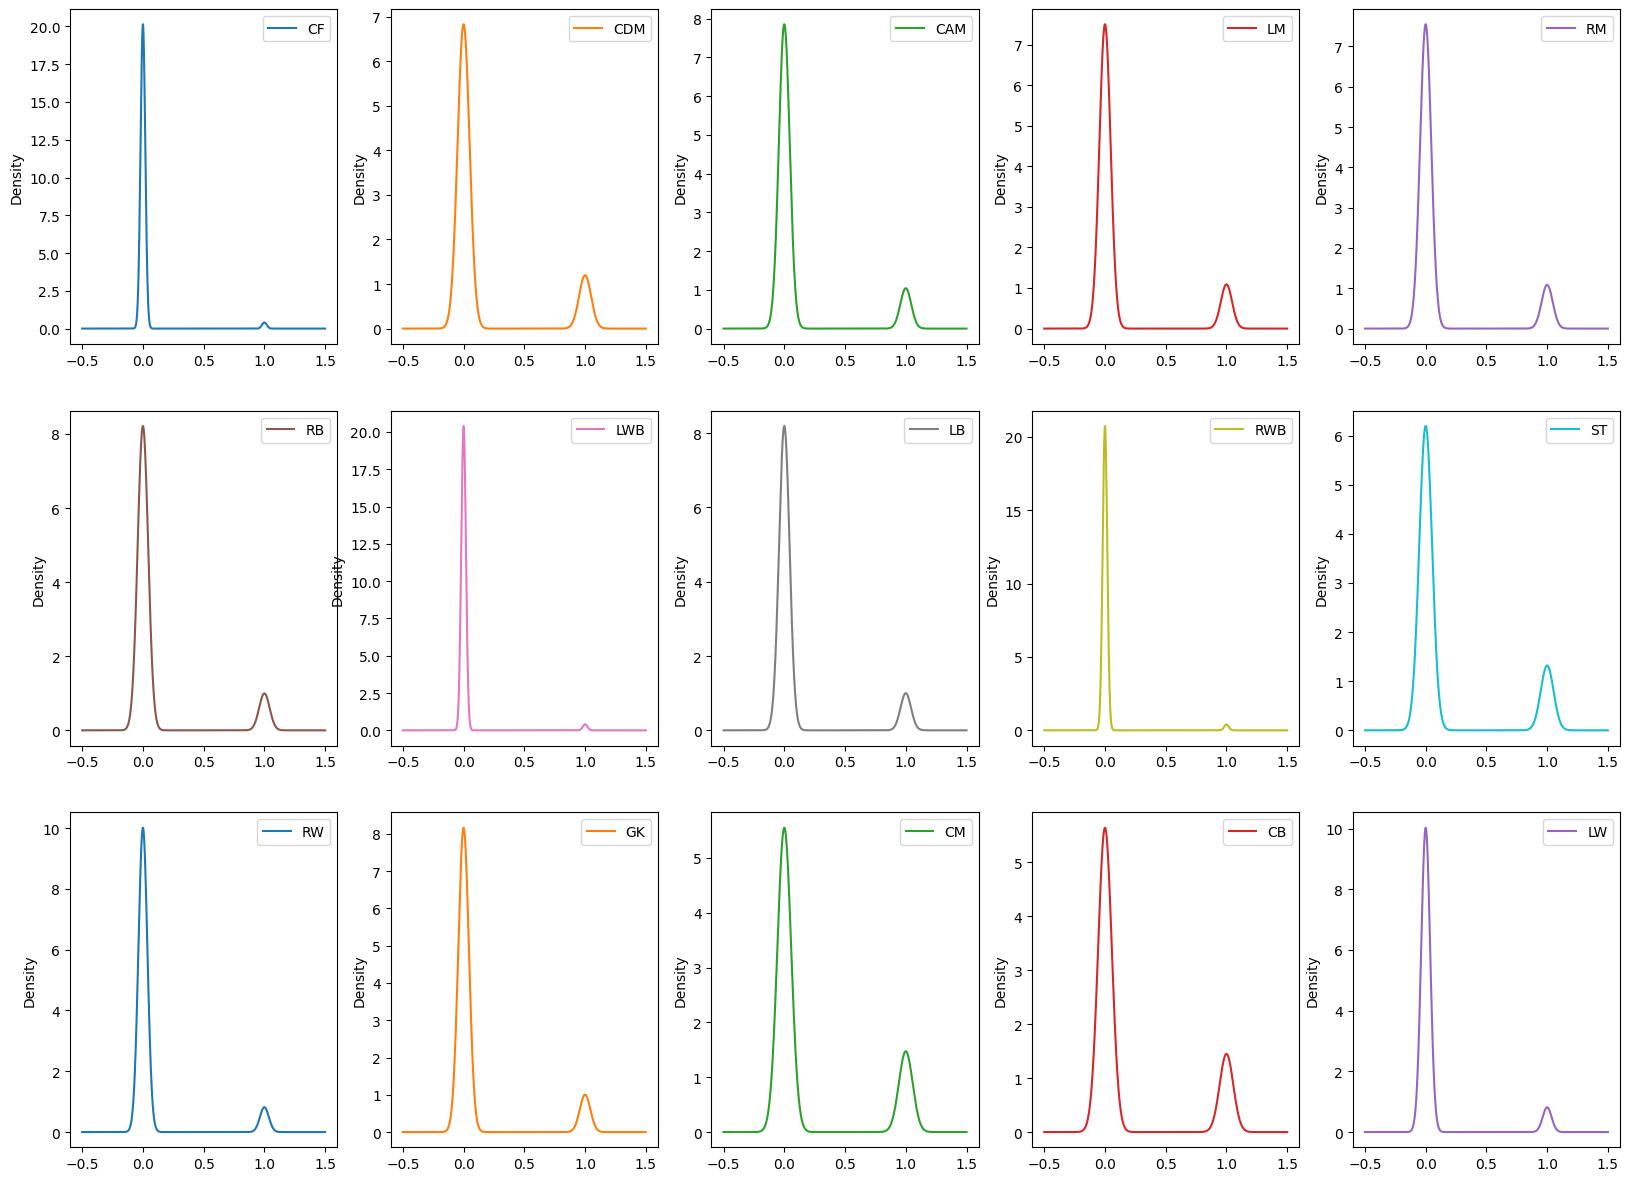

In [170]:

df5[['CF', 'CDM', 'CAM', 'LM', 'RM', 'RB', 'LWB', 'LB', 'RWB', 'ST', 'RW', 'GK', 'CM', 'CB', 'LW']].plot(kind='density', subplots=True, layout=(4,5), sharex=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

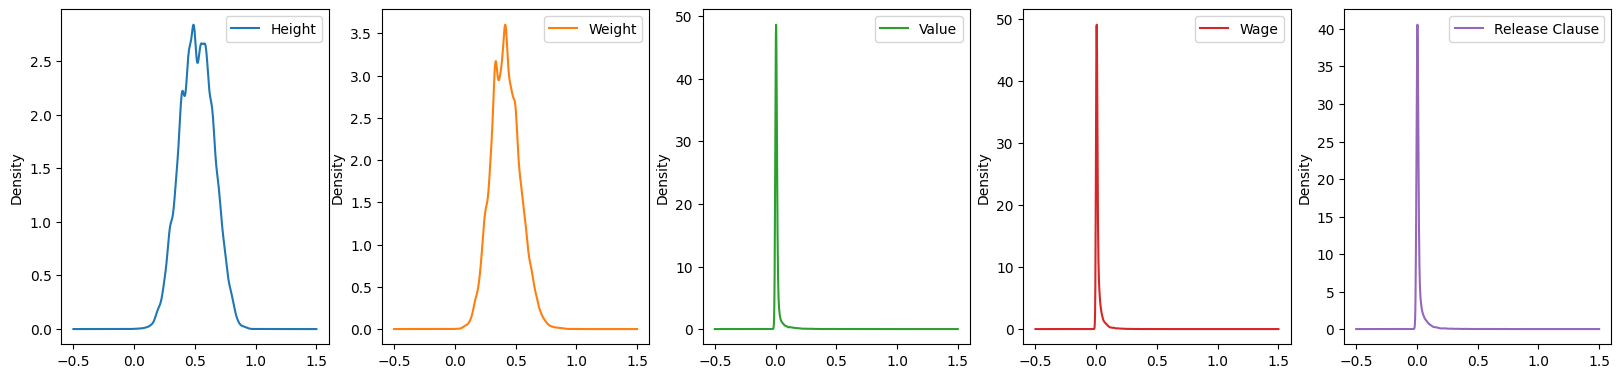

In [171]:
df5[['Height', 'Weight', 'Value', 'Wage', 'Release Clause']].plot(kind='density', subplots=True, layout=(4,5), sharex=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

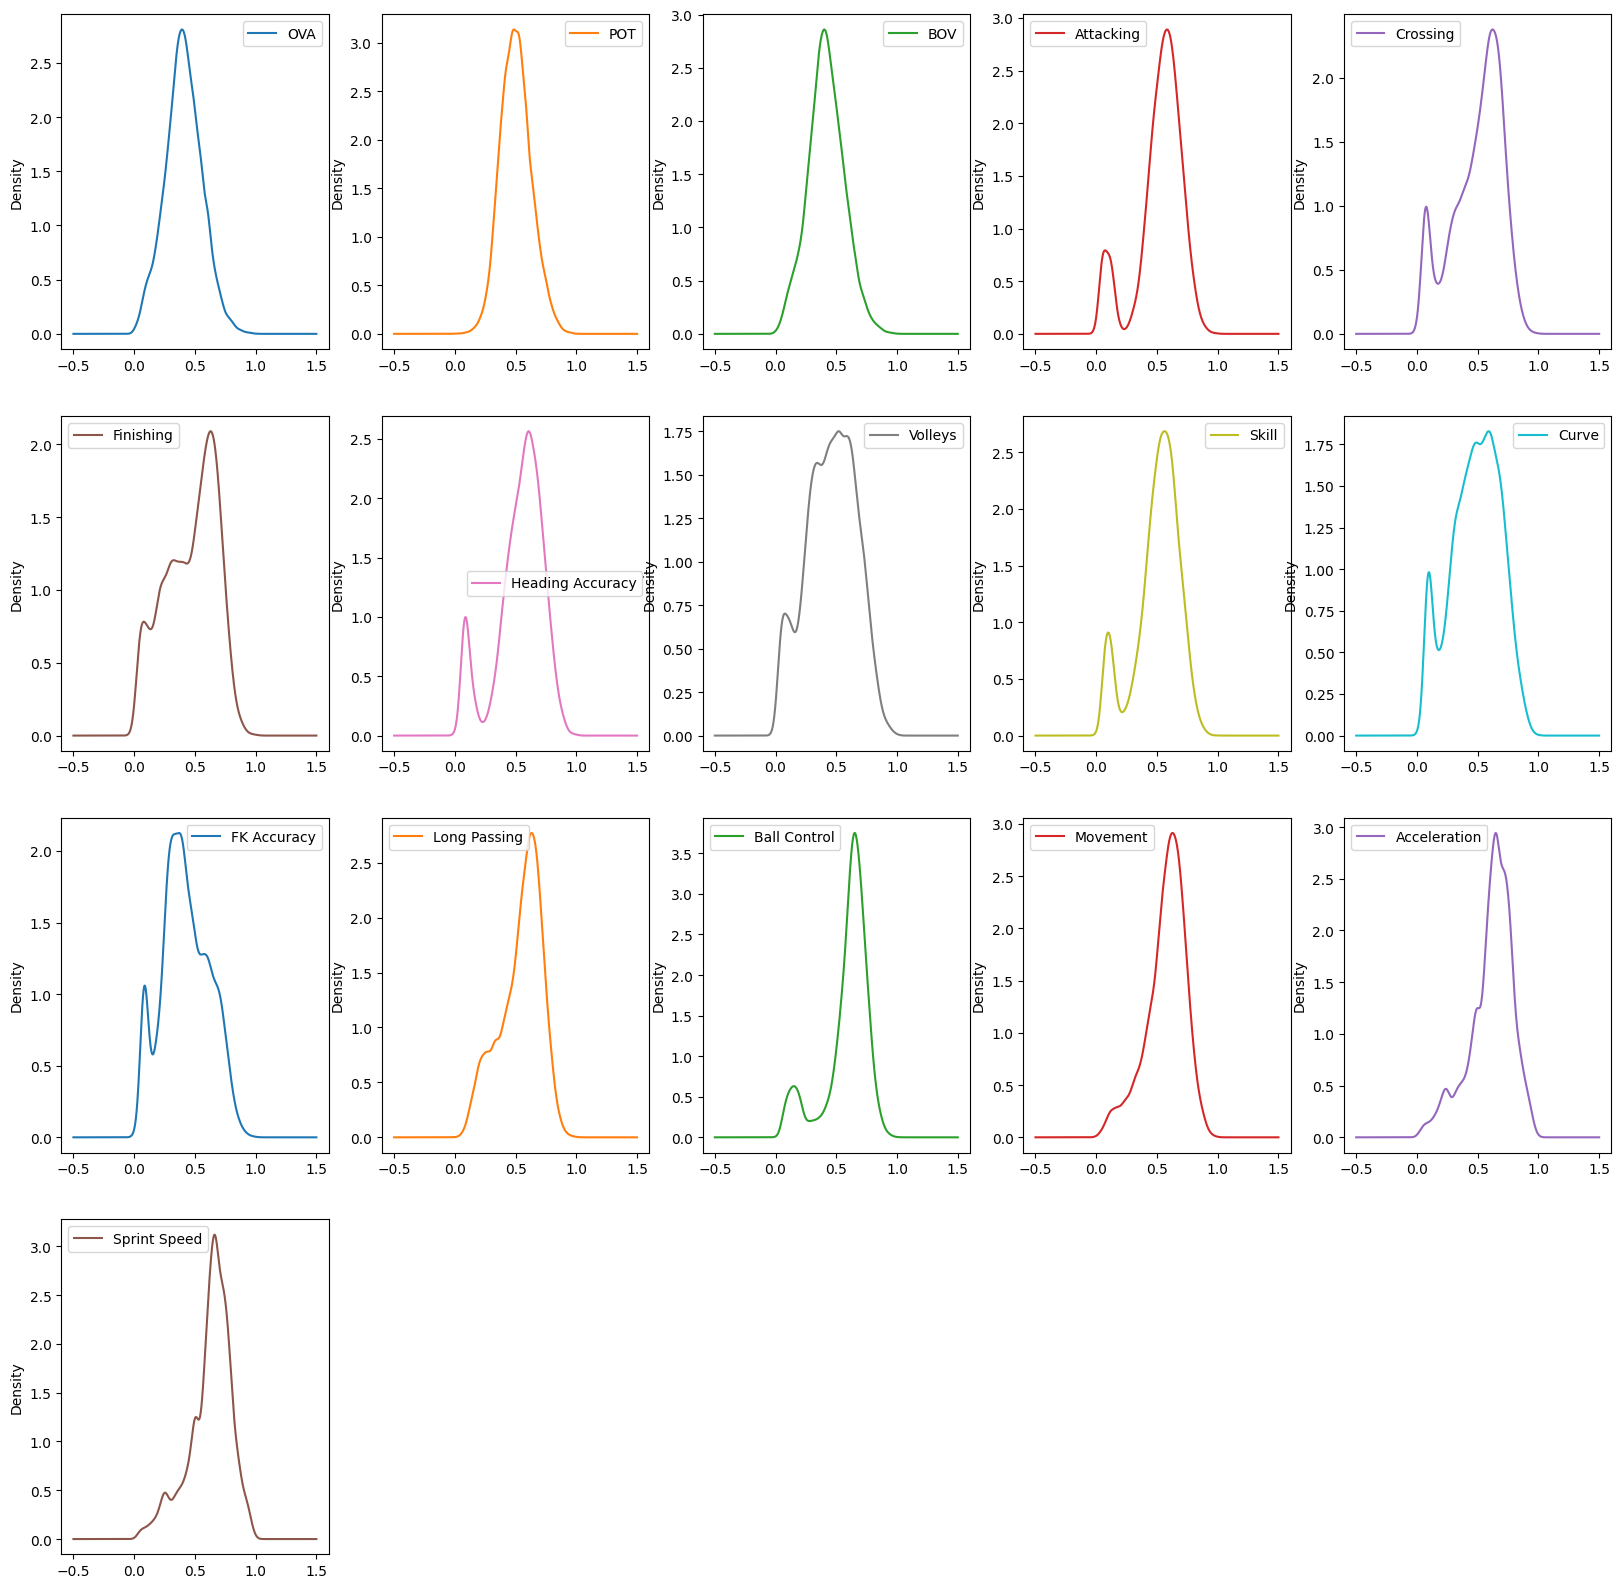

In [172]:
df5[['OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed']].plot(kind='density', subplots=True, layout=(4,5), sharex=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

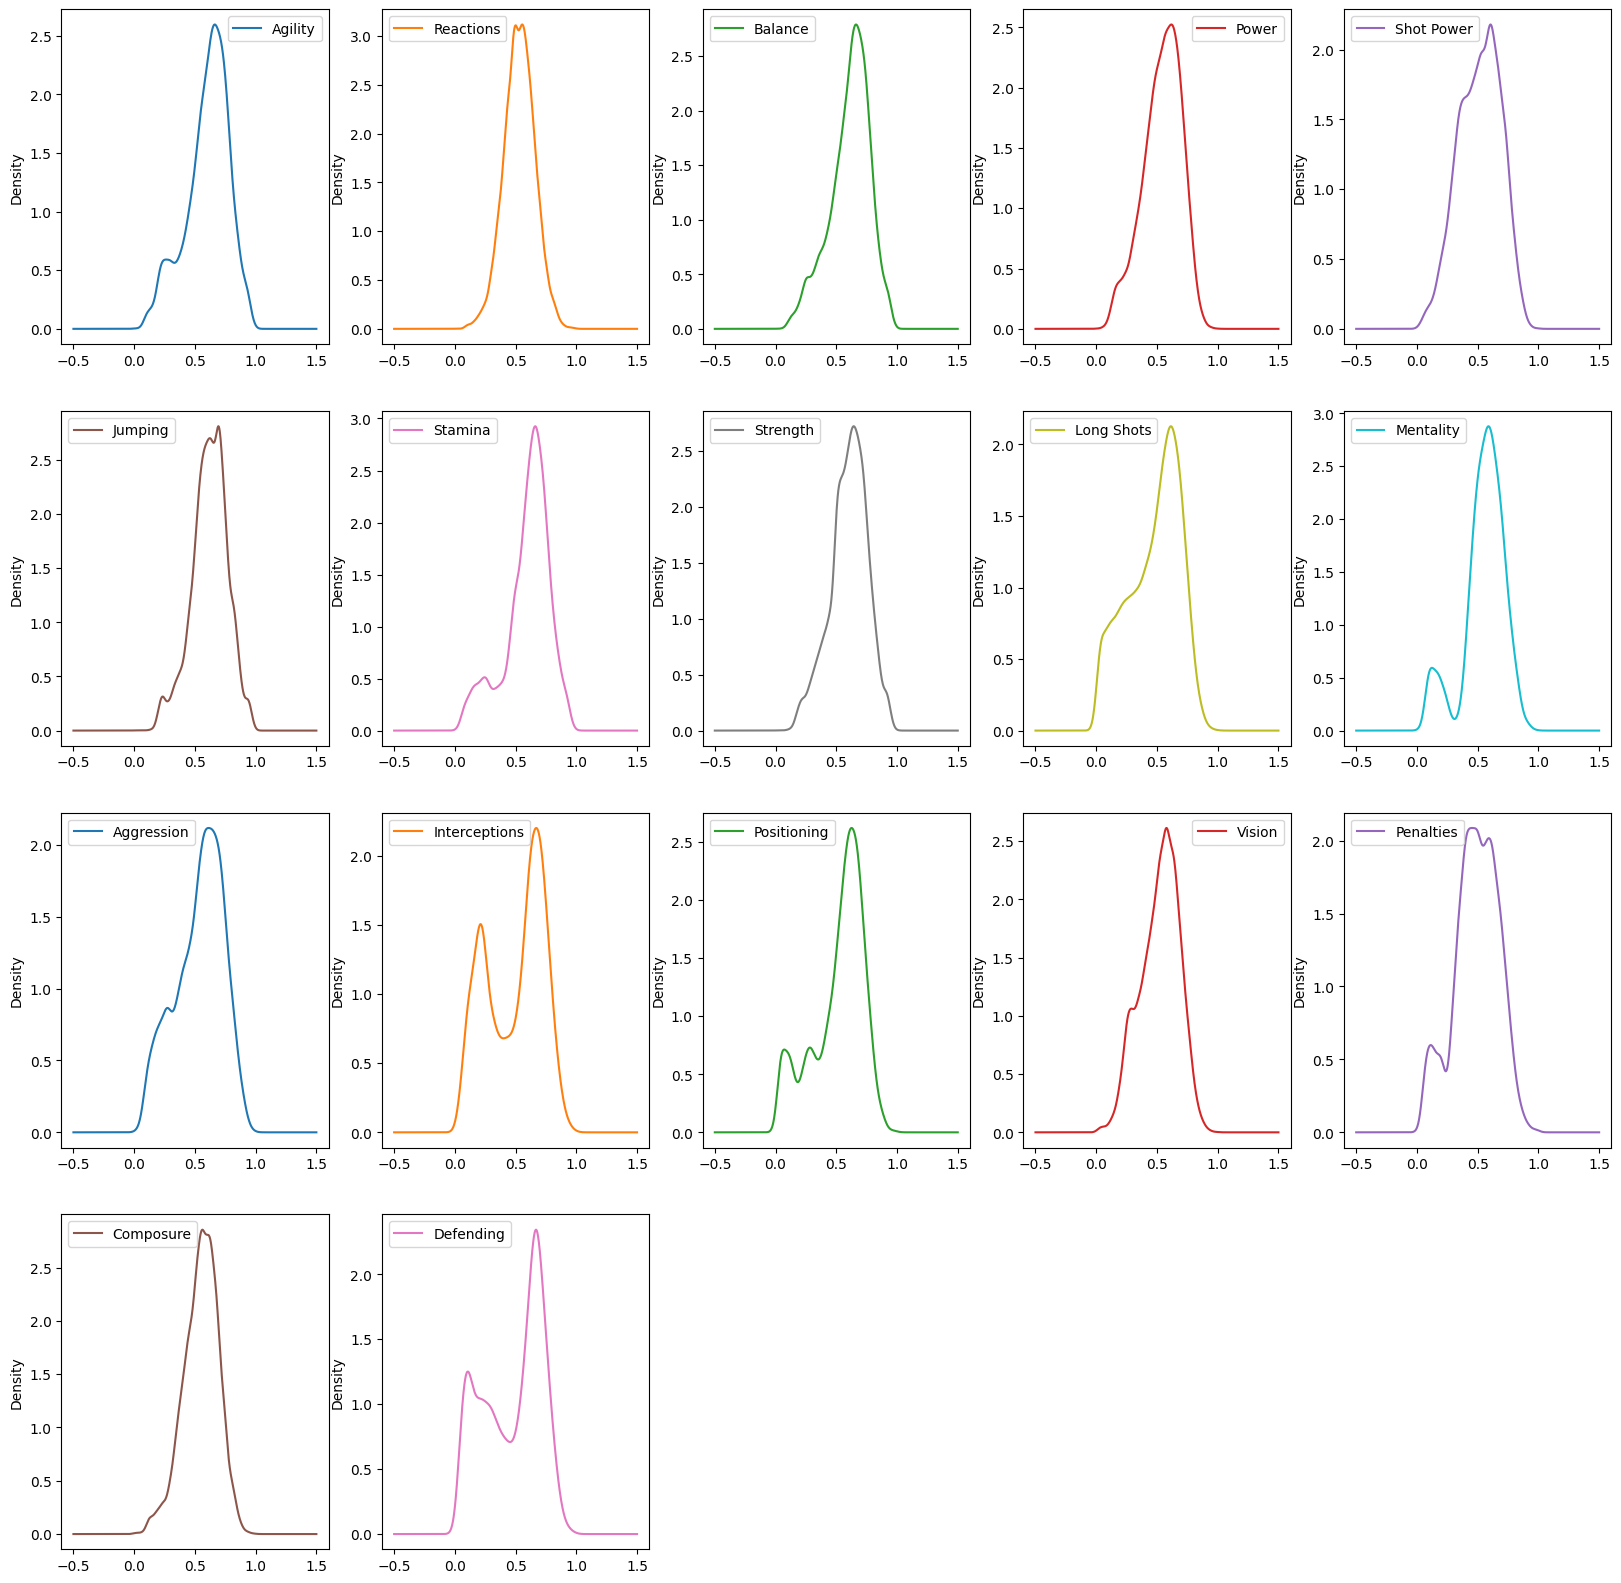

In [173]:
df5[['Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending']].plot(kind='density', subplots=True, layout=(4,5), sharex=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

In [174]:
# Standardizing the rescaled data
# Continuing transformation using the output from the rescaling transformation stage
from sklearn.preprocessing import StandardScaler

X = df5.values
scaler = StandardScaler().fit(X)
stdDf = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(stdDf)

# Converting the restandardized X to a dataframe
df6 = pd.DataFrame(stdDf, columns=cols)

df6.head()

[[-0.349 -0.14  -0.138 ... -0.405  0.237 -0.237]
 [-0.349 -0.14  -0.138 ...  2.466  0.237 -0.237]
 [-0.349 -0.14  -0.138 ... -0.405  0.237 -0.237]
 ...
 [-0.349 -0.14  -0.138 ... -0.405  0.237 -0.237]
 [-0.349 -0.14  -0.138 ...  2.466  0.237 -0.237]
 [ 2.864 -0.14  -0.138 ... -0.405  0.237 -0.237]]


LB       LWB       RWB        CM        ST        RM        GK   
0 -0.349126 -0.140227 -0.137865 -0.515368  2.166232 -0.378931 -0.350360  \
1 -0.349126 -0.140227 -0.137865 -0.515368  2.166232 -0.378931 -0.350360   
2 -0.349126 -0.140227 -0.137865 -0.515368 -0.461631 -0.378931  2.854208   
3 -0.349126 -0.140227 -0.137865  1.940361 -0.461631 -0.378931 -0.350360   
4 -0.349126 -0.140227 -0.137865 -0.515368 -0.461631 -0.378931 -0.350360   

         RW        LM       CDM        CB       CAM        RB        CF   
0  3.499177 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271  7.043484  \
1 -0.285781 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975   
2 -0.285781 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975   
3 -0.285781 -0.381473 -0.418794 -0.506923  2.745462 -0.348271 -0.141975   
4 -0.285781 -0.381473 -0.418794 -0.506923  2.745462 -0.348271 -0.141975   

         LW    Height    Weight      Value       Wage  Release Clause   
0 -0.285242 -1.637348 -0.426713  13.095064  27.955643       13.756715  \
1  3.505798  0.848085  1.128479   7.825024  10.702454        7.361190   
2 -0.285242  0.994287  1.694003  15.242117   5.881710       15.905612   
3 -0.285242 -0.029126 -0.709475  16.413237  18.314155       16.069337   
4  3.505798 -0.906338 -0.992238  16.803610  13.239688       16.632144   

   Short Passing  Dribbling  W/F   SM   IR       Age       OVA       POT   
0            0.0        0.0  0.0  0.0  0.0  1.657162  3.916071  3.576239  \
1            0.0        0.0  0.0  0.0  0.0  2.081755  3.772536  3.412674   
2            0.0        0.0  0.0  0.0  0.0  0.383384  3.629001  3.576239   
3            0.0        0.0  0.0  0.0  0.0  0.807977  3.629001  3.249108   
4            0.0        0.0  0.0  0.0  0.0  0.595680  3.629001  3.249108   

        BOV  Attacking  Crossing  Finishing  Heading Accuracy   Volleys   
0  3.890353   2.423791  1.947858   2.512633          1.044588  2.568262  \
1  3.742140   2.531474  1.892699   2.512633          2.201324  2.454890   
2  3.593926  -2.071994 -2.023639  -1.780961         -2.136436 -1.683193   
3  3.593926   2.127661  2.444295   1.848148          0.177036  2.228145   
4  3.593926   2.141122  1.947858   2.103719          0.581894  2.511576   

      Skill     Curve  FK Accuracy  Long Passing  Ball Control  Movement   
0  2.715721  2.514109     2.996155      2.521966      2.262253  2.385448  \
1  2.003536  1.854808     1.951202      1.599520      2.020772  2.027500   
2 -1.875330 -1.881232    -1.648081     -0.838372     -1.722176 -0.191780   
3  2.346911  2.074575     2.357572      2.653744      2.020772  1.436885   
4  2.435934  2.239400     2.705890      1.863076      2.201882  2.421243   

   Acceleration  Sprint Speed   Agility  Reactions   Balance     Power   
0      1.789503      1.065023  1.893347   3.566772  2.210142  1.821299  \
1      1.520839      1.816570  1.619288   3.677045  0.503138  2.905455   
2     -1.434467     -0.301427  0.248991   2.905133 -1.061616 -0.563842   
3      0.849178      0.791733  1.002654   3.235953  0.858764  2.195826   
4      1.991001      1.679925  2.235921   3.235953  1.356640  1.190518   

   Shot Power   Jumping   Stamina  Strength  Long Shots  Mentality   
0    2.119136  0.289134  0.591381  0.337485    2.447138   1.437106  \
1    2.720312  2.569006  1.350693  1.058196    2.395314   1.530010   
2    0.090169  1.133531 -1.370173  1.058196   -1.802480  -1.768069   
3    2.494871 -0.133064  1.667072  0.737880    2.291665   2.381626   
4    1.668255 -0.217504  1.160865 -1.184017    1.928892   1.576461   

   Aggression  Interceptions  Positioning    Vision  Penalties  Composure   
0   -0.676272      -0.309027     2.198103  3.001332   1.721032   3.140276  \
1    0.432248      -0.840524     2.301052  2.052995   2.295924   3.057479   
2   -1.259704      -1.323704    -2.022840  0.812863  -2.367091   0.821962   
3    1.190709       0.947239     1.940728  2.928383   2.295924   2.726291   
4   -0.267870      -0.502299     1.889253  2.636587 

### Feature Selection

- PEARSON CORRELATION MATRIX: PAIRWISE PLOT (Detecting Multi-Colinearity Effect)

<Axes: >

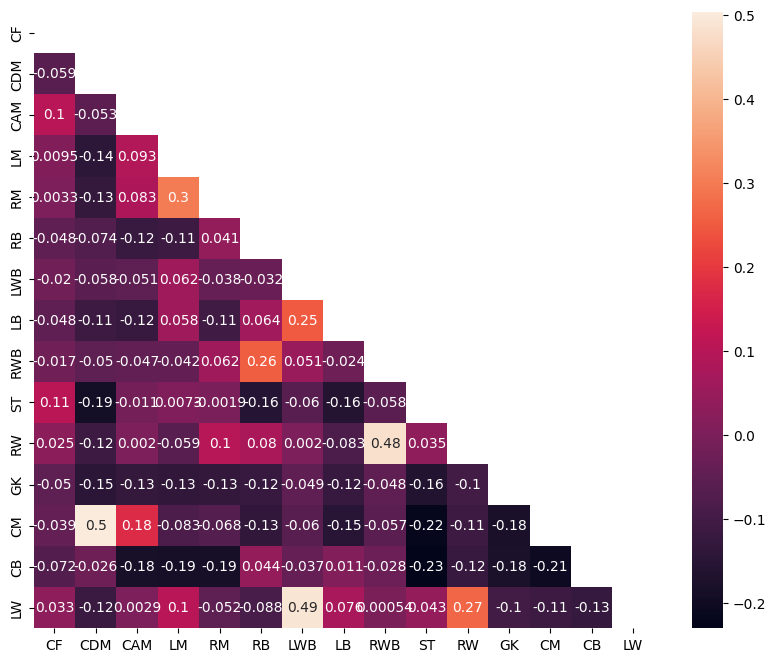

In [175]:
# Identifying which two variables have strong interaction (association) between themselves.
# This is done by regressing one variable with another
matrix = np.triu(df6[['CF', 'CDM', 'CAM', 'LM', 'RM', 'RB', 'LWB', 'LB', 'RWB', 'ST', 'RW', 'GK', 'CM', 'CB', 'LW']].corr())
plt.figure(figsize=(10,8))
sns.heatmap(df6[['CF', 'CDM', 'CAM', 'LM', 'RM', 'RB', 'LWB', 'LB', 'RWB', 'ST', 'RW', 'GK', 'CM', 'CB', 'LW']].corr(), annot=True, mask=matrix)


<Axes: >

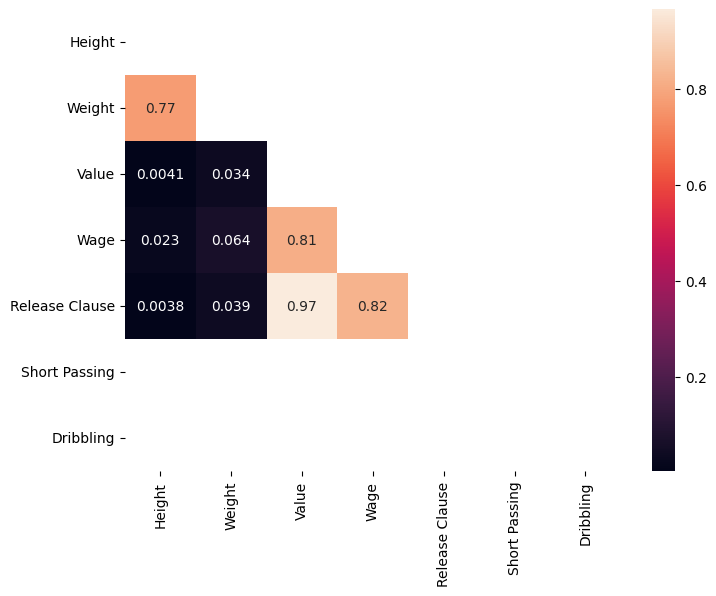

In [176]:
matrix = np.triu(df6[['Height', 'Weight', 'Value', 'Wage', 'Release Clause', 'Short Passing', 'Dribbling']].corr())
plt.figure(figsize=(8,6))
sns.heatmap(df6[['Height', 'Weight', 'Value', 'Wage', 'Release Clause', 'Short Passing', 'Dribbling']].corr(), annot=True, mask=matrix)

<Axes: >

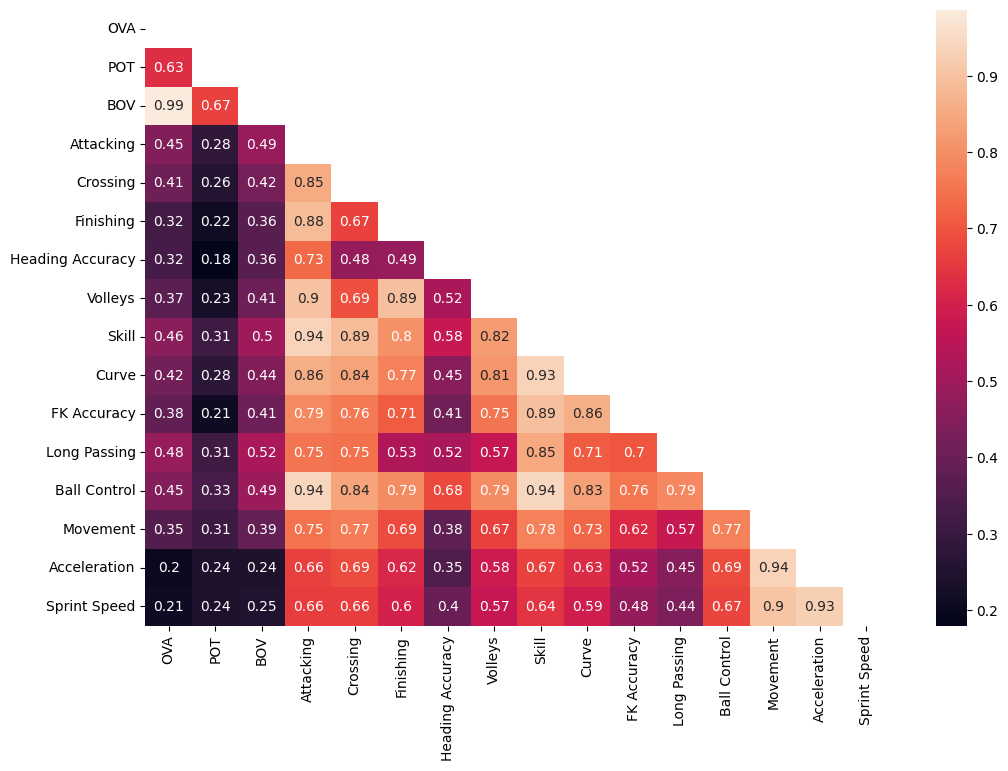

In [177]:
matrix = np.triu(df6[['OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed']].corr())
plt.figure(figsize=(12,8))
sns.heatmap(df6[['OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed']].corr(), annot=True, mask=matrix)

<Axes: >

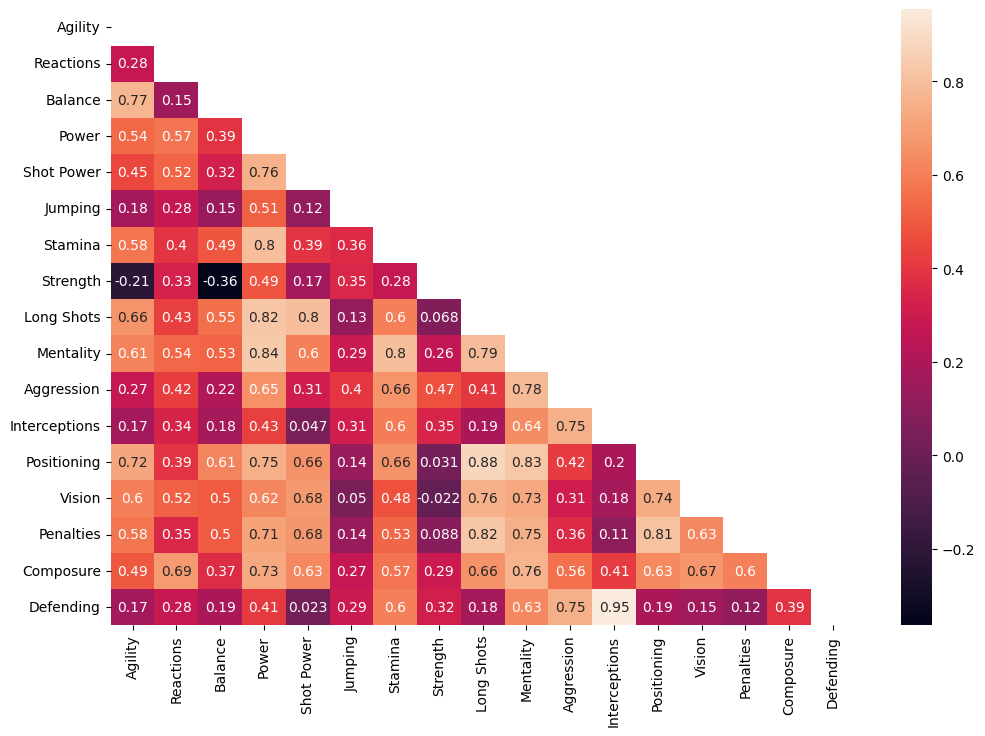

In [178]:
matrix = np.triu(df6[['Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending']].corr())
plt.figure(figsize=(12,8))
sns.heatmap(df6[['Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending']].corr(), annot=True, mask=matrix)

<Axes: >

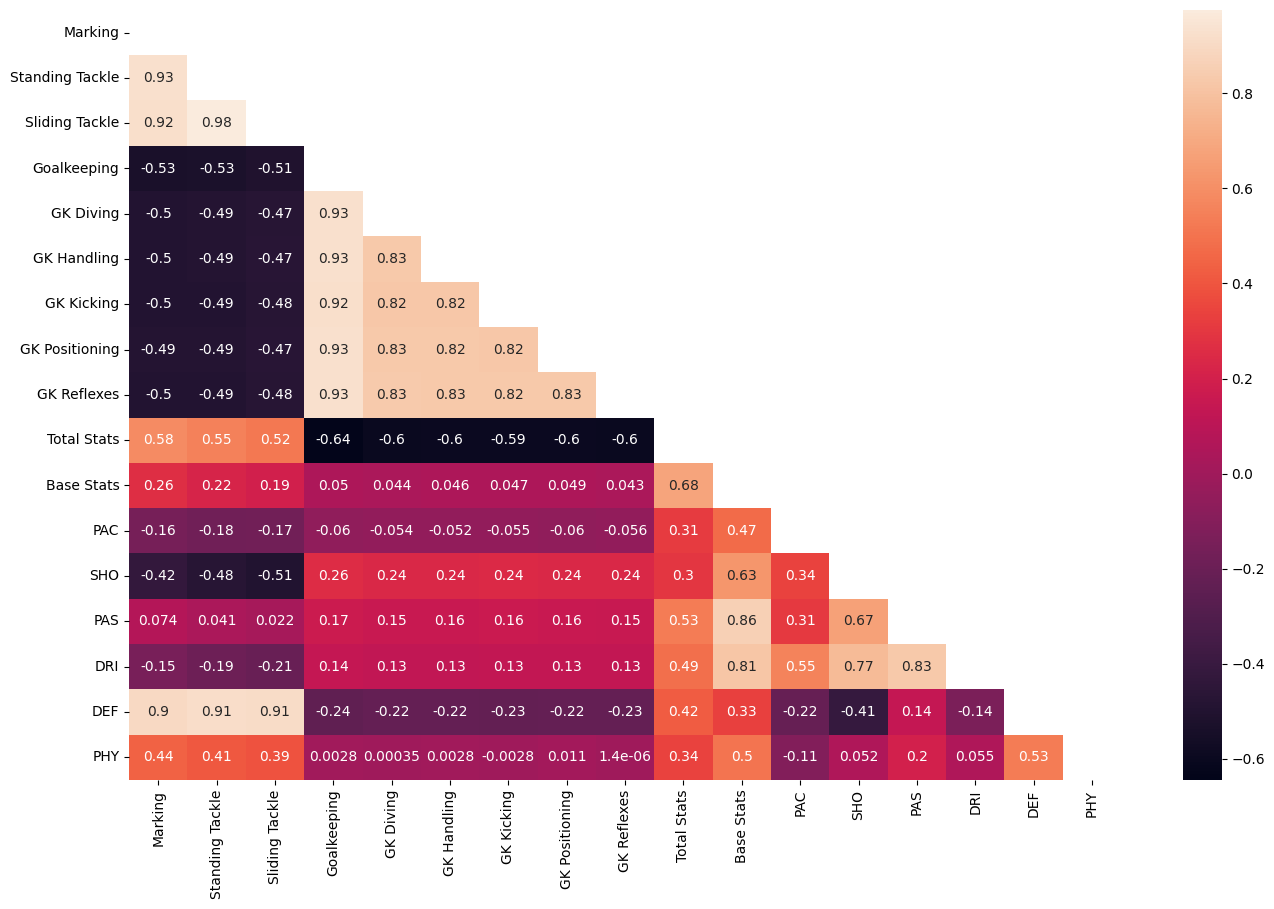

In [179]:
matrix = np.triu(df6[['Marking','Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', "GK Kicking", 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].corr())
plt.figure(figsize=(16,10))

sns.heatmap(df6[['Marking','Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', "GK Kicking", 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].corr(), annot=True, mask=matrix)

### Correlation Inference

#### For any two features having correlation score above .8, one will be dropped from the dataset

As can be seen from the Pearson Correlation matrix, the following variables will be dropped from the dataset, because they exhibit multi-colinearity effect `Attacking`, `Skill`, `Movement`, `Acceleration`, `Marking`, `standing Tackle`, and `GoalKeeping`

In [180]:
df6.drop(['Attacking', 'Skill', 'Movement', 'Acceleration', 'Marking', 'Standing Tackle', 'Goalkeeping'], inplace=True, axis=1)

In [181]:
df6.sample(5)

LB       LWB       RWB        CM        ST        RM        GK   
8227   2.864292 -0.140227 -0.137865 -0.515368 -0.461631 -0.378931 -0.350360  \
14847 -0.349126 -0.140227 -0.137865 -0.515368 -0.461631 -0.378931  2.854208   
7415  -0.349126 -0.140227 -0.137865 -0.515368 -0.461631  2.639002 -0.350360   
5644  -0.349126 -0.140227 -0.137865 -0.515368  2.166232 -0.378931 -0.350360   
8122  -0.349126 -0.140227 -0.137865 -0.515368 -0.461631  2.639002 -0.350360   

             RW        LM       CDM        CB       CAM        RB        CF   
8227  -0.285781 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975  \
14847 -0.285781 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975   
7415  -0.285781  2.621419 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975   
5644  -0.285781 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975   
8122   3.499177 -0.381473 -0.418794 -0.506923 -0.364237 -0.348271 -0.141975   

             LW    Height    Weight     Value      Wage  Release Clause   
8227  -0.285242 -0.467732 -0.992238 -0.216665 -0.309140       -0.252044  \
14847 -0.285242  2.163903  2.118146 -0.346790 -0.436001       -0.382512   
7415  -0.285242  0.409480  0.138811 -0.216665 -0.207650       -0.252044   
5644  -0.285242 -0.321530 -0.426713 -0.099553 -0.156906       -0.170181   
8122  -0.285242  0.117076 -0.709475 -0.203653 -0.436001       -0.190647   

       Short Passing  Dribbling  W/F   SM   IR       Age       OVA       POT   
8227             0.0        0.0  0.0  0.0  0.0  0.171088  0.184155 -0.185766  \
14847            0.0        0.0  0.0  0.0  0.0  0.807977 -0.820591 -1.494290   
7415             0.0        0.0  0.0  0.0  0.0  0.171088  0.184155 -0.512897   
5644             0.0        0.0  0.0  0.0  0.0 -0.253505  0.471226  0.468496   
8122             0.0        0.0  0.0  0.0  0.0 -0.041209  0.184155 -0.185766   

            BOV  Crossing  Finishing  Heading Accuracy   Volleys     Curve   
8227   0.036798  0.789505  -0.247535          0.177036  0.130761  0.591147  \
14847 -1.000698 -1.913319  -1.627618         -2.020762 -1.399762 -1.661465   
7415   0.036798  1.616900   0.621407         -0.227821  1.207796  1.689982   
5644   0.629652  0.127589   1.337006          0.813241  1.547913  0.426322   
8122   0.036798  1.010144   0.979207         -0.227821 -0.039297  0.591147   

       FK Accuracy  Long Passing  Ball Control  Sprint Speed   Agility   
8227      0.964302      0.545296      0.571889      1.133346  0.865625  \
14847    -1.764187     -0.904261     -2.325877     -2.146134 -2.834176   
7415      1.951202      0.874741      0.632259      0.381798  0.180476   
5644     -0.428969     -0.772483      0.753000      0.040186  0.248991   
8122      0.848196     -0.047704      0.209668      0.791733  0.934140   

       Reactions   Balance     Power  Shot Power   Jumping   Stamina   
8227   -0.623604  0.574263 -0.090756   -0.285565  0.626893  0.338277  \
14847  -0.844150 -2.555244 -1.963389   -1.262475 -2.159616 -1.813105   
7415    0.148307  0.289762  0.638584    1.743402 -0.386383 -0.484310   
5644    0.479126 -0.136989  0.835704    1.217373 -0.217504  0.338277   
8122   -0.954423  0.787638  0.678008   -0.285565  1.133531 -0.547586   

       Strength  Long Shots  Mentality  Aggression  Interceptions   
8227  -0.623464   -0.299566   0.244843   -0.034497       0.657332  \
14847  0.417564   -1.750656  -2.155168   -1.259704      -1.275386   
7415  -0.303148    1.306997   0.260327   -0.909645      -0.743888   
5644   0.097248    1.151523   0.090003    0.140532      -1.275386   
8122   0.978117    1.099698  -0.126772   -0.676272      -1.033796   

       Positioning    Vision  Penalties  Composure  Defending  Sliding Tackle   
8227      0.345006 -0.646117   0.315740   0.573571   0.769180        0.829508  \
14847    -1.765465 -2.105096  -1.792199  -0.833976  -1.566872       -1.560408   
7415      0.756805  1.104659   1.146140  -0.171601  -0.701063       -0.652240   
5644      0.911230 -0.864964   1.529401   0.1

### Feature Selection

- Since the target variable is not categorical, representing class labels but rather continuous, I will have to use Linear Regression model to apply RFE Feature Selection to to extract relevant relevant features

In [182]:
# converting the data into a numpy array
X = df6.values
Y = df3['Hits']

# feature extraction
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=80)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print('\n')
print("Selected Features: %s" % fit.support_)
print('\n')
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 80


Selected Features: [False False False False False False  True False False False  True False
 False False False False False  True  True  True False False False False
 False  True  True  True  True False  True False False  True  True False
  True  True False False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False  True  True  True  True  True  True  True False False False
 False False False False False False  True False False False False False
 False  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False False False False False  True False False False  True
  True False  True  True  True  True  True False False False False False
 False False  True False False False False  True  True False False False
  True False 

In [183]:
# Extracting the selected input features 
col_ranks = []
ranking = list(fit.ranking_)
for index, rank in enumerate(ranking):
    if rank == 1:
        col_ranks.append(index)
        print(f'Index: {index}')

Index: 6
Index: 10
Index: 17
Index: 18
Index: 19
Index: 25
Index: 26
Index: 27
Index: 28
Index: 30
Index: 33
Index: 34
Index: 36
Index: 37
Index: 41
Index: 43
Index: 44
Index: 45
Index: 46
Index: 47
Index: 48
Index: 49
Index: 50
Index: 51
Index: 52
Index: 53
Index: 54
Index: 55
Index: 62
Index: 63
Index: 64
Index: 65
Index: 66
Index: 67
Index: 68
Index: 78
Index: 85
Index: 89
Index: 90
Index: 91
Index: 92
Index: 93
Index: 94
Index: 95
Index: 96
Index: 97
Index: 98
Index: 99
Index: 100
Index: 101
Index: 102
Index: 103
Index: 104
Index: 105
Index: 108
Index: 109
Index: 110
Index: 112
Index: 113
Index: 114
Index: 115
Index: 116
Index: 117
Index: 118
Index: 119
Index: 120
Index: 121
Index: 127
Index: 131
Index: 132
Index: 134
Index: 135
Index: 136
Index: 137
Index: 138
Index: 146
Index: 151
Index: 152
Index: 156
Index: 165


#### Final Selected Features for the Outcome variable `Hits`

In [184]:
# Final selected fearures which are ready for modeling
df6 = df6.iloc[:, col_ranks]

df6.sample(5)

GK        CB     Value      Wage  Release Clause       Age   
9949  -0.35036  1.972687 -0.327271 -0.258395       -0.365833  1.657162  \
8794  -0.35036 -0.506923 -0.262209 -0.207650       -0.325618  1.020273   
8052  -0.35036 -0.506923 -0.164616 -0.106161       -0.211112 -0.253505   
16488 -0.35036 -0.506923 -0.307752 -0.425852       -0.352428 -1.314987   
2754  -0.35036 -0.506923  0.095633  0.959477        0.433557  0.171088   

            OVA       POT       BOV  Finishing     Curve  FK Accuracy   
9949  -0.102915 -1.003593 -0.259630  -0.094192  0.481264     1.138460  \
8794   0.040620 -0.840028 -0.111416   1.030321  0.316438     0.441825   
8052   0.184155  0.304930  0.185011   0.723636  0.701031    -0.951445   
16488 -1.107662  0.468496 -1.297125  -0.860905 -0.782397    -0.603128   
2754   1.045367  0.468496  1.074293   1.337006  1.250448     1.602884   

       Ball Control  Sprint Speed     Power   Jumping   Stamina  Strength   
9949       0.209668     -0.779684  0.737144 -0.048624  0.844485  0.417564  \
8794       0.330409      0.928378  0.776568  0.542453  0.338277  0.177327   
8052       0.571889      1.269991  0.244346  0.035815  0.338277 -0.303148   
16488     -0.514773     -0.028137 -1.510014 -0.555262  0.021898 -1.984808   
2754       1.175590      0.040186  1.367925  0.880212  0.464829  0.337485   

       Long Shots  Mentality  Aggression  Interceptions  Positioning   
9949     0.425978   0.848716    2.007514       0.753967    -0.169743  \
8794     0.633277  -0.095804   -1.493077      -0.647253     0.962705   
8052     0.529627  -0.064836   -0.617929      -0.598935     0.653855   
16488   -0.817813  -0.297095   -0.151184       0.319106     0.139106   
2754     1.514295   1.235815    0.490591       0.657332     0.962705   

         Vision  Penalties  Composure  Defending  Sliding Tackle  Base Stats   
9949   0.229271   0.315740  -0.254398   0.801852        0.925105    0.056374  \
8794  -0.062525   0.954509   0.739165  -0.750071       -1.130223   -0.213498   
8052   0.229271   0.187986  -0.585586  -0.423350       -0.365450    0.399848   
16488 -1.156760  -0.642414  -1.579149   0.556812        0.638315   -1.391122   
2754   1.250557   1.401647   0.821962   0.948876        1.020702    1.626539   

            PAC       SHO       PAS       DRI       DEF       PHY   
9949  -1.447306 -0.105213  0.230505 -0.591741  0.738328  1.107345  \
8794   0.613263  0.835121 -1.059515  0.214248 -0.843422 -0.454973   
8052   1.549885  0.401121 -0.067192  1.020237 -0.660913 -0.454973   
16488 -0.136035 -1.624214 -1.654909 -0.692489  0.373309 -1.600672   
2754  -0.136035  1.413788  1.520525  1.322483  0.920837  0.482418   

       Binned_weight_skinny  Binned_weight_very_obess  Binned_releaseClause_A   
9949              -0.464149                 -0.059521                0.338104  \
8794              -0.464149                 -0.059521                0.338104   
8052               2.154483                 -0.059521                0.338104   
16488             -0.464149                 -0.059521                0.338104   
2754              -0.464149                 -0.059521                0.338104   

       Binned_releaseClause_B  Binned_releaseClause_C  Binned_releaseClause_D   
9949                -0.254442               -0.145602               -0.092207  \
8794                -0.254442               -0.145602               -0.092207   
8052                -0.254442               -0.145602               -0.092207   
16488               -0.254442               -0.145602               -0.092207   
2754                -0.254442               -0.145602               -0.092207   

       Binned_releaseClause_E  Binned_releaseClause_F  Binned_releaseClause_G   
9949                -0.065873               -0.049825               -0.041735  \
8794                -0.065873               -0.049825               -0.041735   
8052                -0.065873               -0.049825               -0.041735   
16488               -0.065873         

Adding back our target variable

In [185]:
df6.sample(10)

GK        CB     Value      Wage  Release Clause       Age   
301   -0.350360 -0.506923  4.376727  3.699689        4.240173 -0.465801  \
6539   2.854208 -0.506923 -0.229678 -0.309140       -0.292975  0.171088   
2881  -0.350360 -0.506923 -0.086541  0.198307        0.014010  1.232569   
14012 -0.350360  1.972687 -0.344187 -0.309140       -0.373405  1.232569   
16674 -0.350360 -0.506923 -0.304499 -0.106161       -0.405536 -1.314987   
11055 -0.350360  1.972687 -0.291487 -0.309140       -0.331451  0.383384   
10135 -0.350360 -0.506923 -0.245943 -0.207650       -0.282742 -0.253505   
3077  -0.350360 -0.506923 -0.047504  0.299796        0.269831  0.383384   
3820  -0.350360 -0.506923 -0.164616  0.147562       -0.108784  1.444866   
13179 -0.350360 -0.506923 -0.245943 -0.207650       -0.241811 -1.102690   

            OVA       POT       BOV  Finishing     Curve  FK Accuracy   
301    2.193649  2.267716  2.408217   1.388120  1.854808     2.067307  \
6539   0.327691 -0.185766  0.185011  -1.423162 -0.837339    -0.661181   
2881   1.045367  0.304930  0.926080   0.468064  0.920798     0.441825   
14012 -0.677056 -1.657855 -0.852484  -1.423162 -0.947222    -0.835340   
16674 -1.107662  0.632061 -1.000698   1.030321 -0.287921    -0.312863   
11055 -0.246450 -0.840028 -0.111416  -1.320933 -0.837339    -0.893393   
10135 -0.102915 -0.512897  0.036798   0.928092  0.426322     0.964302   
3077   0.901831  0.141365  0.777866   0.979207  1.470215     1.777043   
3820   0.901831  0.141365  0.777866   0.979207  1.470215     2.067307   
13179 -0.533521  0.795627 -0.407843   0.928092 -0.507688    -0.661181   

       Ball Control  Sprint Speed     Power   Jumping   Stamina  Strength   
301        1.477441     -0.301427  1.643892 -0.133064  0.971037  0.337485  \
6539      -2.024026     -1.804522 -1.174912  0.120255 -1.939657  1.058196   
2881       0.813370      0.860056  1.584756  1.386850  1.350693  0.978117   
14012     -0.333663     -2.077812 -0.090756  1.217971  0.654657  1.378512   
16674     -0.212922      0.860056 -0.839809 -0.893021 -0.547586 -2.625440   
11055     -0.997734     -0.096459 -0.721538  0.204695  0.021898  0.497643   
10135      0.451149      0.450121  0.145787 -0.133064  0.275001 -0.623464   
3077       1.175590      0.586766  0.106363 -0.808581 -0.041378 -1.264096   
3820       0.813370      0.586766  2.038131  1.049091  0.971037  0.577722   
13179      0.088928      0.518443  0.638584  0.795772  0.275001  0.737880   

       Long Shots  Mentality  Aggression  Interceptions  Positioning   
301      1.928892   1.870656    0.665621       1.285465     1.528929  \
6539    -1.491533  -1.520326   -0.792959      -1.130432    -2.074315   
2881     0.944224   1.297750    1.190709       1.188829     0.756805   
14012   -1.180585  -0.606774    0.490591       0.464060    -1.147766   
16674    0.581452  -0.544838   -1.434734      -1.372021     0.293531   
11055   -1.491533  -0.560322    0.548934       0.850603    -1.353666   
10135    0.736926  -0.126772   -1.493077      -0.792206     0.653855   
3077     0.840575   0.198391   -0.442900      -0.985478     0.962705   
3820     1.877068   1.483558    1.190709       1.140511     0.911230   
13179    0.529627  -0.405483   -0.559586      -1.323704     0.653855   

         Vision  Penalties  Composure  Defending  Sliding Tackle  Base Stats   
301    2.125944   1.529401   2.063916   1.046893        1.020702    2.141749  \
6539  -1.156760  -0.323030  -3.069493  -1.403512       -1.369214    0.252645   
2881   1.104659   0.571247   0.987556   1.030557        1.068500    1.602005   
14012 -1.448555  -0.961799  -0.668383   0.573148        0.542718   -1.611927   
16674  0.010424   0.762878  -0.254398  -1.370840       -1.369214   -1.292987   
11055 -1.740351  -0.834045  -1.165164   1.046893        1.068500   -1.170318   
10135  0.885812   0.571247  -0.254398  -0.472358       -0.365450   -0.115363   
3077   1.031710   0.507370   1.318743  -1.125799       -0.843433    0.154509   
3820   1.104659   1.21

In [186]:
df6.shape

(18979, 80)

#### our data is now prepared and ready for Machine Learning Modeling

In [195]:
# Creating numpy arrays from the dataset
dFArr = df6.values
dFArr = np.array(dFArr)
X = dFArr[:, 0:81]
Y = df3['Hits']

In [196]:
X

array([[-0.35 , -0.507, 13.095, ..., -0.491, -0.35 , -0.405],
       [-0.35 , -0.507,  7.825, ..., -0.491, -0.35 ,  2.466],
       [ 2.854, -0.507, 15.242, ..., -0.491,  2.854, -0.405],
       ...,
       [-0.35 , -0.507, -0.357, ..., -0.491, -0.35 , -0.405],
       [-0.35 , -0.507, -0.36 , ..., -0.491, -0.35 ,  2.466],
       [-0.35 ,  1.973, -0.36 , ..., -0.491, -0.35 , -0.405]])

In [197]:
Y

0        771.000000
1        562.000000
2        150.000000
3        207.000000
4        595.000000
            ...    
19016     22.759041
19017     22.759041
19018     22.759041
19019     22.759041
19020     22.759041
Name: Hits, Length: 18979, dtype: float64

In [235]:
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)

In [199]:
X_train[:5]

array([[-3.504e-01, -5.069e-01, -3.175e-01, -3.599e-01, -3.471e-01,
        -2.535e-01, -6.771e-01, -1.167e+00, -8.525e-01, -5.031e-01,
        -5.626e-01, -8.065e-02,  2.856e-02,  4.501e-01, -7.412e-01,
        -2.175e-01,  3.383e-01,  1.717e-02, -9.215e-01, -1.838e-02,
         8.219e-02,  6.573e-01, -2.212e-01, -8.650e-01, -3.645e-03,
        -1.248e+00,  5.731e-01,  4.471e-01, -6.551e-01,  3.323e-01,
        -1.335e+00, -1.456e+00, -4.910e-01,  4.950e-01, -3.835e-02,
        -4.641e-01, -5.952e-02,  3.381e-01, -2.544e-01, -1.456e-01,
        -9.221e-02, -6.587e-02, -4.983e-02, -4.173e-02, -3.248e-02,
        -2.618e-02, -2.515e-02, -2.054e-02, -2.054e-02, -1.452e-02,
        -1.452e-02, -1.452e-02, -1.027e-02, -7.259e-03, -7.259e-03,
         2.527e-01, -1.802e-01, -8.337e-02, -5.140e-02, -4.653e-02,
        -3.081e-02, -2.408e-02, -2.408e-02, -2.178e-02, -1.623e-02,
        -1.921e-02, -1.623e-02, -7.259e-03, -7.055e-02, -4.765e-02,
        -2.408e-02, -2.408e-02, -1.921e-02, -1.2

In [200]:
X_test[:5]

array([[-3.504e-01, -5.069e-01, -2.167e-01, -1.569e-01, -2.827e-01,
         1.233e+00,  4.712e-01, -3.493e-01,  3.332e-01,  6.725e-01,
         3.714e-01, -3.709e-01,  2.700e-01,  1.612e+00,  4.612e-01,
         1.387e+00,  1.287e+00, -1.905e+00,  2.705e-01,  7.248e-01,
        -3.262e-01,  7.540e-01,  8.598e-01,  6.670e-01,  6.990e-01,
        -1.716e-01,  8.182e-01,  8.295e-01,  8.660e-01,  1.831e+00,
         3.288e-01,  4.290e-01,  5.165e-01,  6.775e-01, -9.757e-01,
        -4.641e-01, -5.952e-02,  3.381e-01, -2.544e-01, -1.456e-01,
        -9.221e-02, -6.587e-02, -4.983e-02, -4.173e-02, -3.248e-02,
        -2.618e-02, -2.515e-02, -2.054e-02, -2.054e-02, -1.452e-02,
        -1.452e-02, -1.452e-02, -1.027e-02, -7.259e-03, -7.259e-03,
         2.527e-01, -1.802e-01, -8.337e-02, -5.140e-02, -4.653e-02,
        -3.081e-02, -2.408e-02, -2.408e-02, -2.178e-02, -1.623e-02,
        -1.921e-02, -1.623e-02, -7.259e-03, -7.055e-02, -4.765e-02,
        -2.408e-02, -2.408e-02, -1.921e-02, -1.2

#### Building a Kernel Regression Model with Gaussian Kernel: Predictive Model to predict the number of hits of a player

In [201]:
reg = LinearRegression().fit(X_train,Y_train)

# Print the regression model score
print(reg.score)

y_predict = reg.predict(X_test)


<bound method RegressorMixin.score of LinearRegression()>
The predicted Hits: [ 4.318 62.423  1.349 ...  4.972 29.193 -3.061]


In [239]:
# Predicted Hits of each player for the first ten players
count = 0
for hit in y_predict:
    if count <= 10:
        print(round(hit, 0))
    count+=1

4.0
62.0
1.0
3.0
61.0
-1.0
26.0
2.0
12.0
37.0
26.0
